## Importation des librairies  

In [1]:
import km3io as kio
import km3pipe as kp
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import pandas as pd
from mpl_toolkits.mplot3d import Axes3D
from time import time

/Users/richardlaure/opt/anaconda3/lib/python3.9/site-packages/_distutils_hack/__init__.py:30: UserWarning: Setuptools is replacing distutils.
  warnings.warn("Setuptools is replacing distutils.")


## Questions 

on connait la position de départ ? (pos_x,y,z) comment? 

comment on connait la longueur ? par un fit ? 

Pourquoi ARCA est-il fait pour les neutrinos de plus haute energie ? pourquoi que les particules ayant traversé la Terre 

ORCA :détermination de la hiérarchie de masse des neutrinos, en étudiant précisément le flux des neutrinos atmosphériques traversant la Terre --> comment ? et pourquoi ? 


## Création d'une fonction plot pour pouvoir paramétrer les figures

In [2]:
def plot(figure, data, method, index, add_subplot_settings = {}, method_settings = None, title_settings = {'label':None}, x_label_settings = {'xlabel':'x'}, y_label_settings = {'ylabel':'y'}, z_label_settings = {'zlabel':'z'}, xticks_settings = None, yticks_settings = None, zticks_settings = None, legend_settings = {}, colorbar_settings = True):
    
    # default settings
    if method_settings == None:
        method_settings = [{} for i in range(len(data))]
    
    # create subplot
    if len(data[0]) == 3 :
        ax = figure.add_subplot(index, projection = '3d', **add_subplot_settings)

    else :
        ax = figure.add_subplot(index, **add_subplot_settings)

    
    # plot data
    for k in range(len(data)):
        if len(data[k]) == 3 :
            if method[k] == 'plot_surface':
                surf = ax.plot_surface(data[k][0],data[k][1], data[k][2], **method_settings[k])
                surf._edgecolors2d = surf._edgecolor3d
                surf._facecolors2d = surf._facecolor3d
                if 'label' in method_settings[k].keys():
                    ax.legend(**legend_settings)
                
            elif method[k] == 'scatter':
                sc = ax.scatter(data[k][0],data[k][1], zs = data[k][2], **method_settings[k])
                if type(colorbar_settings) != bool :
                    plt.colorbar(sc, ax = ax, **colorbar_settings)
                else:
                    if colorbar_settings:
                        plt.colorbar(sc, ax = ax, pad = 0.13)
                    else :    
                        if 'label' in method_settings[k].keys():
                            ax.legend(**legend_settings)
                                      
            elif method[k] == 'plot':
                ax.plot(data[k][0],data[k][1], zs = data[k][2], **method_settings[k])
                if 'label' in method_settings[k].keys():
                    ax.legend(**legend_settings)
                
            ax.set_zlabel(**z_label_settings) 
            
        else:
            if method[k] == 'plot':
                ax.plot(data[k][0],data[k][1], **method_settings[k])
                if 'label' in method_settings[k].keys():
                    ax.legend(**legend_settings)
                
            elif method[k] == 'scatter':
                sc = ax.scatter(data[k][0],data[k][1], **method_settings[k])
                if type(colorbar_settings) != bool :
                    plt.colorbar(sc, ax = ax, **colorbar_settings)
                else:
                    if colorbar_settings:
                        plt.colorbar(sc, ax = ax, pad = 0.13)
                    else :    
                        if 'label' in method_settings[k].keys():
                            ax.legend(**legend_settings)
            
            elif method[k] == 'hist':
                ax.hist(data[k][0], **method_settings[k])
                if 'label' in method_settings[k].keys():
                    ax.legend(**legend_settings)
            
            elif method[k] == 'hist2d':
                hist = ax.hist2d(data[k][0], data[k][1], **method_settings[k])
                if type(colorbar_settings) != bool :
                    plt.colorbar(hist[3], ax = ax, **colorbar_settings)
                else:
                    if colorbar_settings:
                        plt.colorbar(hist[3], ax = ax, pad = 0.13)    
   
    # axes settings
    ax.set_title(**title_settings)
    ax.set_xlabel(**x_label_settings)
    ax.set_ylabel(**y_label_settings)
    
    if xticks_settings != None:
        ax.set_xticks(**xticks_settings)
    if yticks_settings != None:
        ax.set_yticks(**yticks_settings)
    if zticks_settings != None:
        ax.set_zticks(**zticks_settings)
    
    # all settings :
    ''' add_subplot_settings
        methode_settings
        title_settings
        x_label_settings
        y_label_settings
        z_label_settings
        xticks_settings
        yticks_settings
        zticks_settings
        legend_settings
        colorbar_settings'''
    
    return ax

## Importation des fichiers roots 

In [3]:
MonteCarlo = '/Users/richardlaure/Desktop/Stage/ARCA_new/mc.v7.0.1.mupage_100G.sirene.9X_10X_dst_merged.root'
ARCA_file = '/Users/richardlaure/Desktop/Stage/ARCA_new/data.v7.0.jchain.arca.aashower.95_dst_merged.root'

rec_type: 4000 --> trace  101 --> shower 0 --> pouri
lik vs E

#### On trace des histogrammes 2D pour prendre en main les fichiers 

<AxesSubplot:xlabel='likelihood', ylabel='dir_z'>

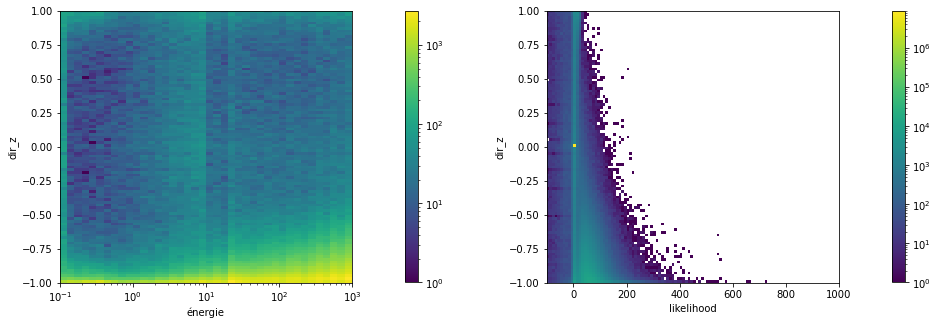

In [4]:
f = kio.OfflineReader(ARCA_file)[0:10000000]

Track = np.array(f.events.n_tracks)
haveTrk = Track >= 1
energie = f.events.tracks.E[haveTrk][:,0].__array__()
dir_z = f.events.tracks.dir_z[haveTrk][:,0].__array__()
lik = f.events.tracks.lik[haveTrk][:,0].__array__()

# on plot les data

fig = plt.figure(figsize = (16,5))

# graphique 121
data = [[energie,dir_z]]
method = ['hist2d']
index = 121
add_subplot_settings =  {'xscale':'log'}
x_label_settings = {'xlabel':'énergie'}
y_label_settings = {'ylabel':'dir_z'}

method_settings = [{'bins':[10**np.linspace(-1,3,41), np.linspace(-1,1,101)], 'norm':mpl.colors.LogNorm()}]

plot(fig, data, method, index, add_subplot_settings = add_subplot_settings, method_settings = method_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)

# graphique 122
data = [[lik,dir_z]]
method = ['hist2d']
index = 122
method_settings = [{'bins':[np.linspace(-100,1000,111), np.linspace(-1,1,101)], 'norm':mpl.colors.LogNorm()}]
x_label_settings = {'xlabel':'likelihood'}
y_label_settings = {'ylabel':'dir_z'}

plot(fig, data, method, index, method_settings = method_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)


#### On trace le lik/n_hits 

In [5]:
haveLik = f.events.tracks.lik[:,0] > 0
haveHit = f.events.tracks.fitinf[:,0,3] > 0

cuts = haveLik & haveHit

lik_sur_nhits = f.events.tracks.lik[:,0][cuts] / f.events.tracks.fitinf[:,0,3][cuts]

<AxesSubplot:title={'center':'Histogramme du lik/nhits'}, xlabel='lik/nhits', ylabel="nombre d'évènements">

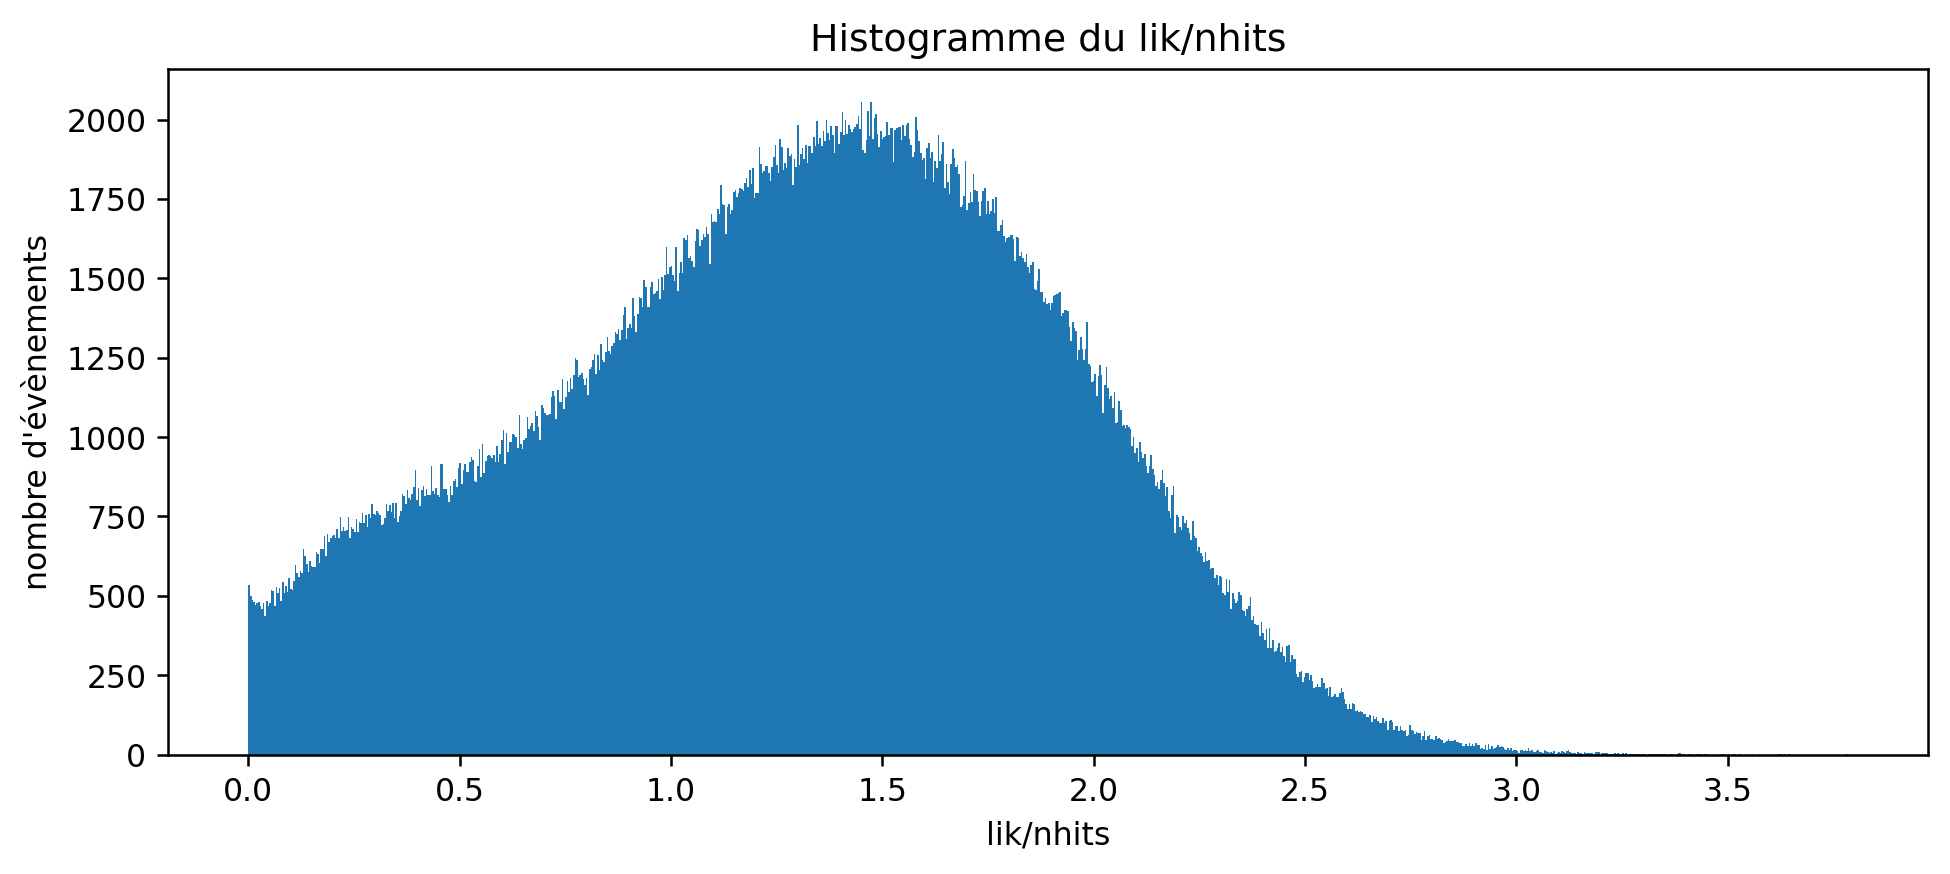

In [6]:
fig = plt.figure(figsize = (10,4), dpi = 227)

data = [[lik_sur_nhits]]
method = ['hist']
index = 111
method_settings = [{'bins':1000}]
x_label_settings = {'xlabel':'lik/nhits'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme du lik/nhits'}

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)


## On définit un fonction DOM qui nous donne la position des différents DOMS

In [4]:
def DOM():
    """Reads DOM file and store list of positions, ids and dictionary"""


    #Read DOMS information on positions and id
    det = kp.hardware.Detector('/Users/richardlaure/Desktop/Stage/ARCA/KM3NeT_00000075_20220408.detx')
    
    #Store position of DOMS in a np.array ([xxx][yyyy][zzzz])
    dom_x = []
    dom_y = []
    dom_z = []
    dom_id = []

    for dom,pos in det.dom_positions.items():
        dom_x.append(pos[0])
        dom_y.append(pos[1])
        dom_z.append(pos[2])
        dom_id.append(dom)
    
    dom_positions = np.array((dom_x,dom_y,dom_z))

    #Transpose the arrays to make a for loop for each distance
    dom_positions_bis = dom_positions.T
    

    #create dictionary of id vs index
    dict_id = {}
    for i in range(len(dom_positions_bis)):
        dict_id[i] = dom_id[i]
        
    return dom_positions_bis, dict_id

## On trace la position dans l'espace des DOMS

2022-06-27 09:57:07 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-06-27 09:57:07 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-06-27 09:57:07 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-06-27 09:57:07 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-06-27 09:57:07 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.
2022-06-27 09:57:07 WARNING ++ km3pipe.hardware: DOMs with different number of PMTs are detected, this can cause some unexpected behaviour.


++ Detector: Parsing the DETX header
++ Detector: Reading PMT information...
++ Detector: Done.


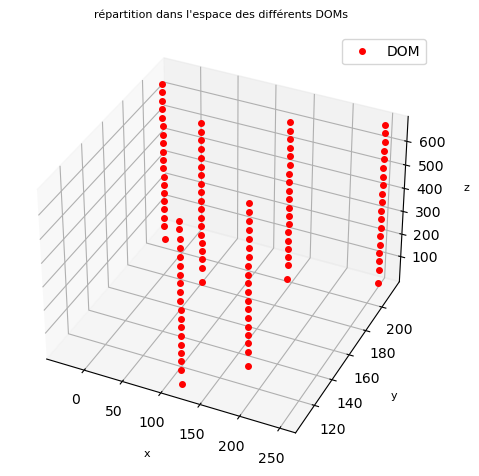

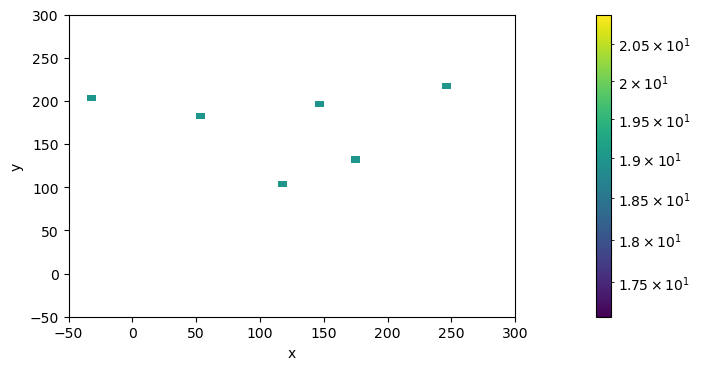

In [5]:
# We transpose the matrix so that we have the array for every position  
dom_position_bis, dict_id = DOM()
dom_position = dom_position_bis.T

dom_x = dom_position[0]
dom_y = dom_position[1]
dom_z = dom_position[2]


# we plot the data


fig = plt.figure(figsize = (12,8), dpi=100)

data = [[dom_x,dom_y,dom_z]]
method = ['plot']
index = 121
add_subplot_settings =  {'elev':35, 'azim':-65}
method_settings = [{'label':'DOM' ,'c':'red', 'linewidth':0, 'marker':'o', 'markersize':4}]
                           
title_settings = { 'label':"répartition dans l'espace des différents DOMs", 'pad':10, 'size':8 } 
x_label_settings = {'xlabel':'x', 'labelpad':8, 'size':8}
y_label_settings = {'ylabel':'y', 'labelpad':8, 'size':8}
z_label_settings = {'zlabel':'z', 'labelpad':8, 'size':8}
colorbar_settings = False

plot(fig, data, method, index, add_subplot_settings = add_subplot_settings, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings, z_label_settings = z_label_settings, colorbar_settings = colorbar_settings)


fig = plt.figure(figsize = (8,4), dpi=100)

data = [[dom_x,dom_y]]
method = ['hist2d']
index = 111
method_settings = [{'bins':[np.linspace(-50,300,50),np.linspace(-50,300,50)], 'norm':mpl.colors.LogNorm()}]

plot(fig, data, method, index, method_settings = method_settings)
plt.show()



In [9]:
def tri_ins(t):
    for k in range(1,len(t)):
        temp=t[k]
        j=k
        while j>0 and temp<t[j-1]:
            t[j]=t[j-1]
            j-=1
        t[j]=temp
    return t

In [102]:
dom_z_ligne = {'ligne_A':[0.95,62.034,100.694,137.686,173.9,210.846,247.795,283.979,320.994,357.972,394.127,430.995,467.655,503.991,540.578,577.257,613.087,649.5,685.805],
      'ligne_B':[0.95,62.468,100.278,137.72,174.334,211.48,248.629,285.113,322.478,359.656,395.86,432.729,469.589,505.875,542.862,579.641,615.771,652.234,688.639],
      'ligne_C':[0.95,64.335,101.645,138.737,175.051,212.197,249.196,285.631,322.895,360.073,396.378,433.296,470.007,506.292,543.079,580.058,615.939,652.651,689.056],
      'ligne_D':[0.95,61.213,97.772,134.764,171.078,208.125,245.323,281.958,319.073,356.3,392.705,429.773,466.784,502.969,540.206,577.235,613.316,650.179,685.333],
      'ligne_E':[0.95,64.693,101.953,138.795,175.109,212.106,249.004,285.489,322.853,359.981,396.236,433.104,469.815,505.95,543.037,579.916,616.097,652.709,689.164],
      'ligne_F':[0.95,63.274,100.034,136.976,173.04,210.037,246.935,283.32,319.334,357.062,392.917,429.535,465.896,501.831,538.568,575.147,610.878,647.24,683.545]
      }

## On crée une fonction pour avoir la stop position des muons

In [6]:
def stop_pos(file,file_range):

    f = kio.OfflineReader(file)[0:file_range]
    
    start_pos = [f.events.tracks.pos_x[:,0].__array__(),
                 f.events.tracks.pos_y[:,0].__array__(),
                 f.events.tracks.pos_z[:,0].__array__()]
    
    start_pos = np.stack(start_pos)

    tracklength = f.events.tracks.fitinf[:,0,10].__array__()

    stop_pos = np.stack([start_pos[0,:] + f.events.tracks.dir_x[:,0].__array__() * tracklength,
                        start_pos[1,:] + f.events.tracks.dir_y[:,0].__array__() * tracklength,
                        start_pos[2,:] + f.events.tracks.dir_z[:,0].__array__() * tracklength])
    
    return stop_pos

## On crée une fonction pour avoir la stop position des muons mc_true

In [7]:
def stop_pos_mc_true(file_range):
    
    file_range = int(file_range)
    f = kio.OfflineReader(MonteCarlo)[0:file_range]
    
    start_pos = [f.events.mc_tracks.pos_x[:,0].__array__(),
                 f.events.mc_tracks.pos_y[:,0].__array__(),
                 f.events.mc_tracks.pos_z[:,0].__array__()]
    
    start_pos = np.stack(start_pos)

    aliases = {'muon_true_len':'sum_mc_trks/tmuon/tmuon.len', 'muon_true_ntracks':'sum_mc_trks/ntrks',
            'muon_scaling':'sum_mc_evt/weight',
            'muon_true_nhits': 'sum_mc_hits/nhits', 'muon_reco_nhits': 'sum_hits/nhits',
            'muon_true_atot': 'sum_mc_hits/atot', 'muon_reco_atot': 'sum_hits/atot'}
    
    true_arr = f._fobj['T'].arrays(aliases.keys(), aliases = aliases)[0:file_range]
    
    tracklength = np.array(np.abs(true_arr['muon_true_len']))
    
    stop_pos = np.stack([start_pos[0,:] + f.events.tracks.dir_x[:,0].__array__() * tracklength,
                        start_pos[1,:] + f.events.tracks.dir_y[:,0].__array__() * tracklength,
                        start_pos[2,:] + f.events.tracks.dir_z[:,0].__array__() * tracklength])
    
    return stop_pos

In [13]:
'AB: 0.03659849300322934*x + 205.27965554359525 + margin*1.0006695007294402'
'AD: -0.66051912568306*x + 184.7146857923497 - margin*1.1984512987156024'
'DC: 0.4168157423971379*x + 58.77423971377458 - margin*1.083390678892004'
'CB: 1.0942408376963353*x -58.28481675392675 - margin*1.4823505020346495'

def intersect(a1, b1_fixe, b1_prop, a2, b2_fixe, b2_prop):
    return (b1_fixe-b2_fixe)/(a2-a1) , (b1_prop-b2_prop)/(a2-a1)
    
print(intersect(0.03659849300322934,205.27965554359525,1.0006695007294402,-0.66051912568306,184.7146857923497,-1.1984512987156024))
print(intersect(-0.66051912568306,184.7146857923497,-1.1984512987156024,0.4168157423971379,58.77423971377458,-1.083390678892004))
print(intersect(1.0942408376963353,-58.28481675392675, -1.4823505020346495,0.4168157423971379,58.77423971377458,-1.083390678892004))
print(intersect(0.03659849300322934,205.27965554359525,1.0006695007294402,1.0942408376963353, -58.28481675392675, -1.4823505020346495))




(-29.500000000000007, -3.1545907612968693)
(116.89999999999999, -0.10680116575882806)
(172.80000000000004, 0.588935700656967)
(249.2, 2.3476934478115874)


## On définit une fonction cut_volume qui renvoie un tableau booléen si la stop_postion du muon est dans le volume fiduciel 

In [8]:
def cut_volume (stop_pos_x, stop_pos_y, stop_pos_z, margin, zinf, zsup):
    
    inside_volume = []
    
    if margin >= 0: 
        for i in range(len(stop_pos_x)):
            x = stop_pos_x[i]
            y = stop_pos_y[i]
            z = stop_pos_z[i]

            if  (z > zinf) and (z < zsup):

                if  np.isnan(x) or np.isnan(y) or (x < -29.5 - margin) or (x > 249.2+margin):
                    ymax = ymin = float('inf')

                elif (x >= -29.5 - margin) and (x <= -29.5 -margin*0.5511439024605739):
                    ymax = 204.2 + np.sqrt(margin**2 - (x+29.5)**2)
                    ymin = 204.2 - np.sqrt(margin**2 - (x+29.5)**2)

                elif (x >= -29.5 -margin*0.5511439024605739) and (x <= -29.5 -0.03657400667907914*margin):
                    ymax = 204.2 + np.sqrt(margin**2 - (x+29.5)**2)
                    ymin = -0.66051912568306*x + 184.7146857923497 - margin*1.1984512987156024

                elif (x >= -29.5 -0.03657400667907914*margin) and (x <= 116.9 -0.5511439024605739*margin):
                    ymax = 0.03659849300322934*x + 205.27965554359525 + margin*1.0006695007294402
                    ymin = -0.66051912568306*x + 184.7146857923497 - margin*1.1984512987156024

                elif (x >= 116.9 -0.5511439024605739*margin) and (x <= 116.9 + 0.3847326274058589*margin):
                    ymax = 0.03659849300322934*x + 205.27965554359525 + margin*1.0006695007294402
                    ymin = 107.5-np.sqrt(margin**2 - (x-116.9)**2)

                elif (x >= 116.9 + 0.3847326274058589*margin) and (x <= 172.8 + 0.3847326274058589*margin):
                    ymax = 0.03659849300322934*x + 205.27965554359525 + margin*1.0006695007294402
                    ymin = 0.4168157423971379*x + 58.77423971377458 - margin*1.083390678892004

                elif (x >= 172.8 + 0.3847326274058589*margin) and (x <= 172.8 + 0.7381795575300163*margin):
                    ymax =  0.03659849300322934*x + 205.27965554359525 + margin*1.0006695007294402
                    ymin = 130.8 - np.sqrt(margin**2 - (x-172.8)**2)

                elif (x >= 172.8 + 0.7381795575300163*margin) and (x <= 249.2 - 0.03657400667907914*margin):
                    ymax = 0.03659849300322934*x + 205.27965554359525 + margin*1.0006695007294402
                    ymin = 1.0942408376963353*x -58.28481675392675 - margin*1.4823505020346495

                elif (x >= 249.2 - 0.03657400667907914*margin) and (x <= 249.2 + 0.7381795575300163*margin):
                    ymax = 214.4 + np.sqrt(margin**2 - (x-249.2)**2)
                    ymin = 1.0942408376963353*x -58.28481675392675 - margin*1.4823505020346495

                elif (x >= 249.2 + 0.7381795575300163*margin) and (x <= 249.2 + margin):
                    ymax = 214.4 + np.sqrt(margin**2 - (x-249.2)**2)
                    ymin = 214.4 - np.sqrt(margin**2 - (x-249.2)**2)

                else :
                    ymax = ymin = float('inf')

                if (y <= ymax) and (y >= ymin):
                    inside_volume.append(True)
                else :
                    inside_volume.append(False)

            else :
                inside_volume.append(False)
                
    else:
        for i in range(len(stop_pos_x)):
            x = stop_pos_x[i]
            y = stop_pos_y[i]
            z = stop_pos_z[i]

            if  (z > zinf) and (z < zsup):
                
                if  np.isnan(x) or np.isnan(y) or (x < -29.5 -3.1545907612968693*margin) or (x > 249.2 + 2.3476934478115874*margin):
                    ymax = ymin = float('inf')
                    
                elif (x >= -29.5 -3.1545907612968693*margin) and (x <= 116.9 -0.10680116575882806*margin):
                    ymax = 0.03659849300322934*x + 205.27965554359525 + margin*1.0006695007294402
                    ymin = -0.66051912568306*x + 184.7146857923497 - margin*1.1984512987156024
                
                elif (x >= 116.9 -0.10680116575882806*margin) and (x <= 172.8 +0.588935700656967*margin):
                    ymax = 0.03659849300322934*x + 205.27965554359525 + margin*1.0006695007294402
                    ymin = 0.4168157423971379*x + 58.77423971377458 - margin*1.083390678892004
                
                elif (x >= 172.8 +0.588935700656967*margin) and (x <= 249.2 + 2.3476934478115874*margin):
                    ymax = 0.03659849300322934*x + 205.27965554359525 + margin*1.0006695007294402
                    ymin = 1.0942408376963353*x -58.28481675392675 - margin*1.4823505020346495
                    
                else :
                    ymax = ymin = float('inf')
                    
                if (y <= ymax) and (y >= ymin):
                    inside_volume.append(True)
                else :
                    inside_volume.append(False)
                
            else :
                inside_volume.append(False)
        
        
    inside_volume = np.array(inside_volume) 

    return inside_volume

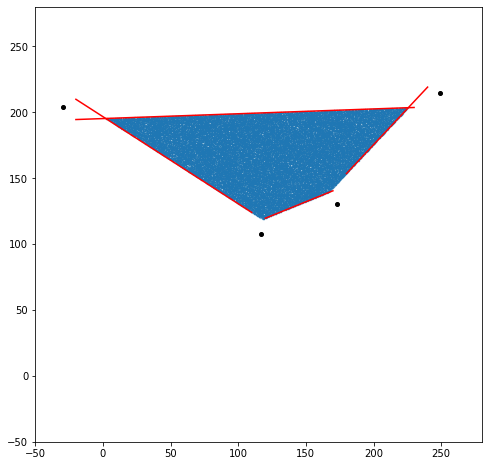

[ 89.83030145 161.06552706 203.64303162 ... 133.6582887  100.82224803
 106.281286  ]


In [9]:
X = np.random.uniform(low=-50, high=280, size=1000000)
Y = np.random.uniform(low=-50, high=280, size=1000000)
Z = np.random.uniform(low=0, high=600, size=1000000)

margin = -10

fig = plt.figure(figsize = (8,8))
ax = fig.add_subplot(111,xlim = (-50,280), ylim = (-50,280) )
cut1 = cut_volume(X,Y,Z,margin,0,600)
ax.plot(X[cut1],Y[cut1], linewidth = 0,marker='.',markersize = 0.4)

x = np.linspace(-20,110,300)
y = -0.66051912568306*x + 184.7146857923497 - margin*1.1984512987156024
ax.plot(x,y, c='r')

x = np.linspace(-20,230,300)
y = 0.03659849300322934*x + 205.27965554359525 + margin*1.0006695007294402
ax.plot(x,y, c='r')

x = np.linspace(120,170,300)
y = 0.4168157423971379*x + 58.77423971377458 - margin*1.083390678892004
ax.plot(x,y, c='r')

x = np.linspace(180,240,300)
y = 1.0942408376963353*x -58.28481675392675 - margin*1.4823505020346495
ax.plot(x,y, c='r')

lignes_x = [-29.5,249.2,172.8,116.9]
lignes_y = [204.2,214.4,130.4,107.5]
ax.plot(lignes_x,lignes_y, linewidth = 0,marker='o',markersize = 4,color = 'black')


plt.show()

print(X[cut1])

## On définit une fonction cut qui va sélectionner les muons en fonction de leurs caractéristiques

In [10]:
def cut(file, volume = True, margin = 0, E = 0, lik = 0, E_sur_L = 0.3, lik_sur_nhits = 1.5, dir_z = -0.8, n_hits = 20, zinf = 135, zsup = 610, file_range = 1e+7):
    
    f = kio.OfflineReader(file)[0:int(file_range)]
    events_array = f.events
    tracks_array = events_array.tracks
    fintinf_array = tracks_array.fitinf
    
    # we take muons that have the properties we want 
    haveTrack = events_array.n_tracks >= 1
    n_hits_threshold = fintinf_array[:,0,3] >= n_hits
    energy_threshold = tracks_array.E[:,0] >= E
    lik_threshold = tracks_array.lik[:,0] >= lik
    E_sur_L_threshold = tracks_array.E[:,0] / fintinf_array[:,0,10] <= E_sur_L 
    lik_sur_nhits_threshold = (tracks_array.lik[:,0] / fintinf_array[:,0,3] >= lik_sur_nhits) & (tracks_array.lik[:,0] / fintinf_array[:,0,3] < float('inf'))
    dir_z_threshold = tracks_array.dir_z[:,0] <= dir_z
    
    stop_pos_x, stop_pos_y, stop_pos_z = stop_pos(file,file_range)
        
    # we take the muons that stopped inside the determined volume 
    if volume :
        inside_volume = cut_volume (stop_pos_x, stop_pos_y, stop_pos_z, margin, zinf, zsup)
        
    else :
        inside_volume = np.full(len(f.events),True)

    cutArray = inside_volume & haveTrack & energy_threshold & lik_threshold & E_sur_L_threshold & lik_sur_nhits_threshold & dir_z_threshold & n_hits_threshold
    
    filtered_events = f.events[cutArray]
    
    n_events = len(f)
    n_filtered_events = len(filtered_events)
    print(str("{:.2f}".format((n_events-n_filtered_events)*100/n_events))+" % of events filtered")
    
    if n_filtered_events == 0. :
        print("Filtration finished, there is no event that corresponds to these parameters")
    
    else :
        n_hits_array_cut = fintinf_array[:,0,3][cutArray]
        trackLengh_array_cut = fintinf_array[:,0,10][cutArray]
        lik_array_cut = tracks_array.lik[:,0][cutArray]
        energy_array_cut = tracks_array.E[:,0][cutArray]
        
        filtered_file = {'n_hits':n_hits_array_cut,
                         #'t_sec':filtered_events.t_sec,
                         #'t_ns':filtered_events.t_ns,
                         'E_GeV':energy_array_cut,
                         'lik':lik_array_cut,
                         'dir_x':tracks_array.dir_x[:,0][cutArray],
                         'dir_y':tracks_array.dir_y[:,0][cutArray],
                         'dir_z':tracks_array.dir_z[:,0][cutArray],
                         'start_pos_x':tracks_array.pos_x[:,0][cutArray],
                         'start_pos_y':tracks_array.pos_y[:,0][cutArray],
                         'start_pos_z':tracks_array.pos_z[:,0][cutArray],
                         'trackLength':trackLengh_array_cut,
                         'stop_pos_x':stop_pos_x[cutArray],
                         'stop_pos_y':stop_pos_y[cutArray],
                         'stop_pos_z':stop_pos_z[cutArray],
                         'E_sur_L':energy_array_cut/trackLengh_array_cut,
                         #'t':filtered_events.tracks.t[:,0],
                         'lik_sur_nhits':lik_array_cut/n_hits_array_cut,
                         #'n_tracks':filtered_events.n_tracks,
                         'cutArray':cutArray
                        }
        
        return filtered_file


## On définit une fonction cut qui va sélectionner les muons en fonction de leurs caractéristiques pour mc_true

In [11]:
def cut_mc_true(volume = True, margin = 0, E = 0, E_sur_L = np.float('inf'), dir_z = -0.8, n_hits = 20, zinf = 135, zsup = 610, file_range = 1e+7):
    
    f = kio.OfflineReader(MonteCarlo)[0:int(file_range)]
    
    # Aliases are here to make the branches more readable
    aliases = {'muon_true_len':'sum_mc_trks/tmuon/tmuon.len', 'muon_true_ntracks':'sum_mc_trks/ntrks',
            'muon_scaling':'sum_mc_evt/weight',
            'muon_true_nhits': 'sum_mc_hits/nhits', 'muon_reco_nhits': 'sum_hits/nhits',
            'muon_true_atot': 'sum_mc_hits/atot', 'muon_reco_atot': 'sum_hits/atot'}
    
    true_arr = f._fobj['T'].arrays(aliases.keys(), aliases = aliases)[0:int(file_range)]
    
    # get some arrays
    trackLength = np.array(np.abs(true_arr['muon_true_len']))
    n_tracks_array = np.array(true_arr['muon_true_ntracks'])
    n_hits_array = np.array(true_arr['muon_true_nhits'])
    energy_array = f.events.mc_tracks.E[:,0]
    
    # we take muons that have the properties we want 
    haveTrack = n_tracks_array >= 1
    n_hits_threshold = n_hits_array > n_hits
    energy_threshold = energy_array >= E
    E_sur_L_threshold = (energy_array / trackLength) <= E_sur_L
    dir_z_threshold = (f.events.mc_tracks.dir_z[:,0] <= dir_z)
    
    stop_pos_x, stop_pos_y, stop_pos_z = stop_pos_mc_true(file_range)
    
    # we take the muons that stopped inside the determined volume 
    if volume :
        inside_volume = cut_volume (stop_pos_x, stop_pos_y, stop_pos_z, margin, zinf, zsup)
        
    else :
        inside_volume = np.full(len(f.events),True)
            
    cutArray = inside_volume & haveTrack & energy_threshold & E_sur_L_threshold & dir_z_threshold & n_hits_threshold
    
    filtered_events = f.events[cutArray]
    
    n_events = len(f)
    n_filtered_events = len(filtered_events)
    print(str("{:.2f}".format((n_events-n_filtered_events)*100/n_events))+" % of events filtered")
    
    if n_filtered_events == 0. :
        print("Filtration finished, there is no event that corresponds to these parameters")
    
    else :
        energy_array_cut = energy_array[cutArray]
        trackLength_cut = trackLength[cutArray]
        
        filtered_file = {'n_hits':n_hits_array[cutArray],
                         #'t_sec':filtered_events.t_sec,
                         #'t_ns':filtered_events.t_ns,
                         #'t_track':filtered_events.mc_tracks.t[:,0],
                         'E_GeV':energy_array_cut,
                         'dir_x':filtered_events.mc_tracks.dir_x[:,0],
                         'dir_y':filtered_events.mc_tracks.dir_y[:,0],
                         'dir_z':filtered_events.mc_tracks.dir_z[:,0],
                         'start_pos_x':filtered_events.mc_tracks.pos_x[:,0],
                         'start_pos_y':filtered_events.mc_tracks.pos_y[:,0],
                         'start_pos_z':filtered_events.mc_tracks.pos_z[:,0],
                         'trackLength':trackLength_cut,
                         'stop_pos_x':stop_pos_x[cutArray],
                         'stop_pos_y':stop_pos_y[cutArray],
                         'stop_pos_z':stop_pos_z[cutArray],
                         'E_sur_L':energy_array_cut/trackLength_cut,
                         #'t':filtered_events.tracks.t[:,0],
                         #'n_tracks':n_tracks_array[cutArray],
                         'cutArray':cutArray
                        }

        return filtered_file


/var/folders/hs/6rw886x92wq2qdy_wmfmm5m40000gn/T/ipykernel_35716/499496671.py:1: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  def cut_mc_true(volume = True, margin = 0, E = 0, E_sur_L = np.float('inf'), dir_z = -0.8, n_hits = 20, zinf = 135, zsup = 610, file_range = 1e+7):


## We plot all the stoping muons that are in the restricted volume

In [140]:
a = time()
filtered_ARCA_file = cut(ARCA_file, volume = True, margin = 10, zinf = 60, zsup = 600)
b = time()
print(str(int((b-a)//60))+ ' mn et ' + str(int(b-a - (b-a)//60*60)) + ' sec')


/Users/richardlaure/opt/anaconda3/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(
/Users/richardlaure/opt/anaconda3/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in true_divide
  result = getattr(ufunc, method)(


99.33 % of events filtered
1 mn et 50 sec


In [141]:
a = time()
filtered_mc_reco = cut(MonteCarlo, volume = True, margin = -10, zinf = 60, zsup = 600)
b = time()
print(str(int((b-a)//60))+ ' mn et ' + str(int(b-a - (b-a)//60*60)) + ' sec')


99.13 % of events filtered
1 mn et 38 sec


In [142]:
a = time()
filtered_mc_true = cut_mc_true(volume = True, margin = 10, zinf = 60, zsup = 600 )
b = time()
print(str(int((b-a)//60))+ ' mn et ' + str(int(b-a - (b-a)//60*60)) + ' sec')


99.12 % of events filtered
0 mn et 53 sec


In [143]:
stop_pos_x_ARCA_file_filtrered = filtered_ARCA_file['stop_pos_x'].__array__()
stop_pos_y_ARCA_file_filtrered = filtered_ARCA_file['stop_pos_y'].__array__()
stop_pos_z_ARCA_file_filtrered = filtered_ARCA_file['stop_pos_z'].__array__()

stop_pos_x_mc_reco_filtrered = filtered_mc_reco['stop_pos_x'].__array__()
stop_pos_y_mc_reco_filtrered = filtered_mc_reco['stop_pos_y'].__array__()
stop_pos_z_mc_reco_filtrered = filtered_mc_reco['stop_pos_z'].__array__()

stop_pos_x_mc_true_filtrered = filtered_mc_true['stop_pos_x'].__array__()
stop_pos_y_mc_true_filtrered = filtered_mc_true['stop_pos_y'].__array__()
stop_pos_z_mc_true_filtrered = filtered_mc_true['stop_pos_z'].__array__()

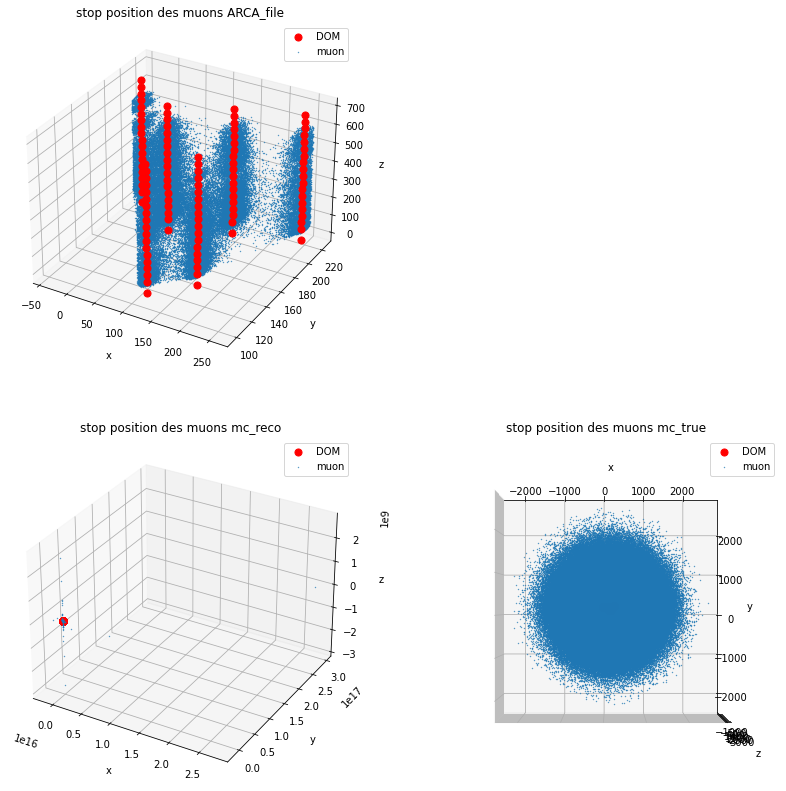

In [144]:
fig = plt.figure(figsize = (14,14))

# plot ARCA_file 
data = [[dom_x,dom_y,dom_z],[stop_pos_x_ARCA_file,stop_pos_y_ARCA_file,stop_pos_z_ARCA_file]]
method = ['scatter','scatter']
index = 221
add_subplot_settings =  {}
method_settings = [{'label':'DOM' ,'color':'red','marker':'o', 'depthshade':False, 's':50}, {'label':'muon', 'marker':'.', 'depthshade':False, 's':0.5}]
title_settings = {'label':'stop position des muons ARCA_file'} 
x_label_settings = {'xlabel':'x', 'labelpad':8}
y_label_settings = {'ylabel':'y', 'labelpad':8}
z_label_settings = {'zlabel':'z', 'labelpad':8}
legend_settings = {}
colorbar_settings = False

plot(fig, data, method, index, add_subplot_settings = add_subplot_settings, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings, z_label_settings = z_label_settings, colorbar_settings = colorbar_settings)


# plot mc_reco 
data = [[dom_x,dom_y,dom_z],[stop_pos_x_mc_reco,stop_pos_y_mc_reco,stop_pos_z_mc_reco]]
method = ['scatter','scatter']
index = 223
title_settings = {'label':'stop position des muons mc_reco'} 

plot(fig, data, method, index, add_subplot_settings = add_subplot_settings, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings, z_label_settings = z_label_settings, colorbar_settings = colorbar_settings)


# plot mc_true
data = [[dom_x,dom_y,dom_z],[stop_pos_x_mc_true,stop_pos_y_mc_true,stop_pos_z_mc_true]]
add_subplot_settings =  {'elev':90, 'azim':-90}
method = ['scatter','scatter']
index = 224
title_settings = {'label':'stop position des muons mc_true'} 

plot(fig, data, method, index, add_subplot_settings = add_subplot_settings, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings, z_label_settings = z_label_settings, colorbar_settings = colorbar_settings)

plt.show()

In [ ]:
fig = plt.figure(figsize = (14,12))

data = [[filtered_ARCA_file['lik']],[filtered_mc_reco['lik']]]
method = ['hist','hist']
index = 221
method_settings = [{'bins':100, 'histtype':'step', 'label':'ARCA_file'},{'bins':100, 'histtype':'step', 'label':'mc_reco'}]
x_label_settings = {'xlabel':'lik'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme du lik'}

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)


data = [[filtered_ARCA_file['n_hits']],[filtered_mc_reco['n_hits']]]
index = 222
x_label_settings = {'xlabel':'n_hits'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme du n_hits'}

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)

cut1 = filtered_ARCA_file['lik_sur_nhits'] < float('inf')
cut2 = filtered_mc_reco['lik_sur_nhits'] < float('inf')
data = [[filtered_ARCA_file['lik_sur_nhits'][cut1]],[filtered_mc_reco['lik_sur_nhits'][cut2]]]
index = 223
x_label_settings = {'xlabel':'lik/n_hits'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme du lik/n_hits'}

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)


In [ ]:
fig = plt.figure(figsize = (14,7))

data = [[filtered_ARCA_file['stop_pos_z']],[filtered_mc_reco['stop_pos_z']],[filtered_mc_true['stop_pos_z']]]
method = ['hist','hist','hist']
index = 111
add_subplot_settings  = {'yscale':'log'}
method_settings = [{'bins':100, 'histtype':'step', 'label':'ARCA_file'},{'bins':100, 'histtype':'step', 'label':'mc_reco'},{'bins':100, 'histtype':'step', 'label':'mc_true'}]
x_label_settings = {'xlabel':'z (en m)'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme du stop_z'}

plot(fig, data, method, index, add_subplot_settings = add_subplot_settings, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)


In [ ]:
fig = plt.figure(figsize = (12,10))

data = [[filtered_ARCA_file['E_GeV'].__array__(),filtered_ARCA_file['trackLength'].__array__()]]
method = ['hist2d']
index = 221
method_settings = [{'bins':[100,100], 'norm':mpl.colors.LogNorm()}]
x_label_settings = {'xlabel':'E (GeV)'}
y_label_settings = {'ylabel':'L (m)'}
title_settings = {'label':'trackLength(E) for ARCA_file'}

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings, colorbar_settings = False)

data =[[filtered_mc_true['E_GeV'].__array__(),filtered_mc_true['trackLength'].__array__()]]
method = ['hist2d']
title_settings = {'label':'trackLength(E) for mc_true'}
index = 222

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings, colorbar_settings = False)

data =[[filtered_mc_reco['E_GeV'].__array__(),filtered_mc_reco['trackLength'].__array__()]]
method = ['hist2d']
title_settings = {'label':'trackLength(E) for mc_reco'}
index = 223

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings, colorbar_settings = False)

plt.subplots_adjust(wspace=0.3, hspace=0.35)

## Calcul efficacité et pureté 

In [18]:
a = time()
filtered_mc_reco = cut(MonteCarlo, volume = True, margin = -10, E = 0, lik = 0, E_sur_L = np.float('inf'), lik_sur_nhits = 0, dir_z = 1, n_hits = 0, zinf = 135, zsup = 610, file_range = 1000000)
b = time()
print(str(int((b-a)//60))+ ' mn et ' + str(int(b-a - (b-a)//60*60)) + ' sec')


/var/folders/hs/6rw886x92wq2qdy_wmfmm5m40000gn/T/ipykernel_12996/1314532944.py:2: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  filtered_mc_reco = cut(MonteCarlo, volume = True, margin = -10, E = 0, lik = 0, E_sur_L = np.float('inf'), lik_sur_nhits = 0, dir_z = 1, n_hits = 0, zinf = 135, zsup = 610, file_range = 1000000)
/Users/richardlaure/opt/anaconda3/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: divide by zero encountered in true_divide
  result = getattr(ufunc, method)(
/Users/richardlaure/opt/anaconda3/lib/python3.9/site-packages/awkward/_connect/_numpy.py:195: RuntimeWarning: invalid value encountered in true_divide
  result 

91.73 % of events filtered
0 mn et 20 sec


In [138]:
file = MonteCarlo
file_range = 10000000

stop_pos_x_mc_reco, stop_pos_y_mc_reco, stop_pos_z_mc_reco = stop_pos(file,file_range)
stop_pos_x_mc_true, stop_pos_y_mc_true, stop_pos_z_mc_true = stop_pos_mc_true(file_range)

In [20]:
isNotNan = np.invert(np.isnan(stop_pos_z_mc_reco))
stop_pos_z_all_muon = stop_pos_z_mc_reco[isNotNan]


In [21]:
cut_true_stopping_muon = cut_volume(stop_pos_x_mc_true, stop_pos_y_mc_true, stop_pos_z_mc_true, -10, 135, 610) & isNotNan
stop_pos_z_true_stopping_muon = stop_pos_z_mc_reco[cut_true_stopping_muon]


In [22]:
stop_pos_z_selected_stopping_muon = filtered_mc_reco['stop_pos_z']
print(len(stop_pos_z_selected_stopping_muon))

82650


In [23]:
cut_selected_true_stopping_muon = filtered_mc_reco['cutArray'] & cut_true_stopping_muon
stop_pos_z_selected_true_stopping_muon = stop_pos_z_mc_reco[cut_selected_true_stopping_muon]


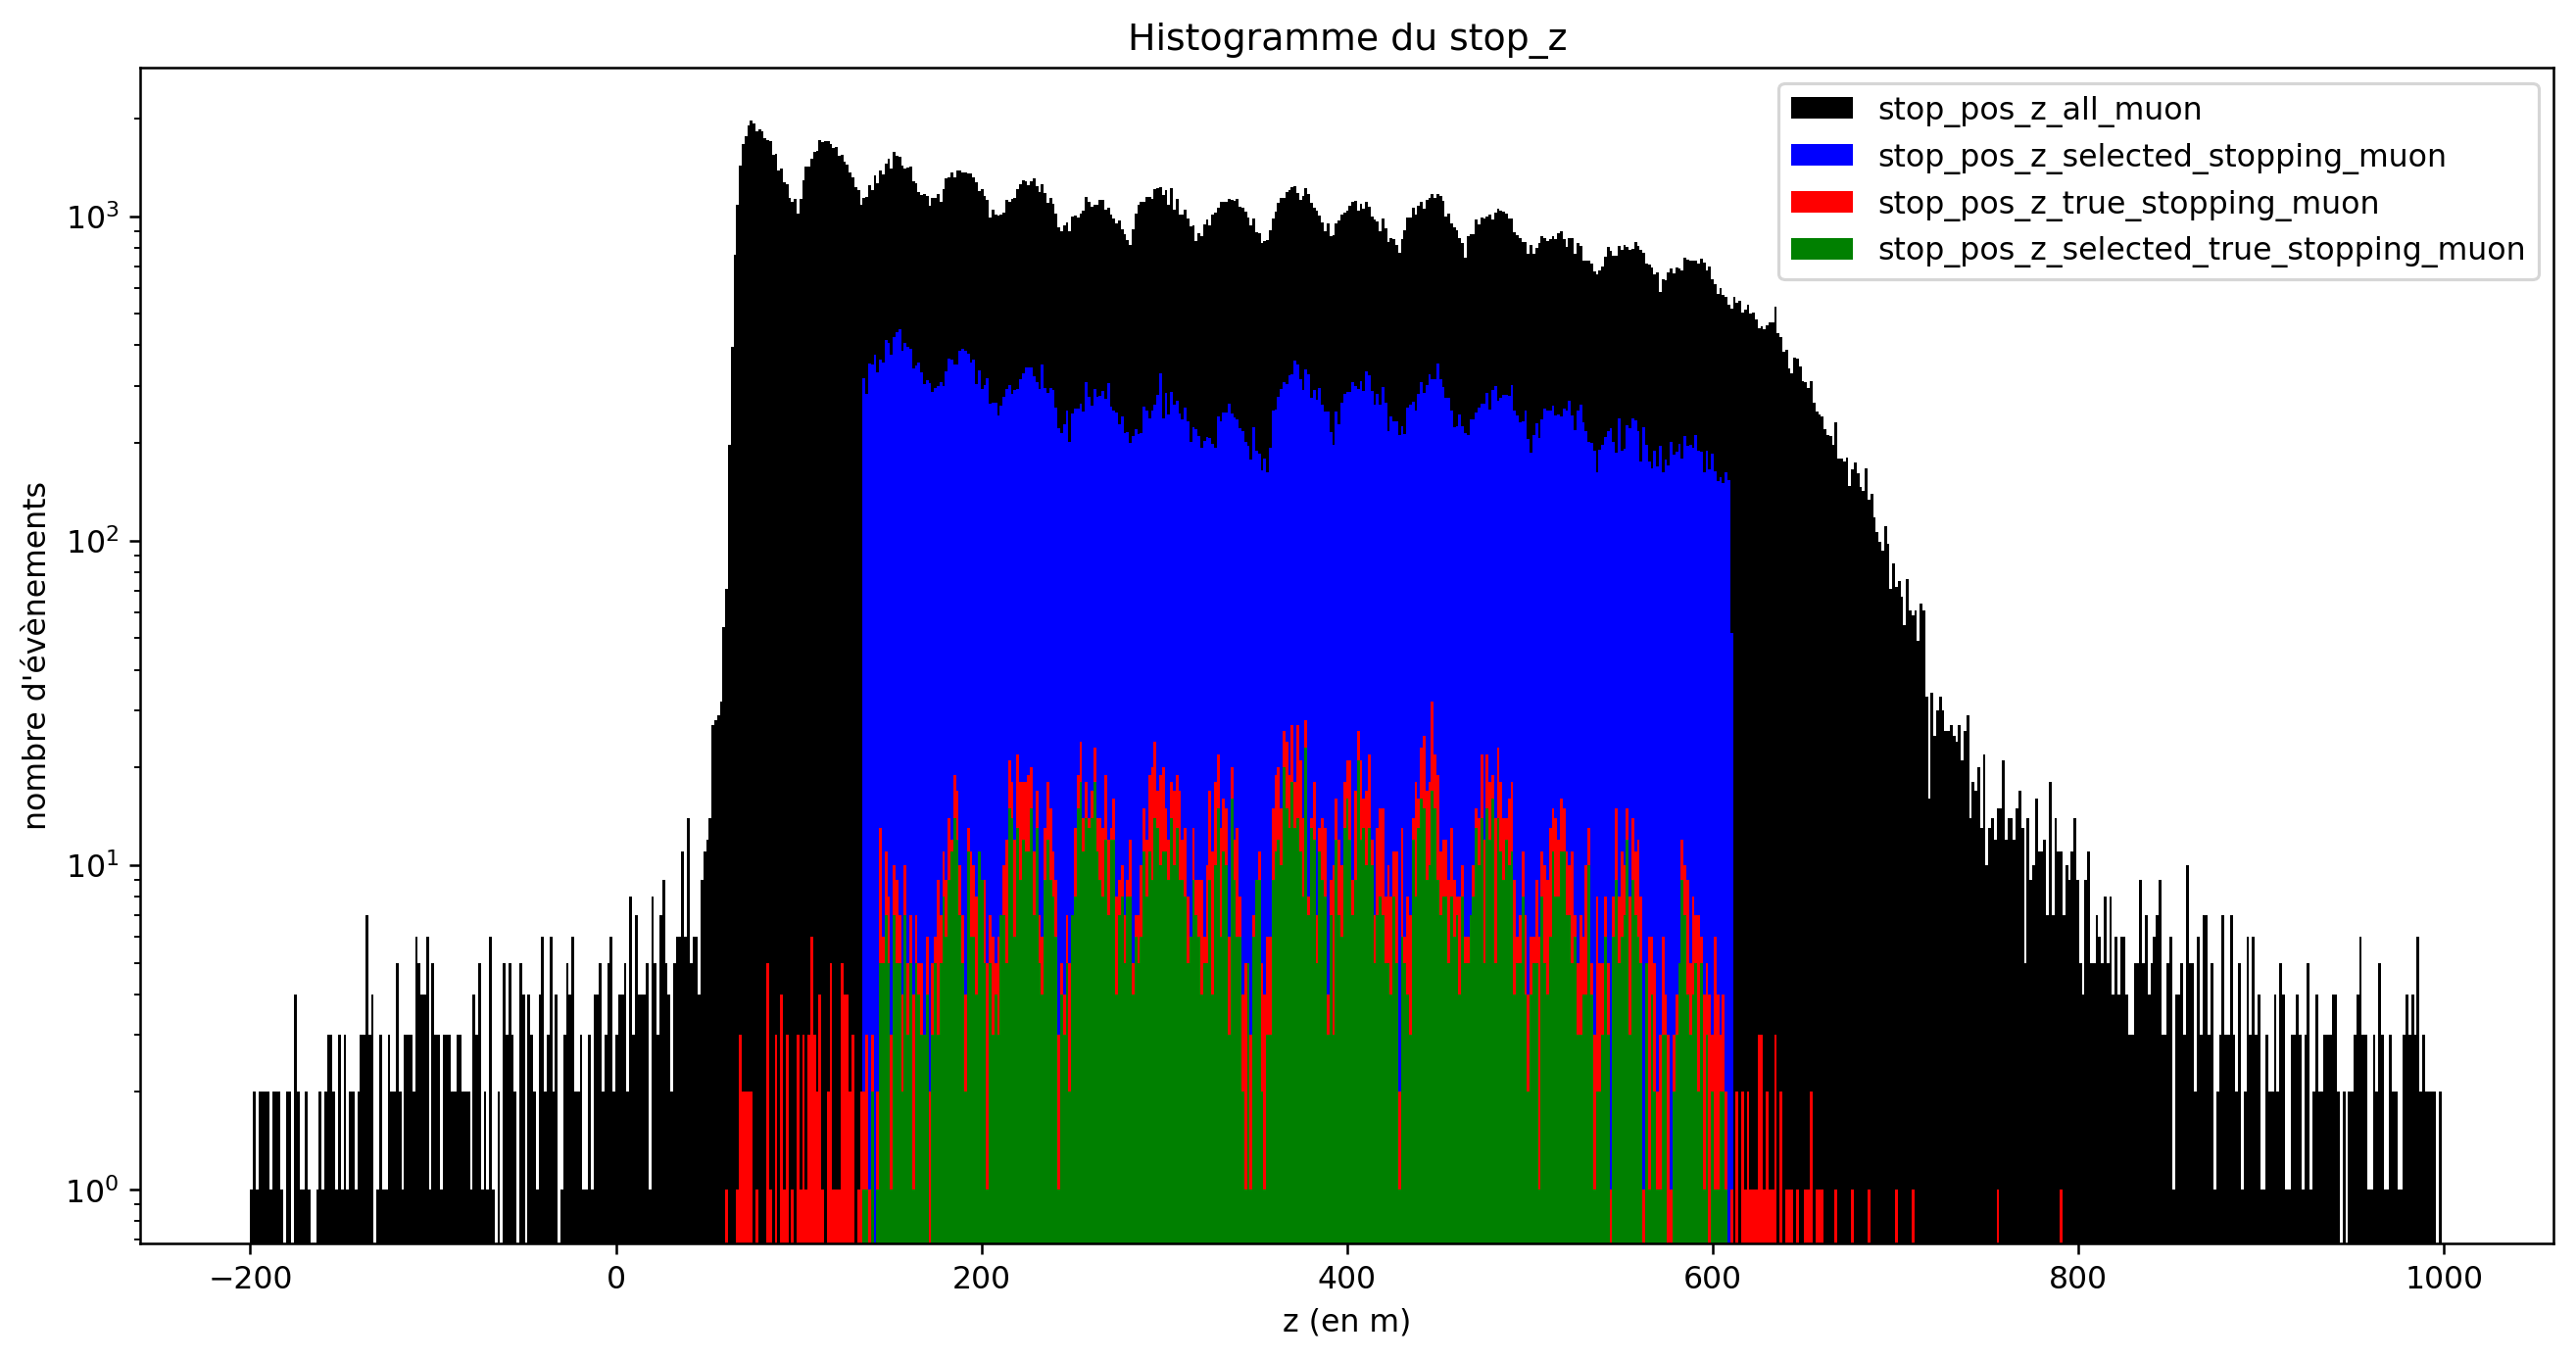

In [24]:
fig = plt.figure(figsize = (14,7),dpi =227)

data = [[stop_pos_z_all_muon],[stop_pos_z_selected_stopping_muon],[stop_pos_z_true_stopping_muon],[stop_pos_z_selected_true_stopping_muon]]
method = ['hist','hist','hist','hist']
index = 111
add_subplot_settings  = {'yscale':'log'}
method_settings = [{'bins':np.linspace(-200,1000,800), 'color':'black', 'label':'stop_pos_z_all_muon'},{'bins':np.linspace(-200,1000,800), 'color':'blue', 'label':'stop_pos_z_selected_stopping_muon'},{'bins':np.linspace(-200,1000,800), 'color':'red', 'label':'stop_pos_z_true_stopping_muon'},{'bins':np.linspace(-200,1000,800), 'color':'green', 'label':'stop_pos_z_selected_true_stopping_muon'}]
x_label_settings = {'xlabel':'z (en m)'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme du stop_z'}

plot(fig, data, method, index, add_subplot_settings = add_subplot_settings, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)
plt.show()

In [25]:
purity = len(stop_pos_z_selected_true_stopping_muon)/len(stop_pos_z_selected_stopping_muon)
purity

0.027404718693284938

In [26]:
efficiency = len(stop_pos_z_selected_true_stopping_muon)/len(stop_pos_z_true_stopping_muon)
efficiency

0.6225948323254535

# Test des quality cuts

In [27]:
f = kio.OfflineReader(MonteCarlo)[0:1000000]
cutv = cut_volume(stop_pos_x_mc_true, stop_pos_y_mc_true, stop_pos_z_mc_true, -10, 135, 610)
cut_false_stopping_muon_inside_reco = np.invert(cutv) & isNotNan & (cut_volume(stop_pos_x_mc_reco, stop_pos_y_mc_reco, stop_pos_z_mc_reco, -10, 135, 610))
cut_true_stopping_muon_inside_reco = cutv & isNotNan & (cut_volume(stop_pos_x_mc_reco, stop_pos_y_mc_reco, stop_pos_z_mc_reco, -10, 135, 610))
print(len(f.events[cut_true_stopping_muon_inside_reco]), ' = nb initial de vrai stopping muons dans le volume fiduciel')
print(len(f.events[cut_false_stopping_muon_inside_reco]), ' = nb initial de faux stopping muons dans le volume fiduciel')


2267  = nb initial de vrai stopping muons dans le volume fiduciel
80907  = nb initial de faux stopping muons dans le volume fiduciel


# Test energie

In [28]:
quality_cut_energie = f.events.tracks.E[:,0] < 2500
# quality_cut_energie = np.full(len(f.events),True) # pour voir sans le quality cut finalement choisi

In [29]:
maximiser = f.events.tracks.E[:,0][cut_true_stopping_muon_inside_reco & quality_cut_energie]
minimiser = f.events.tracks.E[:,0][cut_false_stopping_muon_inside_reco & quality_cut_energie]
print(len(maximiser)/2267, ' portion de vrai stopping muon enlevés')
print(len(minimiser)/80907, ' portion de faux stopping muon enlevés')


0.870754300838112  portion de vrai stopping muon enlevés
0.5321665616077719  portion de faux stopping muon enlevés


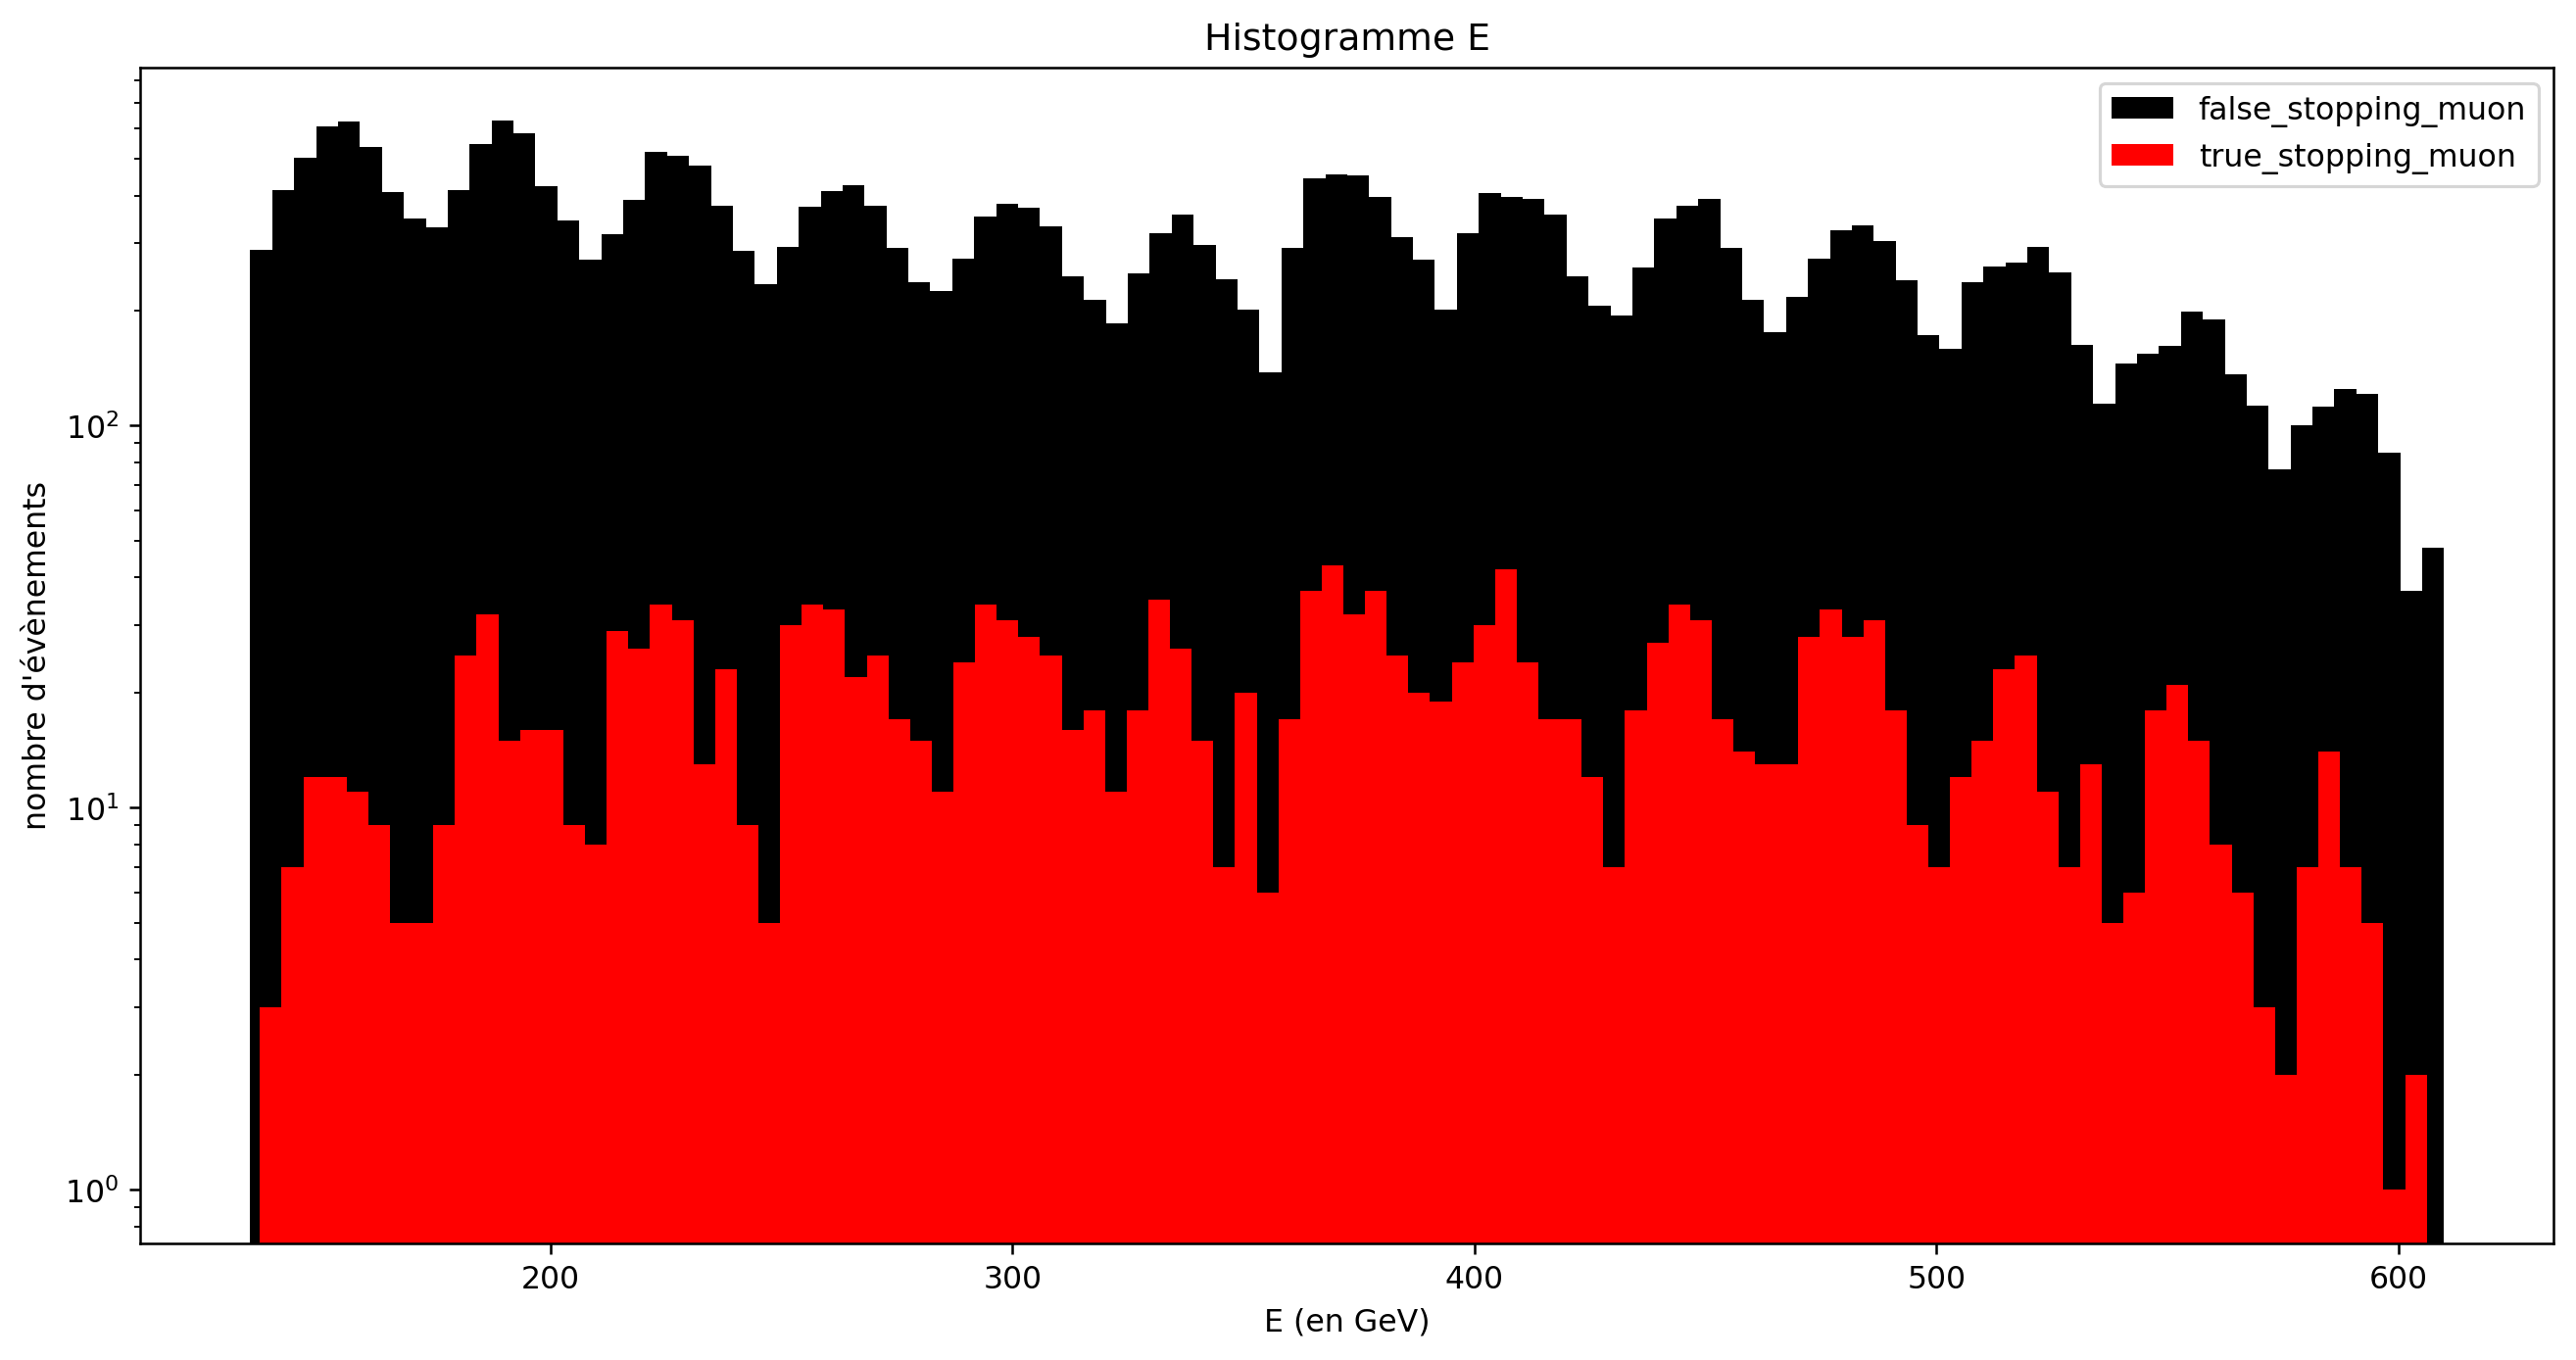

In [53]:
fig = plt.figure(figsize = (14,7),dpi =227)

data = [[minimiser],[maximiser]]
method = ['hist','hist']
index = 111
add_subplot_settings  = {'yscale':'log'}
method_settings = [{'bins':100, 'color':'black', 'label':'false_stopping_muon'},{'bins':100, 'color':'red', 'label':'true_stopping_muon'}]
x_label_settings = {'xlabel':'E (en GeV)'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme E'}

plot(fig, data, method, index, add_subplot_settings = add_subplot_settings, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)
plt.show()

# Test nhits

In [31]:
quality_cut_nhits = (f.events.tracks.fitinf[:,0,3] > 20) & (f.events.tracks.fitinf[:,0,3] < 85)
# quality_cut_nhits = np.full(len(f.events),True) # pour voir sans le quality cut finalement choisi

In [32]:
maximiser = f.events.tracks.fitinf[:,0,3][cut_true_stopping_muon_inside_reco & quality_cut_nhits]
minimiser = f.events.tracks.fitinf[:,0,3][cut_false_stopping_muon_inside_reco & quality_cut_nhits]
print(len(maximiser)/2267)
print(len(minimiser)/80907)


0.949272165857962
0.895596178328204


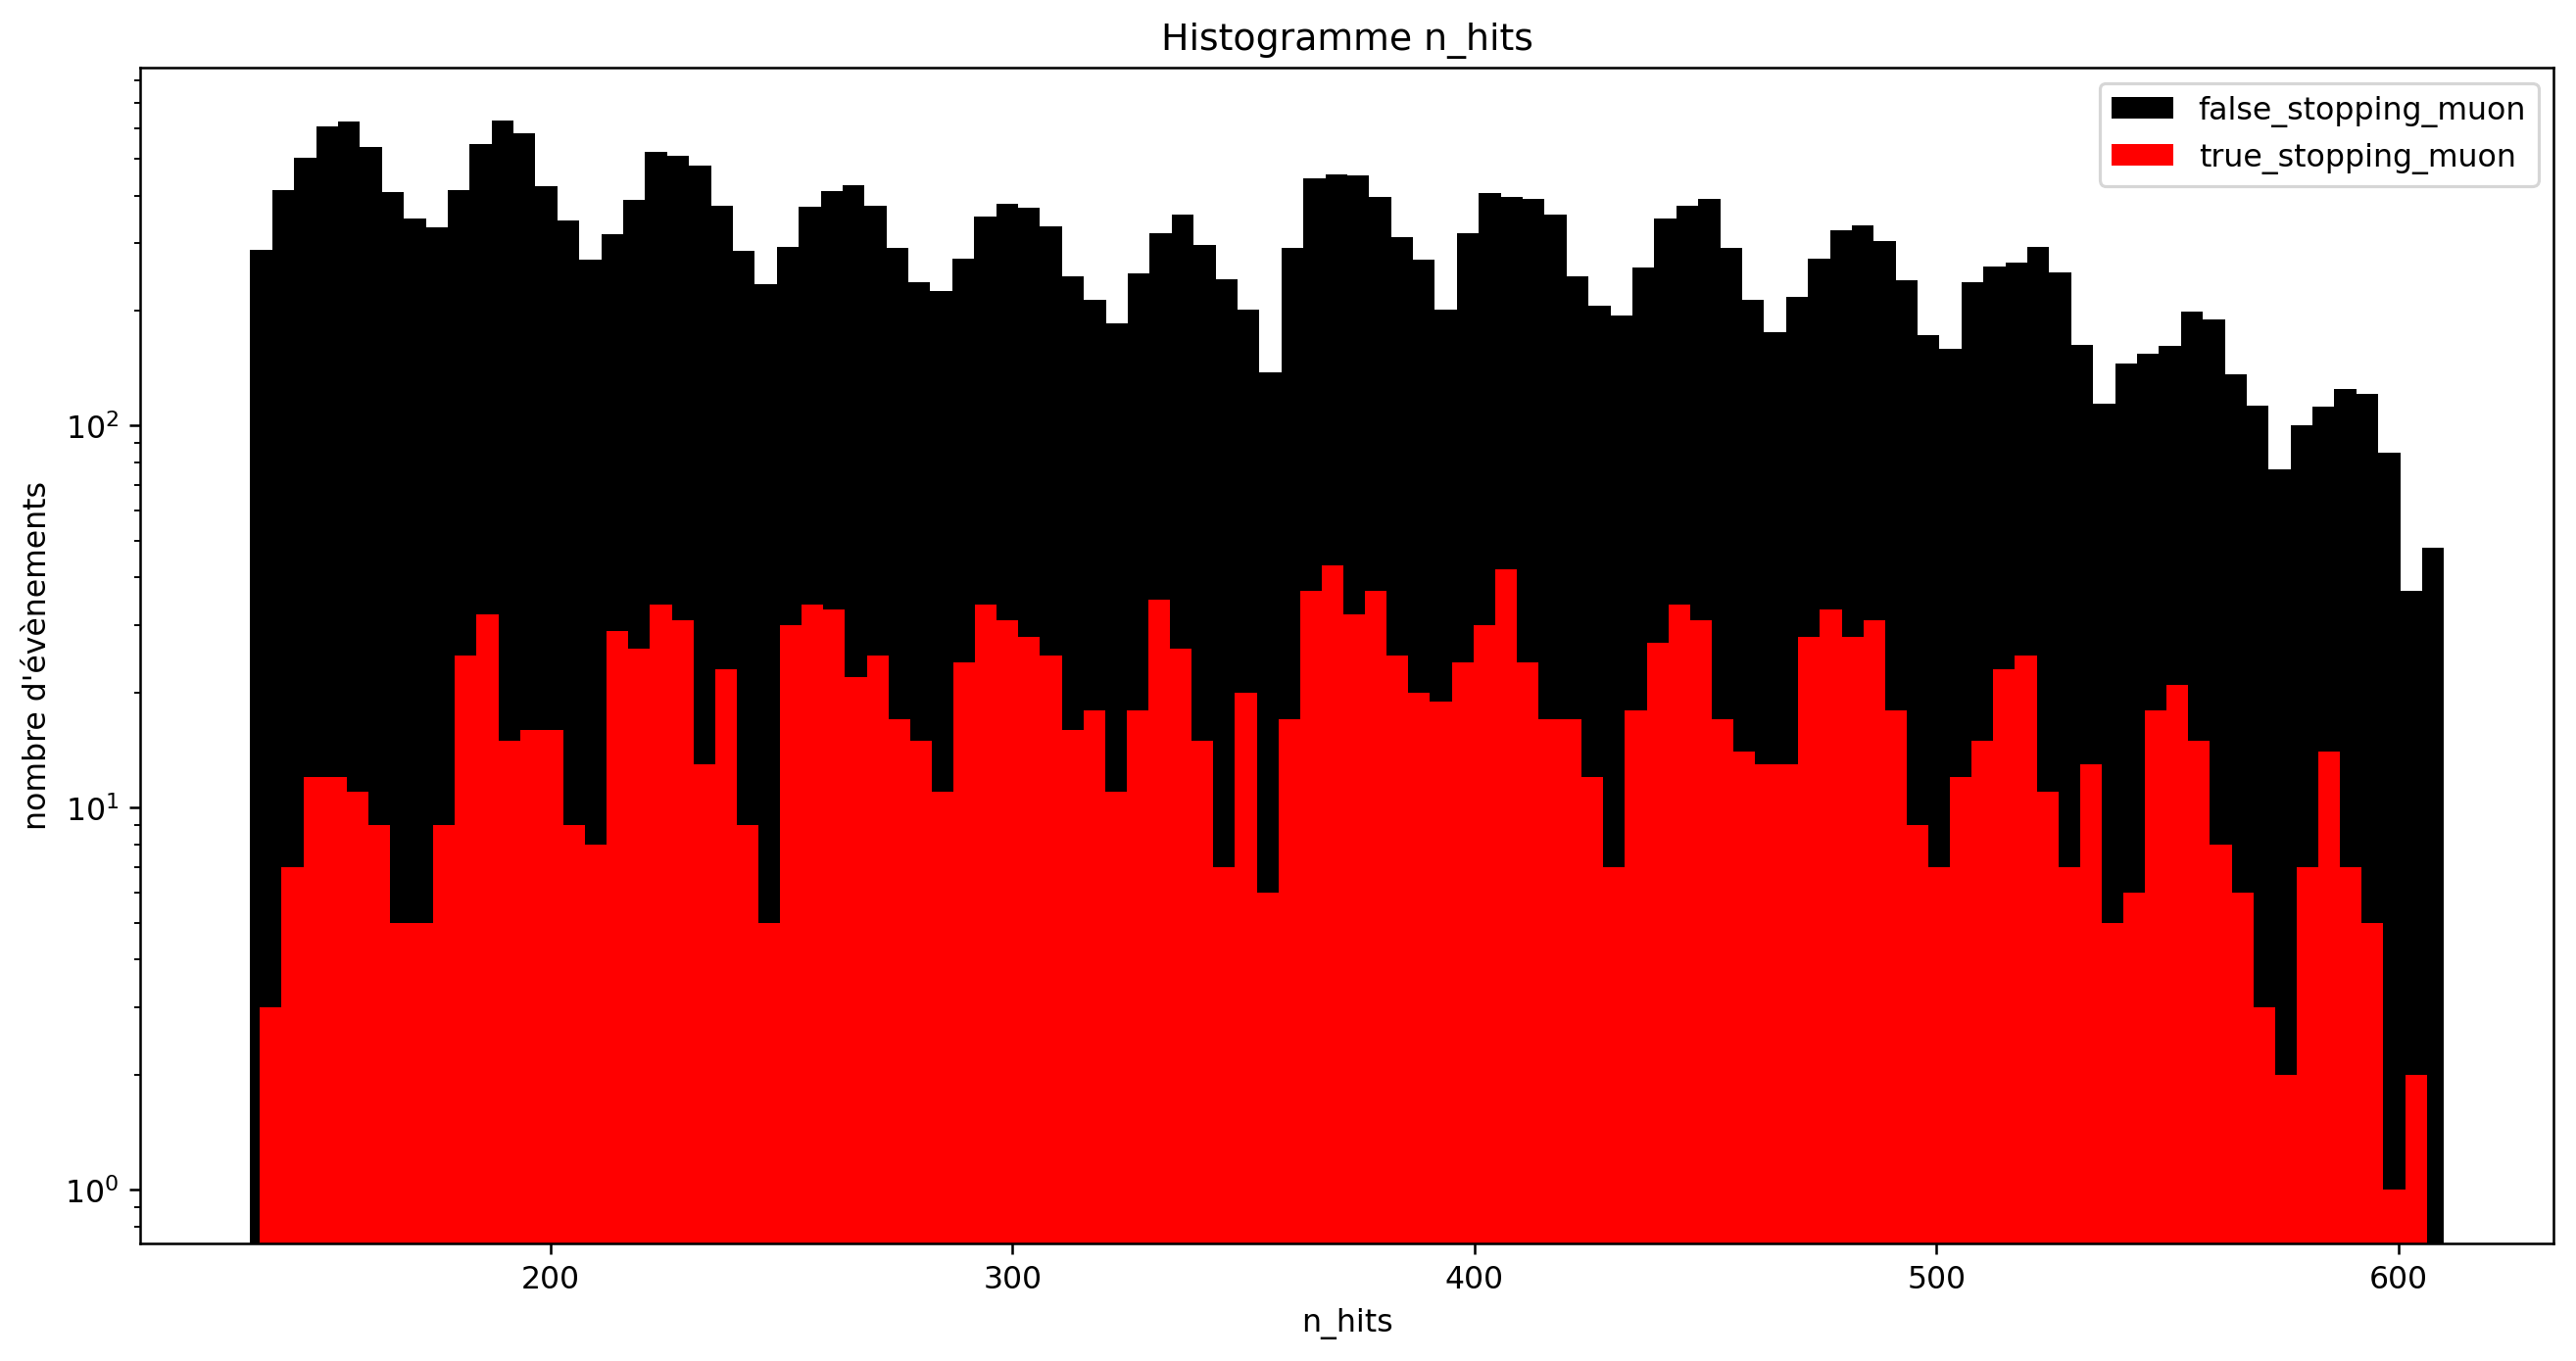

In [54]:
fig = plt.figure(figsize = (14,7),dpi =227)

data = [[minimiser],[maximiser]]
method = ['hist','hist']
index = 111
add_subplot_settings  = {'yscale':'log'}
method_settings = [{'bins':100, 'color':'black', 'label':'false_stopping_muon'},{'bins':100, 'color':'red', 'label':'true_stopping_muon'}]
x_label_settings = {'xlabel':'n_hits'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme n_hits'}

plot(fig, data, method, index, add_subplot_settings = add_subplot_settings, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)
plt.show()

# Test lik

In [59]:
quality_cut_lik = (f.events.tracks.fitinf[:,0,10] > 100) & (f.events.tracks.fitinf[:,0,10] < 580) 
#quality_cut_lik = np.full(len(f.events),True) # pour voir sans le quality cut finalement choisi

In [60]:
maximiser = f.events.tracks.fitinf[:,0,10][cut_true_stopping_muon_inside_reco & quality_cut_lik]
minimiser = f.events.tracks.fitinf[:,0,10][cut_false_stopping_muon_inside_reco & quality_cut_lik]
print(len(maximiser)/2267)
print(len(minimiser)/80907)


1.0
1.0


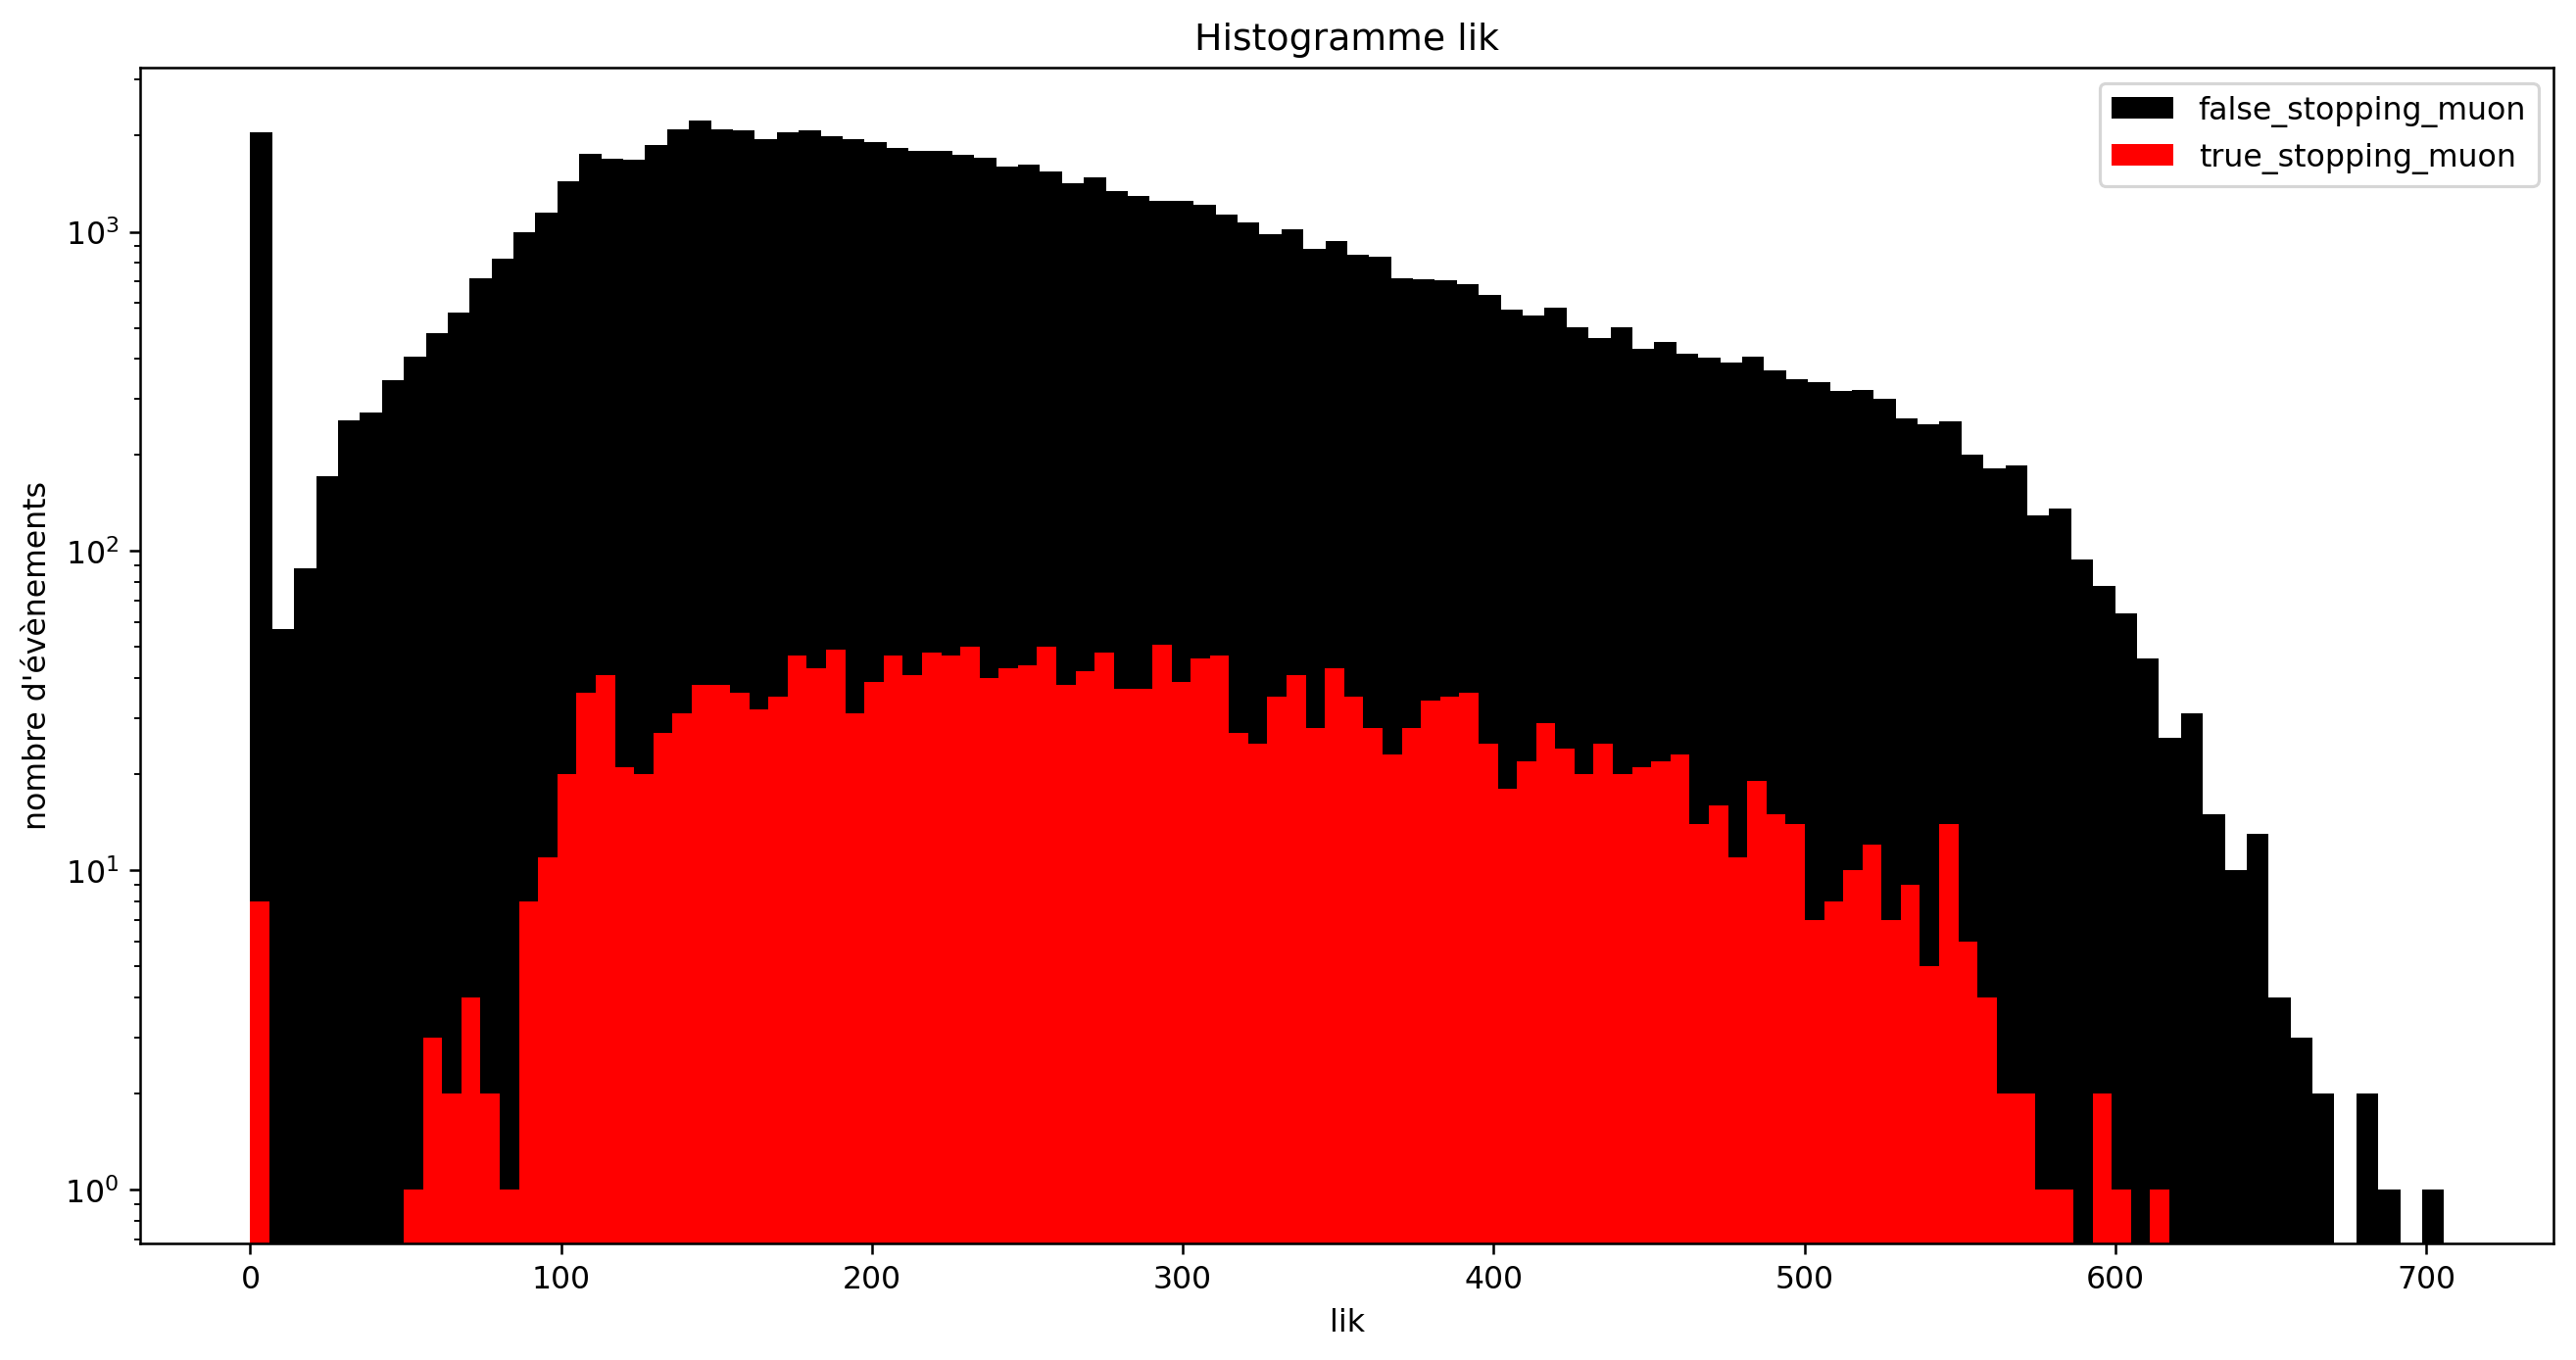

In [61]:
fig = plt.figure(figsize = (14,7),dpi =227)

data = [[minimiser],[maximiser]]
method = ['hist','hist']
index = 111
add_subplot_settings  = {'yscale':'log'}
method_settings = [{'bins':100, 'color':'black', 'label':'false_stopping_muon'},{'bins':100, 'color':'red', 'label':'true_stopping_muon'}]
x_label_settings = {'xlabel':'lik'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme lik'}

plot(fig, data, method, index, add_subplot_settings = add_subplot_settings, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)
plt.show()

# Test dir_z

In [37]:
quality_cut_dir_z = (f.events.tracks.dir_z[:,0] < -0.675) 
#quality_cut_dir_z = np.full(len(f.events),True) # pour voir sans le quality cut finalement choisi

In [38]:
maximiser = f.events.tracks.dir_z[:,0][cut_true_stopping_muon_inside_reco & quality_cut_dir_z]
minimiser = f.events.tracks.dir_z[:,0][cut_false_stopping_muon_inside_reco & quality_cut_dir_z]
print(len(maximiser)/2267)
print(len(minimiser)/80907)


0.9757388619320688
0.7854573769883941


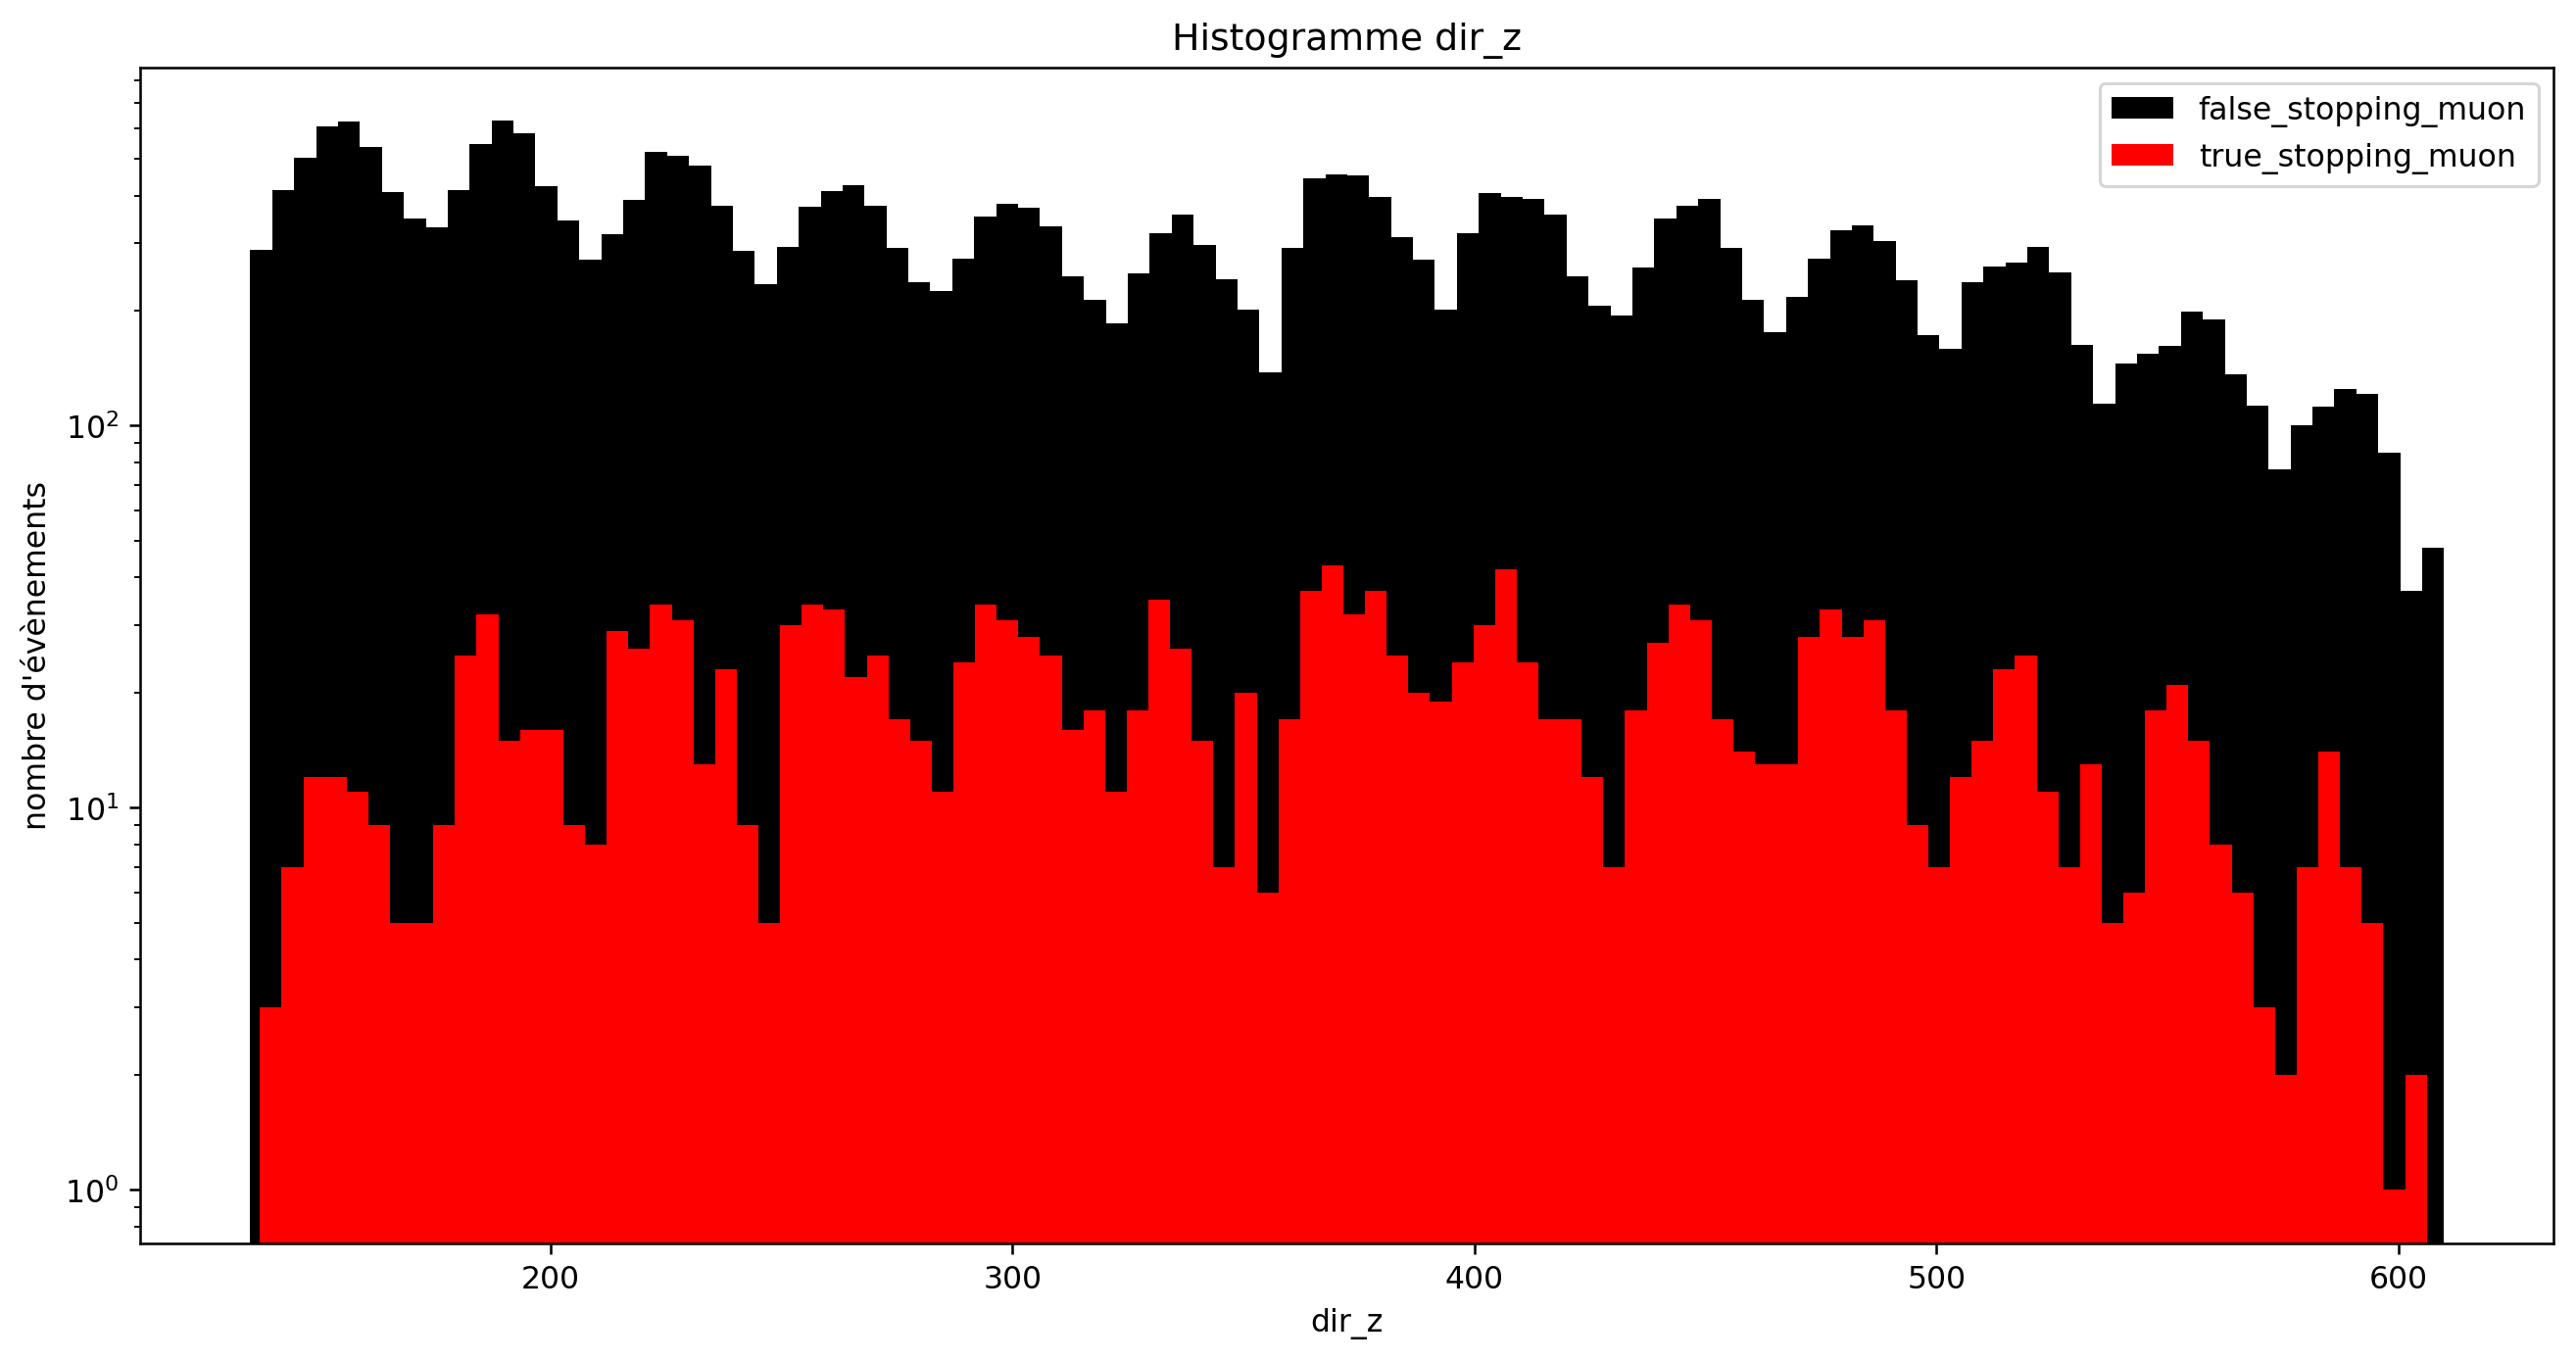

In [56]:
fig = plt.figure(figsize = (14,7),dpi =227)

data = [[minimiser],[maximiser]]
method = ['hist','hist']
index = 111
add_subplot_settings  = {'yscale':'log'}
method_settings = [{'bins':100, 'color':'black', 'label':'false_stopping_muon'},{'bins':100, 'color':'red', 'label':'true_stopping_muon'}]
x_label_settings = {'xlabel':'dir_z'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme dir_z'}

plot(fig, data, method, index, add_subplot_settings = add_subplot_settings, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)
plt.show()

# Test E sur L

In [40]:
quality_cut_E_sur_L = (f.events.tracks.E[:,0] / f.events.tracks.fitinf[:,0,10]) < 18
#quality_cut_E_sur_L = (f.events.tracks.E[:,0] / f.events.tracks.fitinf[:,0,10]) < np.float('inf')

In [41]:
maximiser = (f.events.tracks.E[:,0] / f.events.tracks.fitinf[:,0,10])[cut_true_stopping_muon_inside_reco & quality_cut_E_sur_L]
minimiser = (f.events.tracks.E[:,0] / f.events.tracks.fitinf[:,0,10])[cut_false_stopping_muon_inside_reco & quality_cut_E_sur_L]
print(len(maximiser)/2267)
print(len(minimiser)/80907)


0.9175121305690339
0.5935209561595411


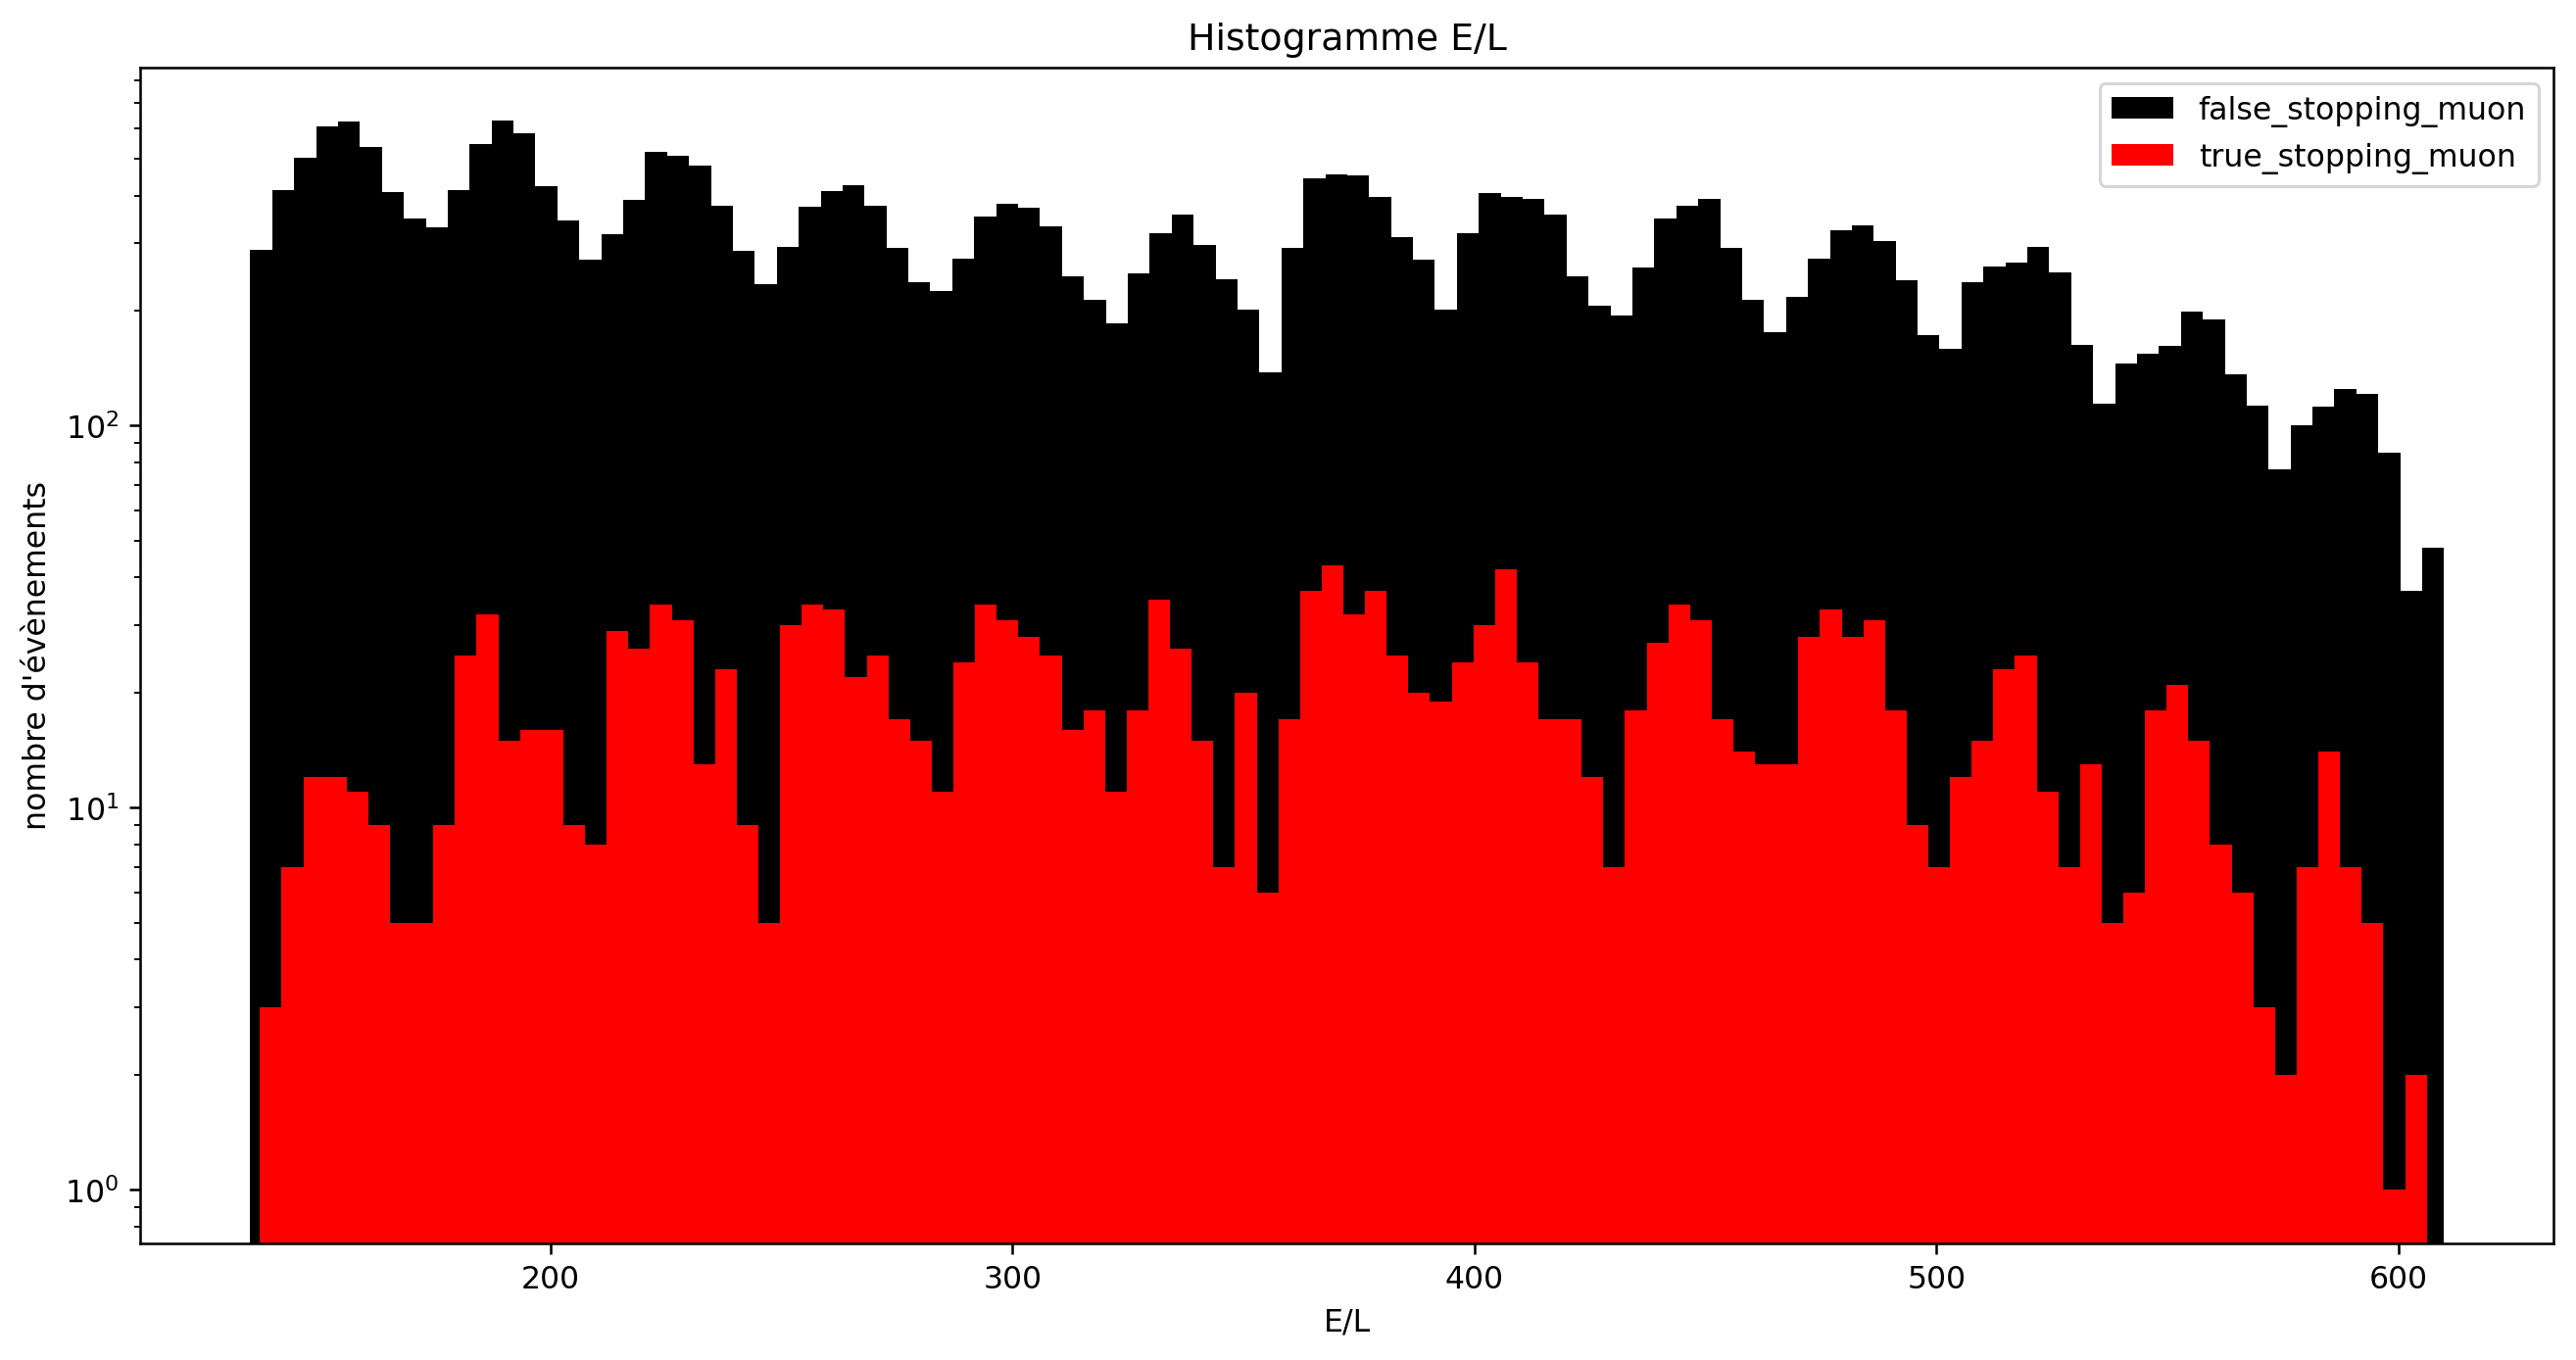

In [57]:
fig = plt.figure(figsize = (14,7),dpi =227)

data = [[minimiser],[maximiser]]
method = ['hist','hist']
index = 111
add_subplot_settings  = {'yscale':'log'}
method_settings = [{'bins':100, 'color':'black', 'label':'false_stopping_muon'},{'bins':100, 'color':'red', 'label':'true_stopping_muon'}]
x_label_settings = {'xlabel':'E/L'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme E/L'}

plot(fig, data, method, index, add_subplot_settings = add_subplot_settings, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)
plt.show()

# Test lik sur nhits

In [68]:
quality_cut_lik_sur_nhits = ((f.events.tracks.lik[:,0] / f.events.tracks.fitinf[:,0,3]) < 2.7) & ((f.events.tracks.lik[:,0] / f.events.tracks.fitinf[:,0,3]) > 0.7) 
#quality_cut_lik_sur_nhits = ((f.events.tracks.E[:,0] / f.events.tracks.fitinf[:,0,10]) < np.float('inf')) & (f.events.tracks.E[:,0] / f.events.tracks.fitinf[:,0,10]) > -np.float('inf')


In [69]:
maximiser = (f.events.tracks.lik[:,0] / f.events.tracks.fitinf[:,0,3])[cut_true_stopping_muon_inside_reco & quality_cut_lik_sur_nhits]
minimiser = (f.events.tracks.lik[:,0] / f.events.tracks.fitinf[:,0,3])[cut_false_stopping_muon_inside_reco & quality_cut_lik_sur_nhits]
print(len(maximiser)/2267)
print(len(minimiser)/80907)


0.976621085134539
0.8902443546293893


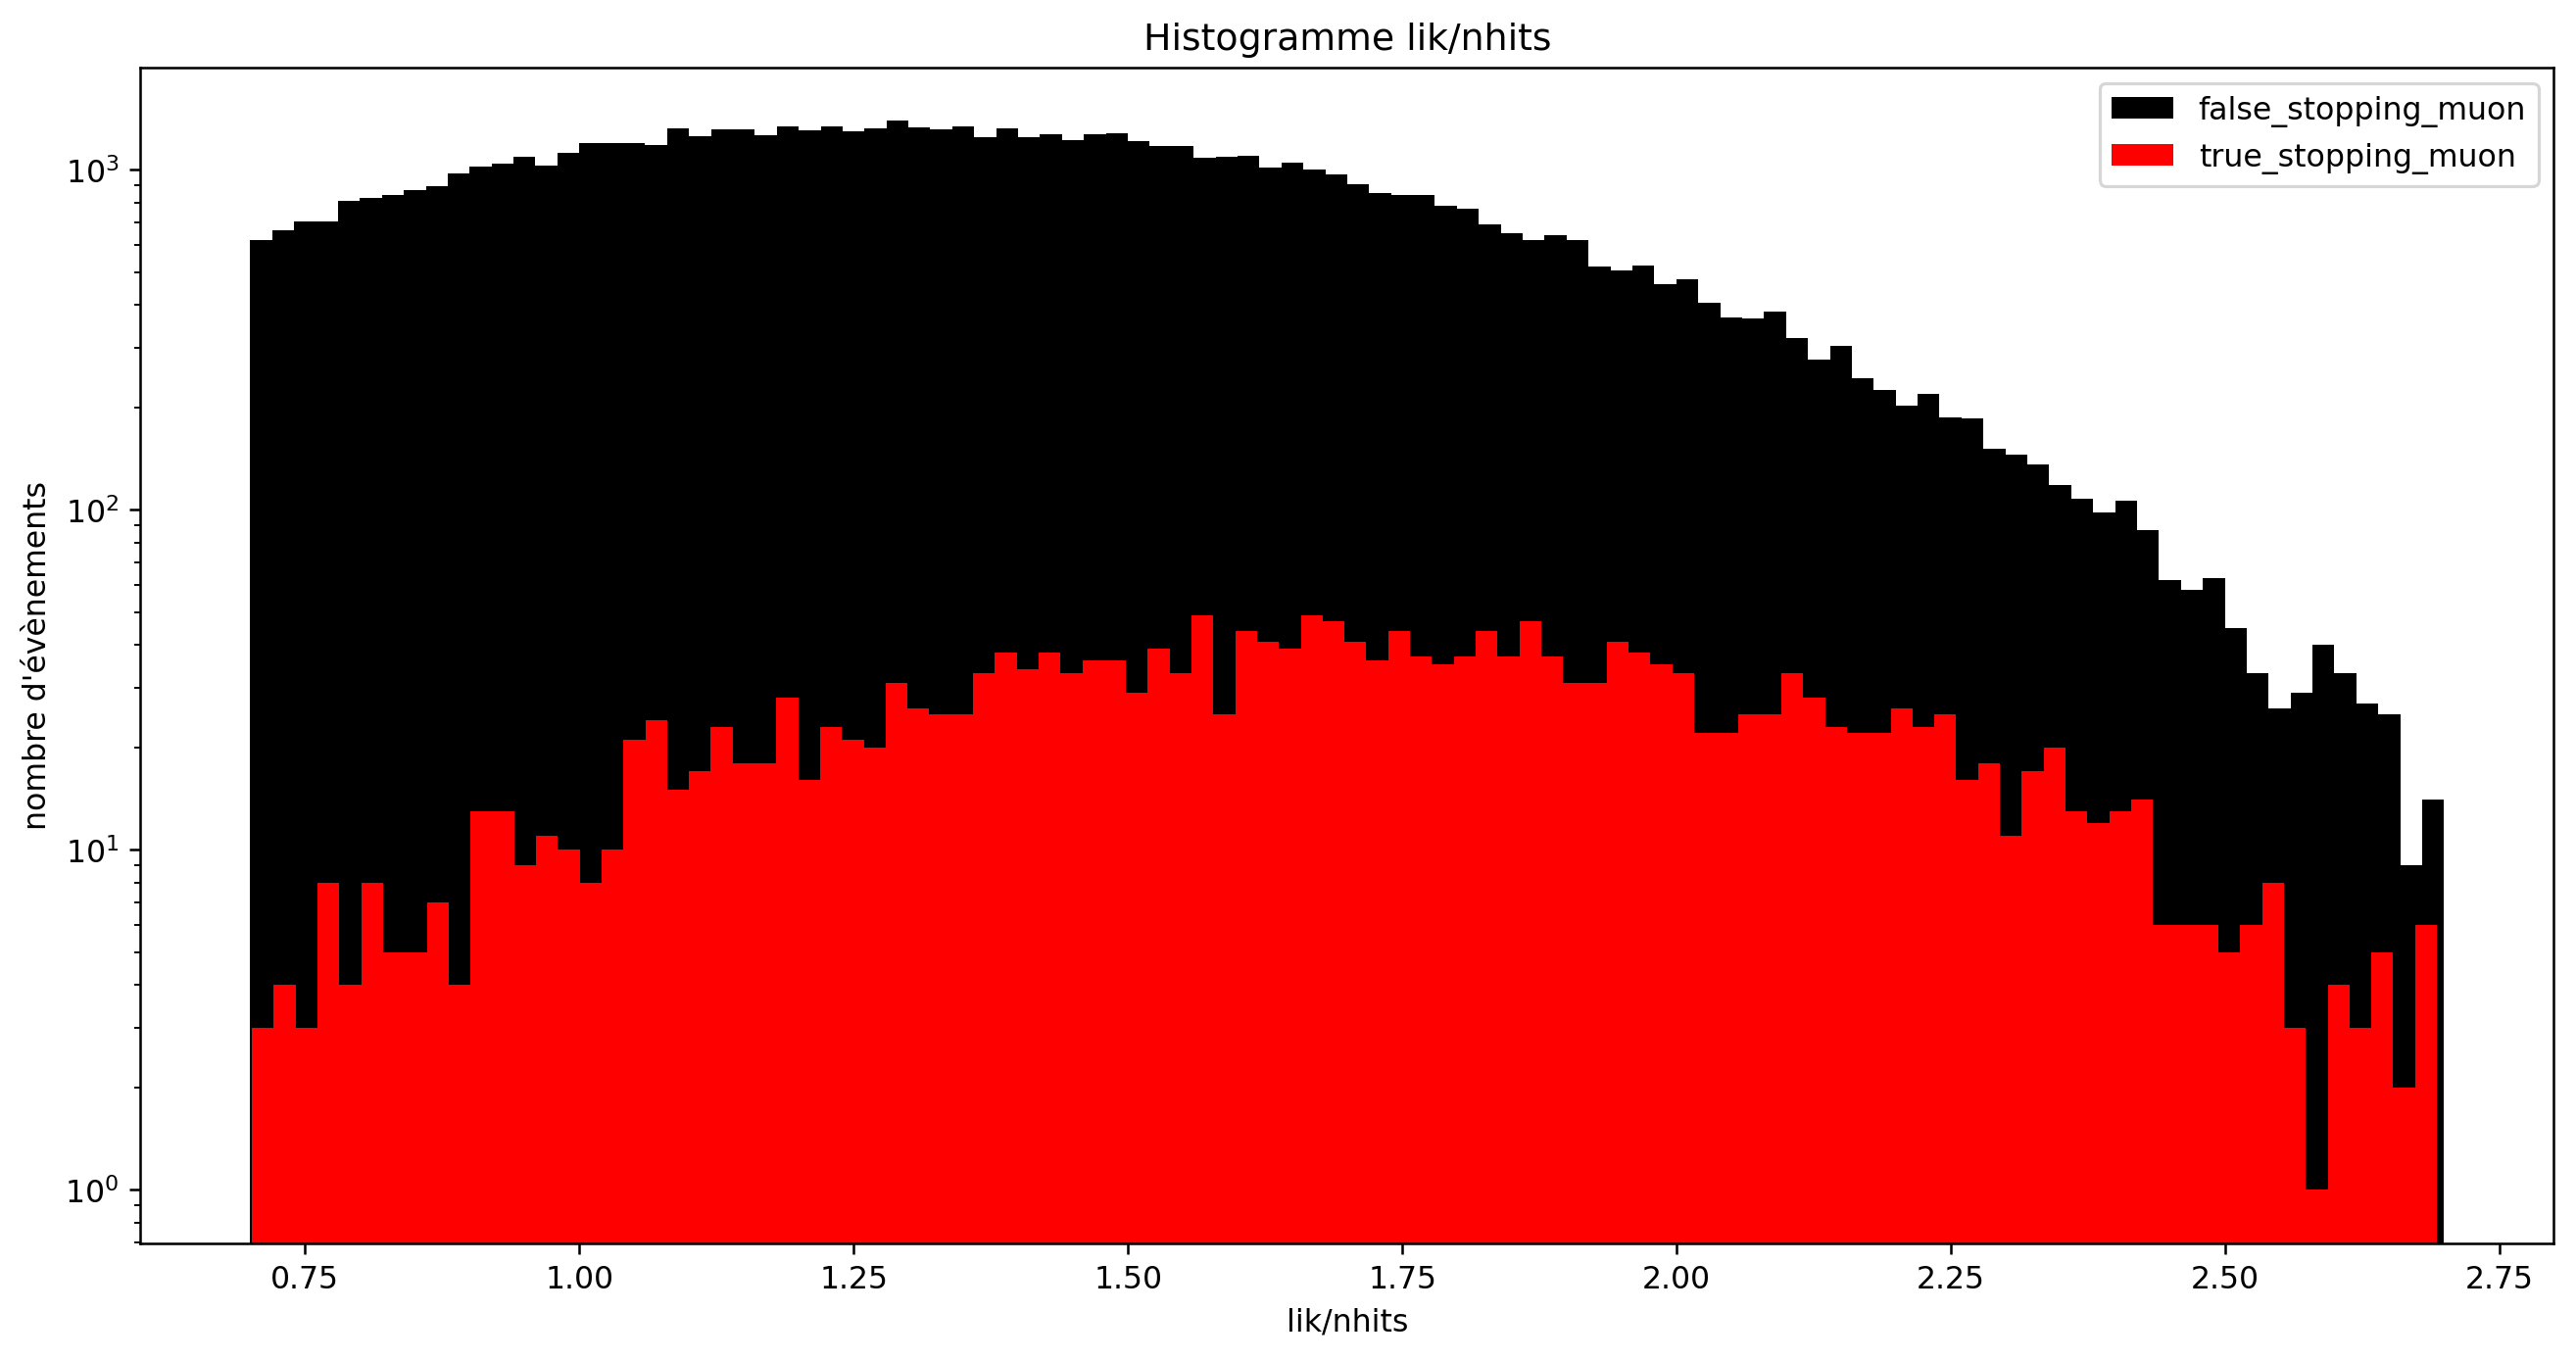

In [70]:
fig = plt.figure(figsize = (14,7),dpi =227)

data = [[minimiser],[maximiser]]
method = ['hist','hist']
index = 111
add_subplot_settings  = {'yscale':'log'}
method_settings = [{'bins':100, 'color':'black', 'label':'false_stopping_muon'},{'bins':100, 'color':'red', 'label':'true_stopping_muon'}]
x_label_settings = {'xlabel':'lik/nhits'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme lik/nhits'}

plot(fig, data, method, index, add_subplot_settings = add_subplot_settings, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)
plt.show()

# Test de nos quality cuts ensemble

In [46]:
quality_cut = quality_cut_dir_z & quality_cut_E_sur_L & quality_cut_energie & quality_cut_lik & quality_cut_lik_sur_nhits & quality_cut_nhits
# quality_cut = n # pour voir sans le quality cut finalement choisi

In [47]:
maximiser = stop_pos_z_mc_reco[cut_true_stopping_muon_inside_reco & quality_cut]
minimiser = stop_pos_z_mc_reco[cut_false_stopping_muon_inside_reco & quality_cut]
print(len(maximiser)/2267)
print(len(minimiser)/80907)


0.8006175562417291
0.3704005833858628


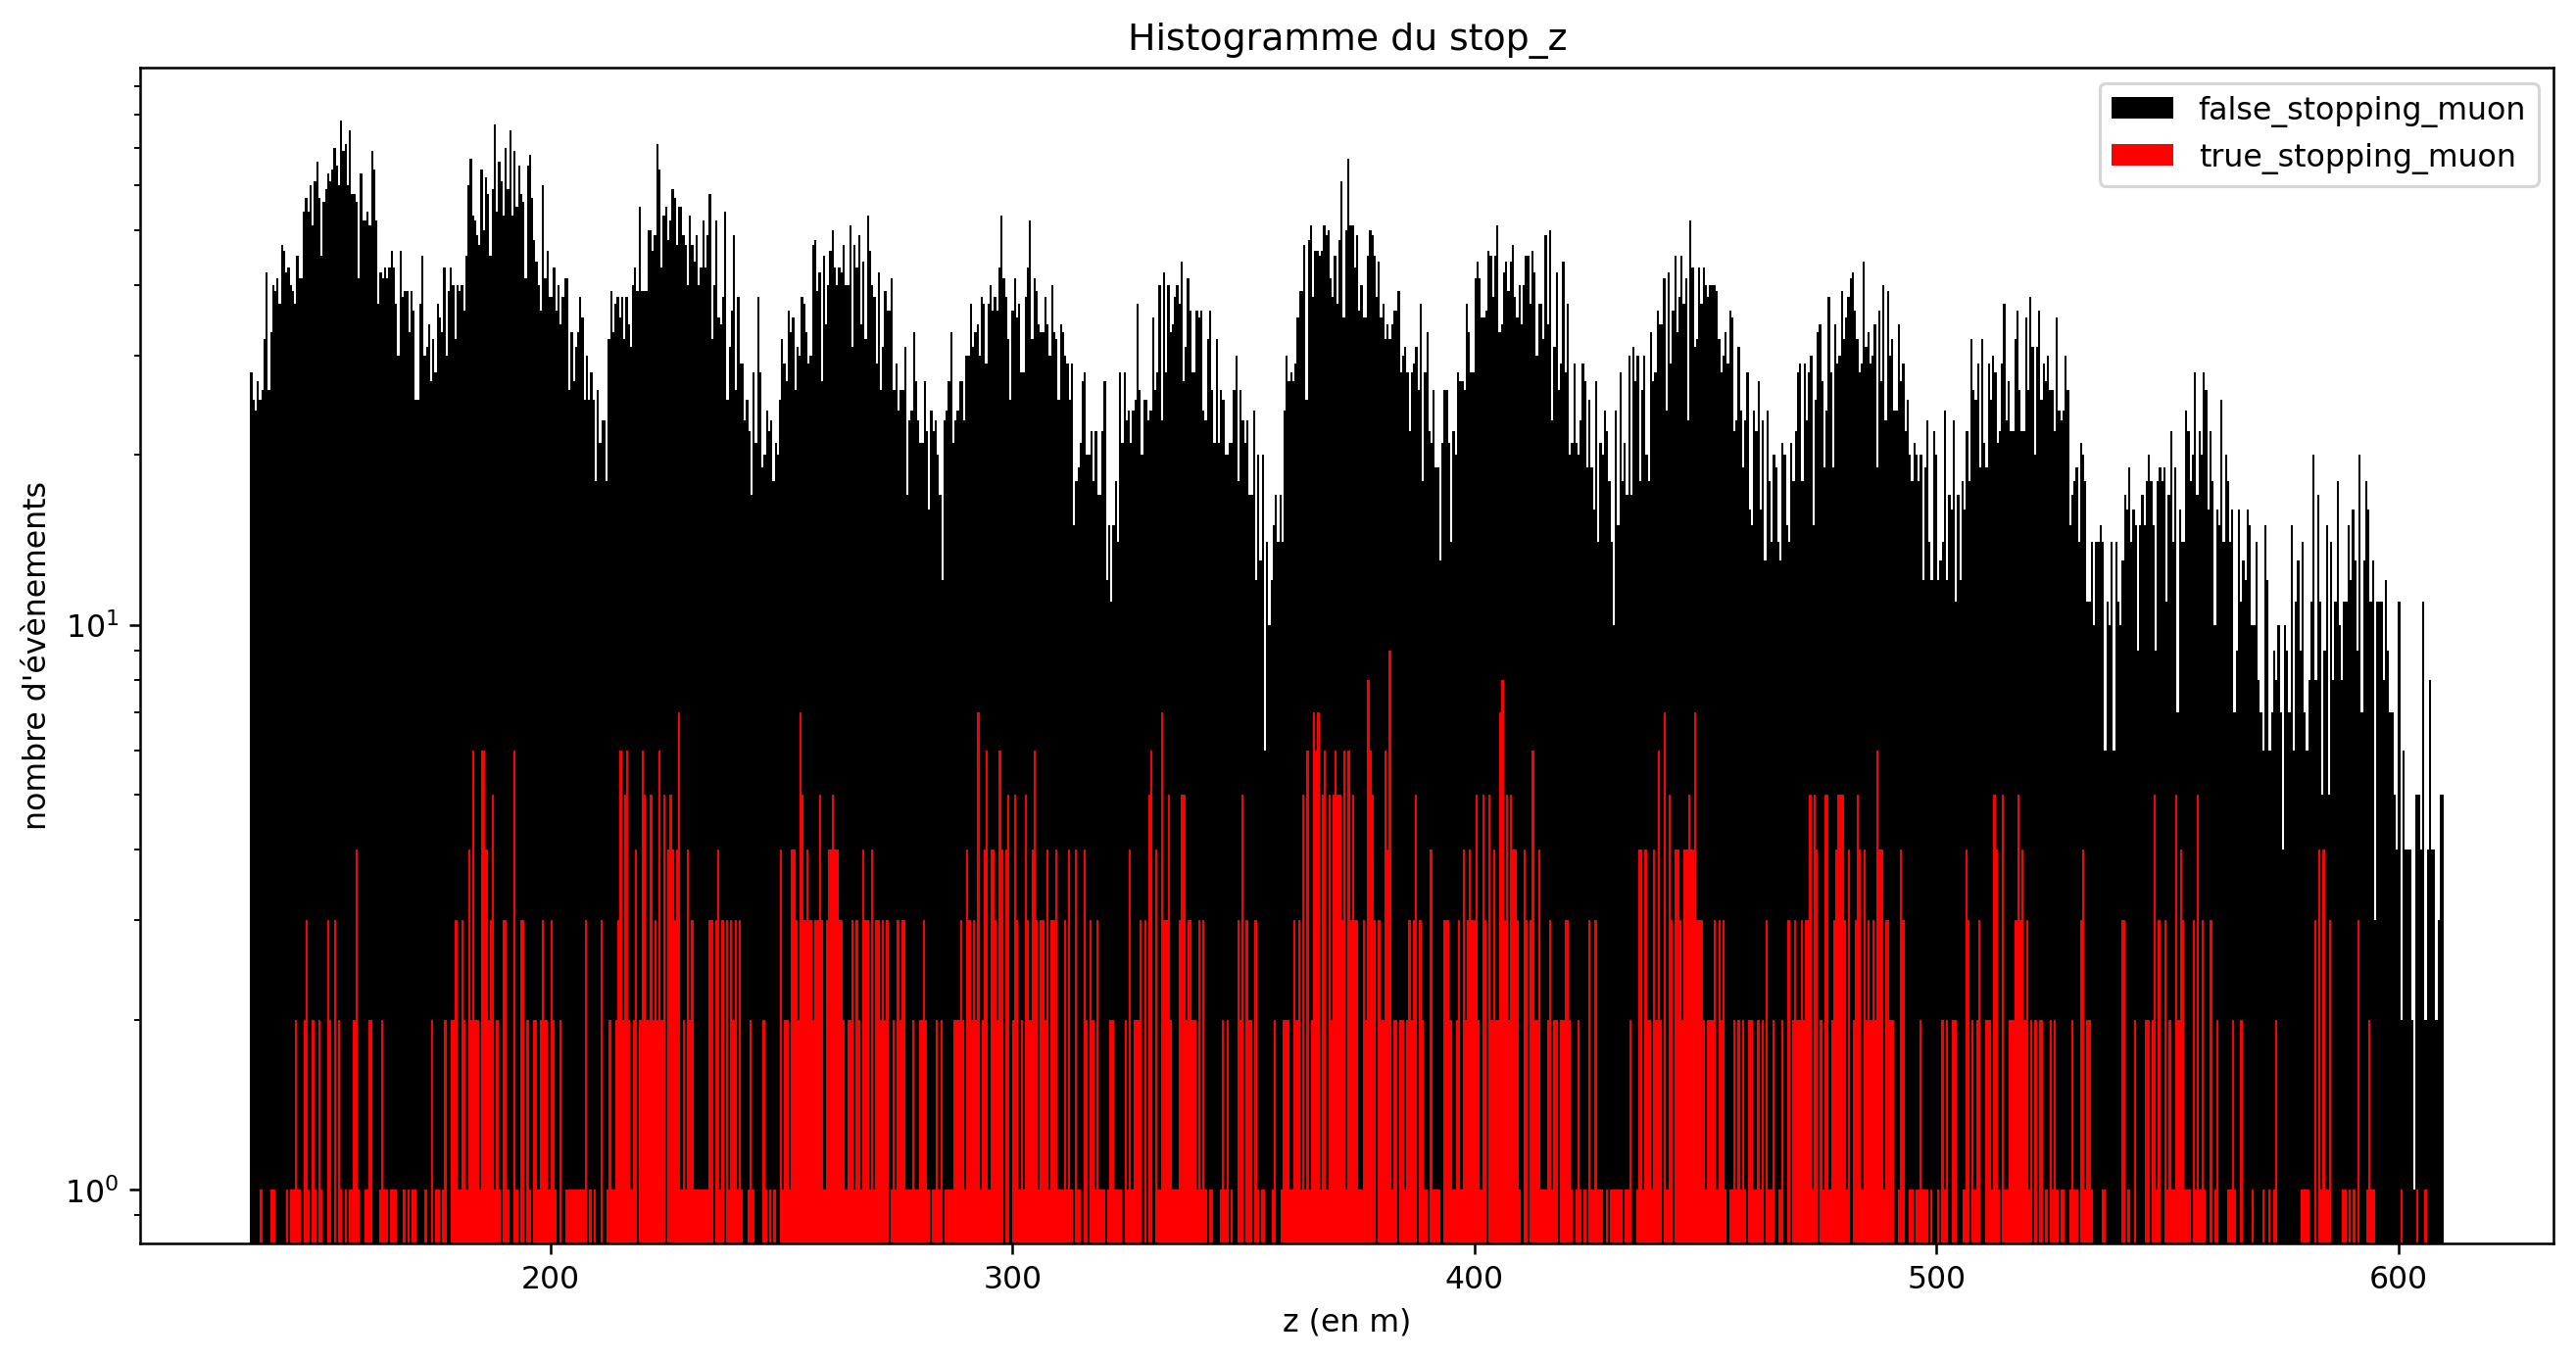

In [52]:
fig = plt.figure(figsize = (14,7),dpi =227)

data = [[minimiser],[maximiser]]
method = ['hist','hist']
index = 111
add_subplot_settings  = {'yscale':'log'}
method_settings = [{'bins':1000, 'color':'black', 'label':'false_stopping_muon'},{'bins':1000, 'color':'red', 'label':'true_stopping_muon'}]
x_label_settings = {'xlabel':'z (en m)'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme du stop_z'}

plot(fig, data, method, index, add_subplot_settings = add_subplot_settings, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)
plt.show()

In [51]:
purity_max = len(stop_pos_z_mc_reco[cutv & quality_cut & (cut_volume(stop_pos_x_mc_reco, stop_pos_y_mc_reco, stop_pos_z_mc_reco, -10, 135, 610))])/len(stop_pos_z_mc_reco[ quality_cut & (cut_volume(stop_pos_x_mc_reco, stop_pos_y_mc_reco, stop_pos_z_mc_reco, -10, 135, 610))])

purity_max

0.05710600006292672

# DOM le plus proche

In [14]:
def distance_nearest_DOM(stop_pos_x,stop_pos_y,stop_pos_z):
    distance = []
    
    ligne_A = [0.95,62.034,100.694,137.686,173.9,210.846,247.795,283.979,320.994,357.972,394.127,430.995,467.655,503.991,540.578,577.257,613.087,649.5,685.805]
    ligne_B = [0.95,62.468,100.278,137.72,174.334,211.48,248.629,285.113,322.478,359.656,395.86,432.729,469.589,505.875,542.862,579.641,615.771,652.234,688.639]
    ligne_C = [0.95,64.335,101.645,138.737,175.051,212.197,249.196,285.631,322.895,360.073,396.378,433.296,470.007,506.292,543.079,580.058,615.939,652.651,689.056]
    ligne_D = [0.95,61.213,97.772,134.764,171.078,208.125,245.323,281.958,319.073,356.3,392.705,429.773,466.784,502.969,540.206,577.235,613.316,650.179,685.333]
    ligne_E = [0.95,64.693,101.953,138.795,175.109,212.106,249.004,285.489,322.853,359.981,396.236,433.104,469.815,505.95,543.037,579.916,616.097,652.709,689.164]
    ligne_F = [0.95,63.274,100.034,136.976,173.04,210.037,246.935,283.32,319.334,357.062,392.917,429.535,465.896,501.831,538.568,575.147,610.878,647.24,683.545]
    
    for i in range(len(stop_pos_z)):
        x = stop_pos_x[i]
        y = stop_pos_y[i]
        z = stop_pos_z[i]

        distanceCalculated = []
        
        indice = 0
        while z > ligne_A[indice] and indice <= len(ligne_A)-2:
            indice += 1
        if indice == 0:
            indice =  1
            
        # ligne A 
        distanceCalculated.append(np.sqrt( (x+29.5)**2 + (y-204.2)**2 + (z-ligne_A[indice])**2 ))
        distanceCalculated.append(np.sqrt( (x+29.5)**2 + (y-204.2)**2 + (z-ligne_A[indice-1])**2 ))
        # ligne B 
        distanceCalculated.append(np.sqrt( (x-249.2)**2 + (y-214.4)**2 + (z-ligne_B[indice])**2 ))
        distanceCalculated.append(np.sqrt( (x-249.2)**2 + (y-214.4)**2 + (z-ligne_B[indice-1])**2 ))
        # ligne C 
        distanceCalculated.append(np.sqrt( (x-172.8)**2 + (y-130.8)**2 + (z-ligne_C[indice])**2 ))
        distanceCalculated.append(np.sqrt( (x-172.8)**2 + (y-130.8)**2 + (z-ligne_C[indice-1])**2 ))
        # ligne D 
        distanceCalculated.append(np.sqrt( (x-116.9)**2 + (y-107.5)**2 + (z-ligne_D[indice])**2 ))
        distanceCalculated.append(np.sqrt( (x-116.9)**2 + (y-107.5)**2 + (z-ligne_D[indice-1])**2 ))
        # ligne E 
        distanceCalculated.append(np.sqrt( (x-51.85)**2 + (y-180.35)**2 + (z-ligne_E[indice])**2 ))
        distanceCalculated.append(np.sqrt( (x-51.85)**2 + (y-180.35)**2 + (z-ligne_E[indice-1])**2 ))
        # ligne F 
        distanceCalculated.append(np.sqrt( (x-145)**2 + (y-199.4)**2 + (z-ligne_F[indice])**2 ))
        distanceCalculated.append(np.sqrt( (x-145)**2 + (y-199.4)**2 + (z-ligne_F[indice-1])**2 ))
    
        distance.append(min(distanceCalculated))
        
    return np.array(distance)


In [12]:
file = MonteCarlo
file_range = 1000000

stop_pos_x_mc_reco, stop_pos_y_mc_reco, stop_pos_z_mc_reco = stop_pos(file,file_range)
stop_pos_x_mc_true, stop_pos_y_mc_true, stop_pos_z_mc_true = stop_pos_mc_true(file_range)

In [15]:
a = time()
distance_DOM_mc_reco = distance_nearest_DOM(stop_pos_x_mc_reco,stop_pos_y_mc_reco,stop_pos_z_mc_reco)
b = time()
print(b-a)

37.611178159713745


In [16]:
print(distance_DOM_mc_reco)

[        nan         nan 41.91866832 ...         nan         nan
         nan]


In [17]:
def distance_nearest_line(stop_pos_x,stop_pos_y,stop_pos_z):
    distance = []
    
    for i in range(len(stop_pos_z)):
        x = stop_pos_x[i]
        y = stop_pos_y[i]
        z = stop_pos_z[i]
        
        distanceCalculated = []
        
        # ligne A 
        distanceCalculated.append(np.sqrt( (x+29.5)**2 + (y-204.2)**2 ))
        # ligne B 
        distanceCalculated.append(np.sqrt( (x-249.2)**2 + (y-214.4)**2 ))
        # ligne C 
        distanceCalculated.append(np.sqrt( (x-172.8)**2 + (y-130.8)**2 ))
        # ligne D 
        distanceCalculated.append(np.sqrt( (x-116.9)**2 + (y-107.5)**2 ))
        # ligne E 
        distanceCalculated.append(np.sqrt( (x-51.85)**2 + (y-180.35)**2 ))
        # ligne F 
        distanceCalculated.append(np.sqrt( (x-145)**2 + (y-199.4)**2 ))
    
        distance.append(min(distanceCalculated))
        
    return np.array(distance)


## répartition lik / distance 

In [18]:
f = kio.OfflineReader(MonteCarlo)[0:file_range]
isNotNan = np.invert(np.isnan(distance_DOM_mc_reco))
print(len(isNotNan))
distance_DOM_mc_reco_not_nan = distance_DOM_mc_reco[isNotNan]
lik_not_nan =  f.events.tracks.lik[:,0][isNotNan]



1000000


<AxesSubplot:xlabel='distance', ylabel='lik'>

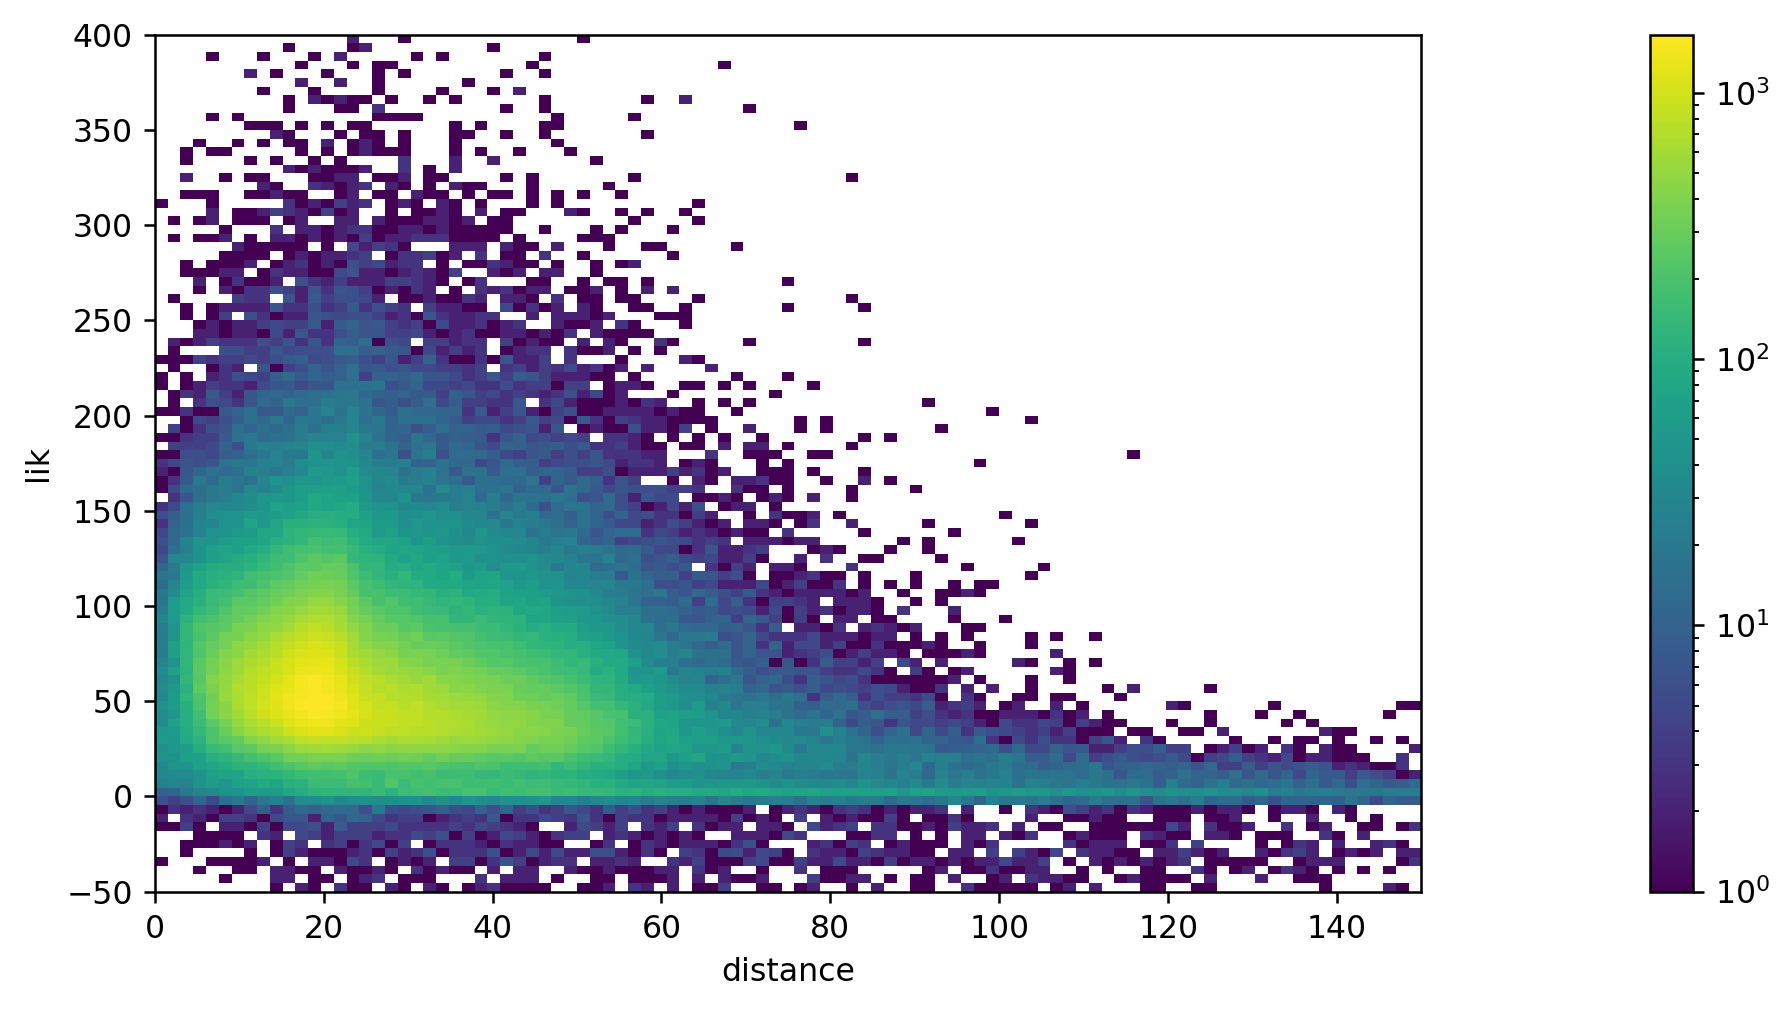

In [19]:
fig = plt.figure(figsize = (10,5), dpi = 227)

data = [[distance_DOM_mc_reco_not_nan.__array__(),lik_not_nan.__array__()]]
method = ['hist2d']
index = 111
method_settings = [{'bins':[np.linspace(0,150,100),np.linspace(-50,400,100)],'norm':mpl.colors.LogNorm()}]
x_label_settings = {'xlabel':'distance'}
y_label_settings = {'ylabel':"lik"}
title_settings = {'label':''}

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)


## répartition true stopping / distance

In [43]:
f = kio.OfflineReader(MonteCarlo)[0:file_range]
isNotNan = np.invert(np.isnan(distance_DOM_mc_reco))
cut_true_stopping_muon_inside = cut_volume(stop_pos_x_mc_reco, stop_pos_y_mc_reco, stop_pos_z_mc_reco, -10, 135, 610) & cut_volume(stop_pos_x_mc_true, stop_pos_y_mc_true, stop_pos_z_mc_true, -10, 135, 610) & isNotNan
cut_false_stopping_muon_inside = cut_volume(stop_pos_x_mc_reco, stop_pos_y_mc_reco, stop_pos_z_mc_reco, -10, 135, 610) & np.invert(cut_volume(stop_pos_x_mc_true, stop_pos_y_mc_true, stop_pos_z_mc_true, -10, 135, 610)) & isNotNan


distance_DOM_true_mc_reco_inside = distance_DOM_mc_reco[cut_true_stopping_muon_inside]
distance_DOM_false_mc_reco_inside = distance_DOM_mc_reco[cut_false_stopping_muon_inside]


<AxesSubplot:xlabel='distance', ylabel="nb d'évènements">

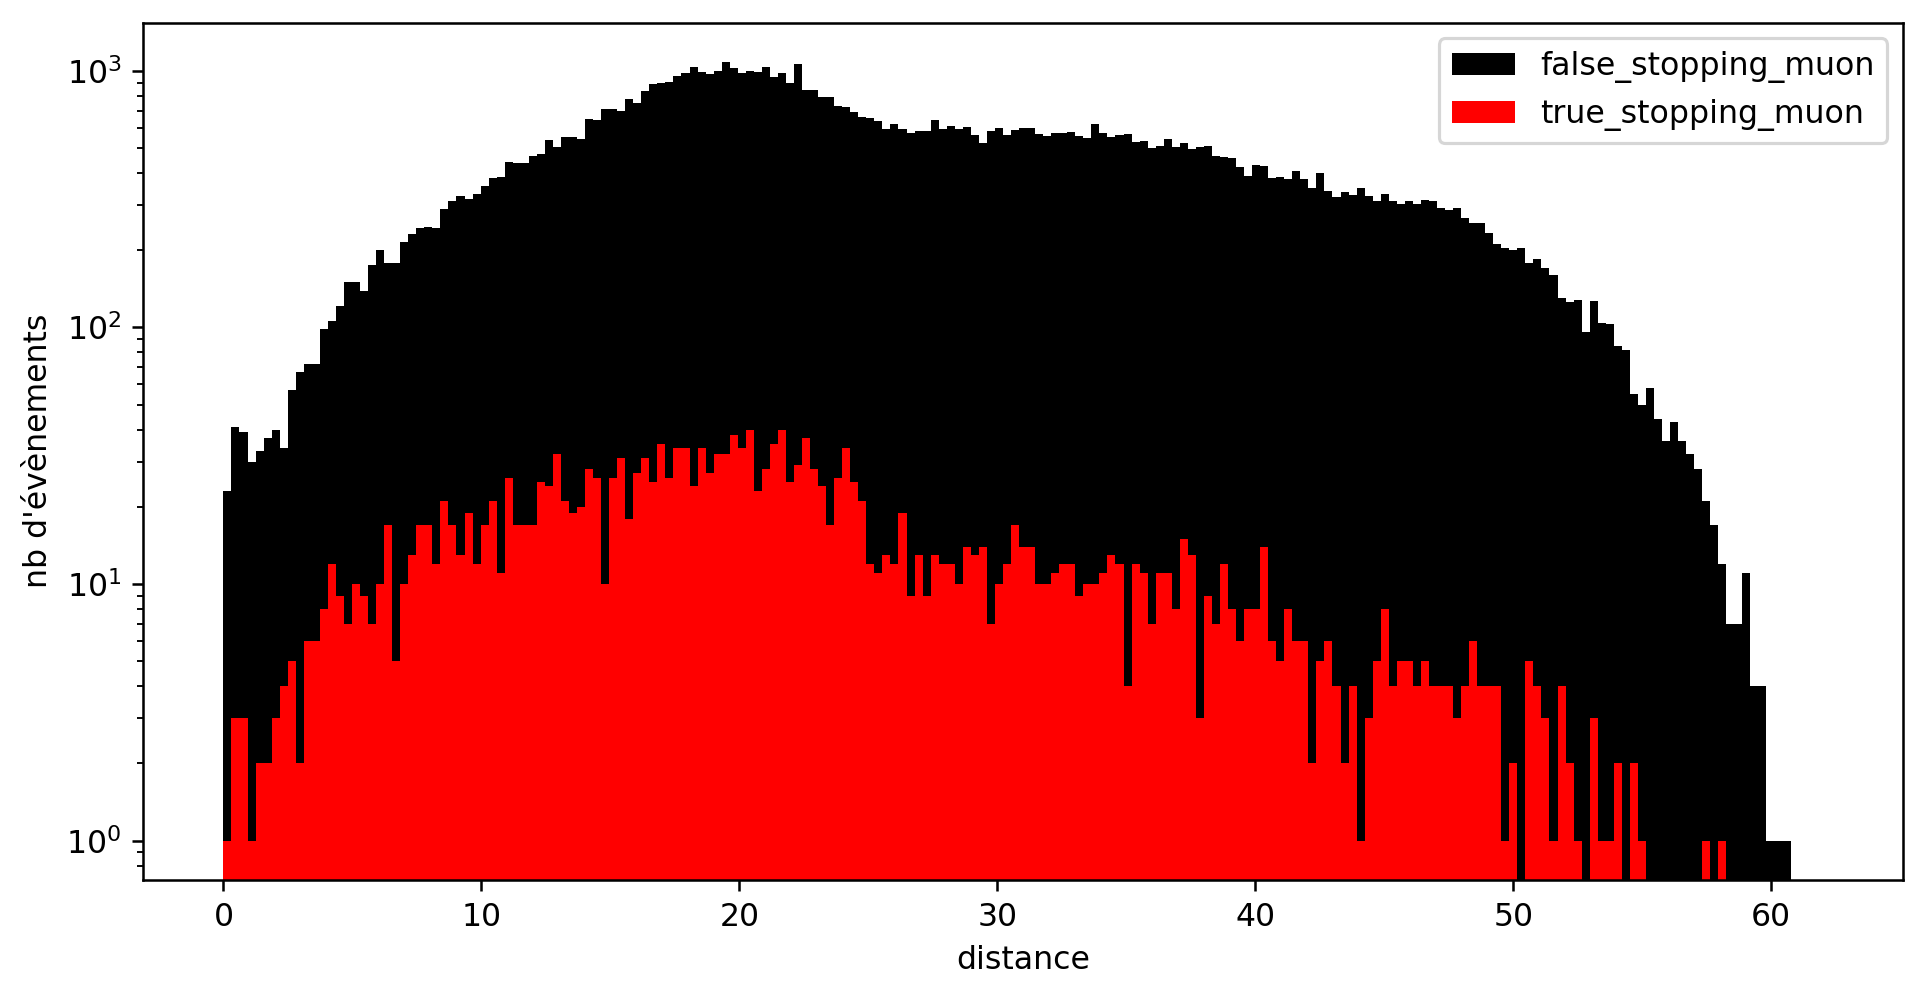

In [52]:
fig = plt.figure(figsize = (10,5), dpi = 227)

data = [[distance_DOM_false_mc_reco_inside.__array__()],[distance_DOM_true_mc_reco_inside.__array__()]]
method = ['hist','hist']
index = 111
add_subplot_settings  = {'yscale':'log'}
method_settings = [{'bins':np.linspace(0,62,200), 'label':'false_stopping_muon','color':'black'}, {'bins':np.linspace(0,62,200), 'label':'true_stopping_muon','color':'red'}]
x_label_settings = {'xlabel':'distance'}
y_label_settings = {'ylabel':"nb d'évènements"}
title_settings = {'label':''}

plot(fig, data, method, index,add_subplot_settings = add_subplot_settings, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)


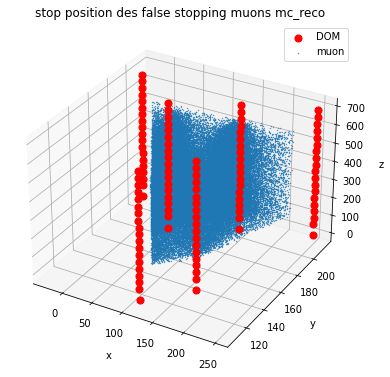

In [53]:
fig = plt.figure(figsize = (14,14))

data = [[dom_x,dom_y,dom_z],[stop_pos_x_mc_reco[cut_false_stopping_muon_inside],stop_pos_y_mc_reco[cut_false_stopping_muon_inside],stop_pos_z_mc_reco[cut_false_stopping_muon_inside]]]
method = ['scatter','scatter']
index = 221
add_subplot_settings =  {}
method_settings = [{'label':'DOM' ,'color':'red','marker':'o', 'depthshade':False, 's':50}, {'label':'muon', 'marker':'.', 'depthshade':False, 's':0.5}]
title_settings = {'label':'stop position des false stopping muons mc_reco'} 
x_label_settings = {'xlabel':'x', 'labelpad':8}
y_label_settings = {'ylabel':'y', 'labelpad':8}
z_label_settings = {'zlabel':'z', 'labelpad':8}
legend_settings = {}
colorbar_settings = False

plot(fig, data, method, index, add_subplot_settings = add_subplot_settings, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings, z_label_settings = z_label_settings, colorbar_settings = colorbar_settings)
plt.show()


## répartition lik sur nhits / distance

In [55]:
f = kio.OfflineReader(MonteCarlo)[0:file_range]
isNotNan = np.invert(np.isnan(distance_DOM_mc_reco))

cut_lik_sur_nits = (( f.events.tracks.lik[:,0] / f.events.tracks.fitinf[:,0,3] ) <  np.float('inf') ) & (( f.events.tracks.lik[:,0] / f.events.tracks.fitinf[:,0,3] ) > 0 ) 
distance_DOM_mc_reco_not_nan = distance_DOM_mc_reco[isNotNan & cut_lik_sur_nits]
lik_sur_nhits =  ( f.events.tracks.lik[:,0] / f.events.tracks.fitinf[:,0,3] ) [isNotNan & cut_lik_sur_nits]


/var/folders/hs/6rw886x92wq2qdy_wmfmm5m40000gn/T/ipykernel_35716/3352050948.py:4: DeprecationWarning: `np.float` is a deprecated alias for the builtin `float`. To silence this warning, use `float` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.float64` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  cut_lik_sur_nits = (( f.events.tracks.lik[:,0] / f.events.tracks.fitinf[:,0,3] ) <  np.float('inf') ) & (( f.events.tracks.lik[:,0] / f.events.tracks.fitinf[:,0,3] ) > 0 )


<AxesSubplot:xlabel='distance', ylabel='lik sur nhits'>

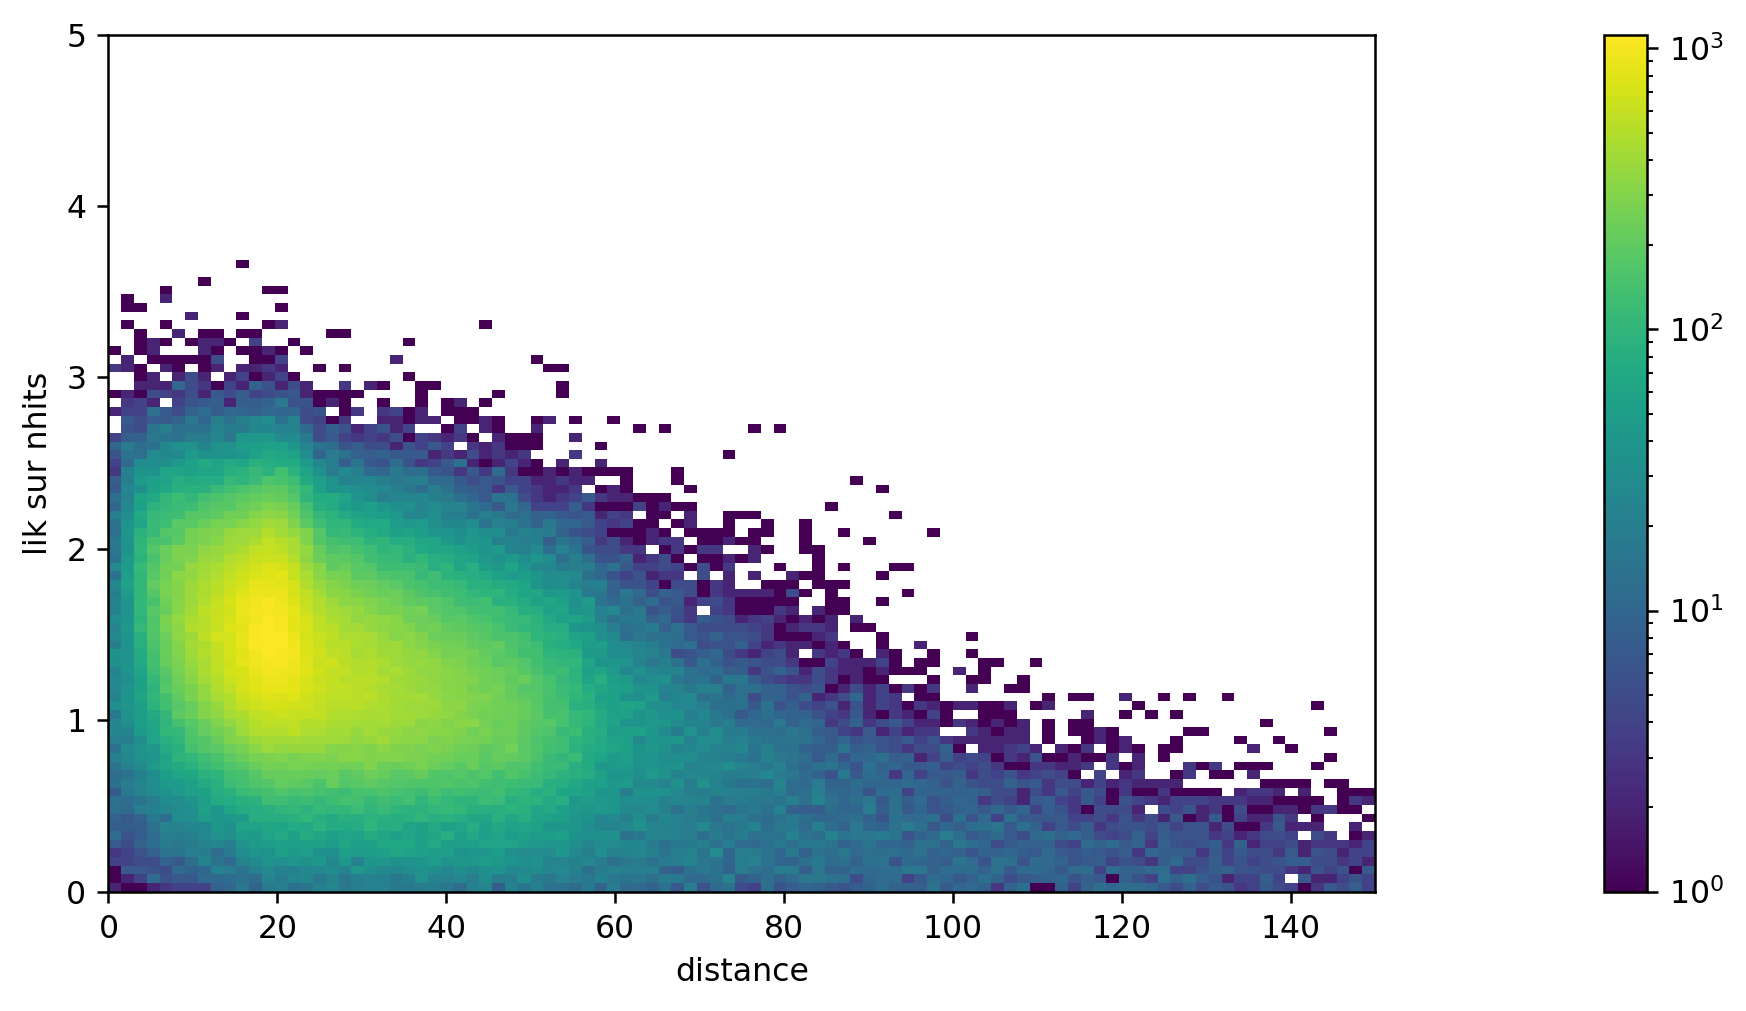

In [58]:
fig = plt.figure(figsize = (10,5), dpi = 227)

data = [[distance_DOM_mc_reco_not_nan.__array__(),lik_sur_nhits.__array__()]]
method = ['hist2d']
index = 111
method_settings = [{'bins':[np.linspace(0,150,100),np.linspace(0,5,100)],'norm':mpl.colors.LogNorm()}]
x_label_settings = {'xlabel':'distance'}
y_label_settings = {'ylabel':"lik sur nhits"}
title_settings = {'label':''}

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)


# Calcul erreur stop position 

In [66]:
delta_stop_pos_x = np.abs( stop_pos_x_mc_reco[isNotNan] -  stop_pos_x_mc_true[isNotNan])
delta_stop_pos_y = np.abs( stop_pos_y_mc_reco[isNotNan] -  stop_pos_y_mc_true[isNotNan])
delta_stop_pos_z = np.abs( stop_pos_z_mc_reco[isNotNan] -  stop_pos_z_mc_true[isNotNan])
delta_stop_pos_distance = np.sqrt(delta_stop_pos_x**2 + delta_stop_pos_y**2 + delta_stop_pos_z**2)

In [148]:
np.median(delta_stop_pos_distance)

405.9334958709172

<AxesSubplot:title={'center':'Histogramme du delta_stop_pos_x'}, xlabel='delta x  [m]', ylabel="nombre d'évènements">

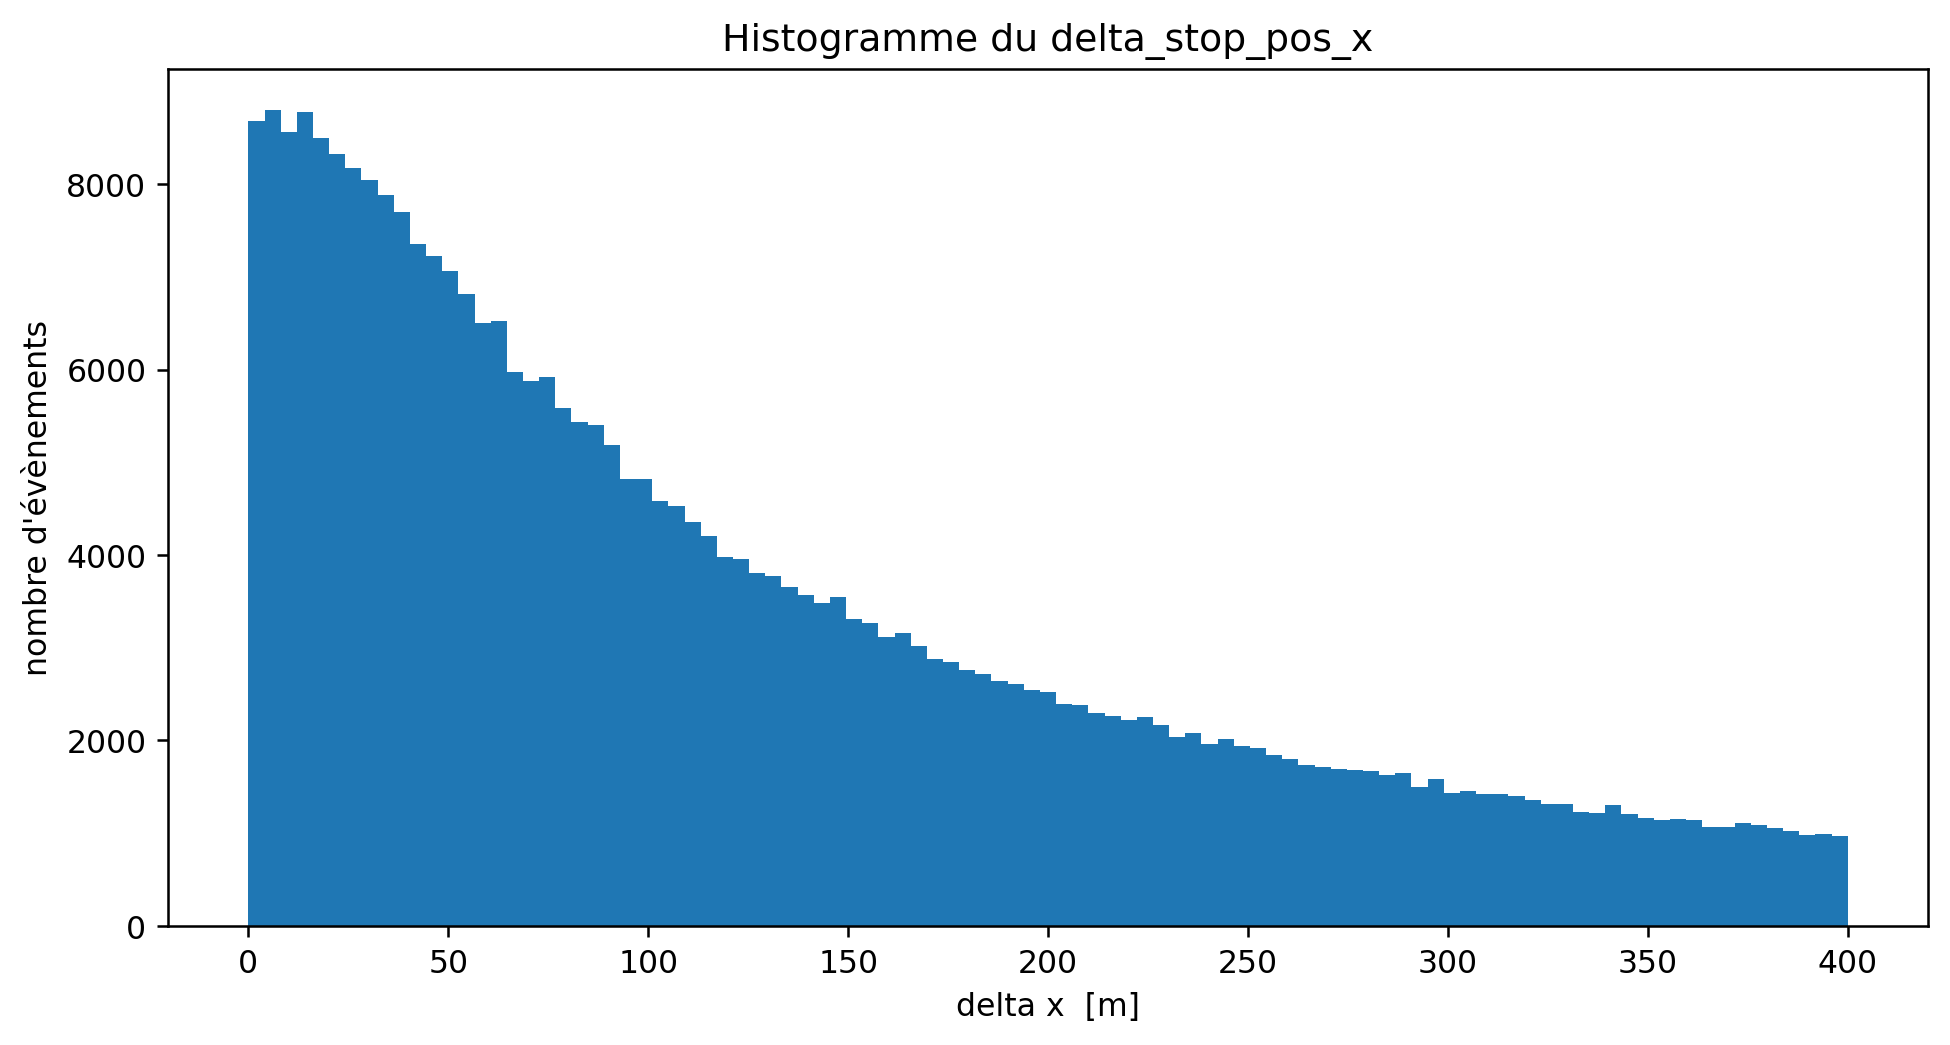

In [77]:
fig = plt.figure(figsize = (10,5), dpi = 227)

data = [[delta_stop_pos_x]]
method = ['hist']
index = 111
method_settings = [{'bins':np.linspace(0,400,100)}]
x_label_settings = {'xlabel':'delta x  [m]'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme du delta_stop_pos_x'}

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)


<AxesSubplot:title={'center':'Histogramme du delta_stop_pos_y'}, xlabel='delta y  [m]', ylabel="nombre d'évènements">

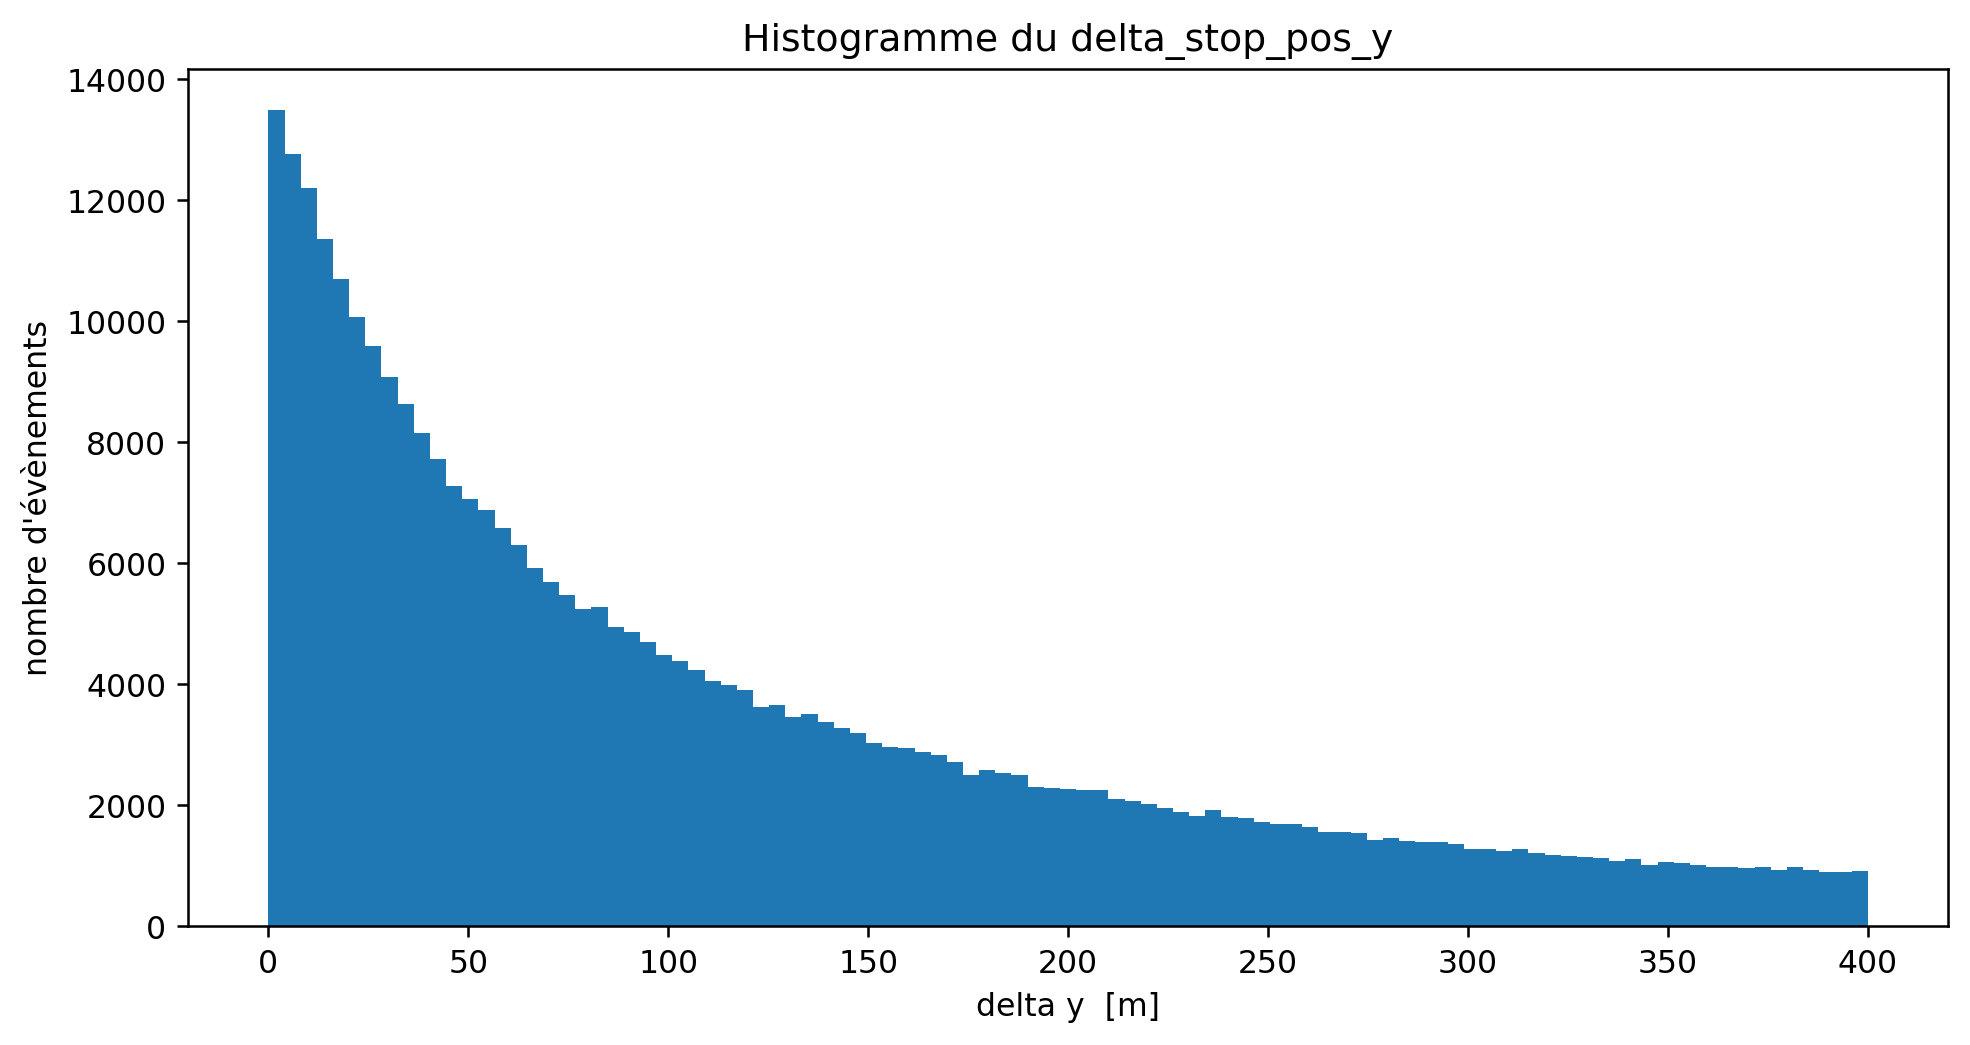

In [78]:
fig = plt.figure(figsize = (10,5), dpi = 227)

data = [[delta_stop_pos_y]]
method = ['hist']
index = 111
method_settings = [{'bins':np.linspace(0,400,100)}]
x_label_settings = {'xlabel':'delta y  [m]'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme du delta_stop_pos_y'}

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)


<AxesSubplot:title={'center':'Histogramme du delta_stop_pos_z'}, xlabel='delta z  [m]', ylabel="nombre d'évènements">

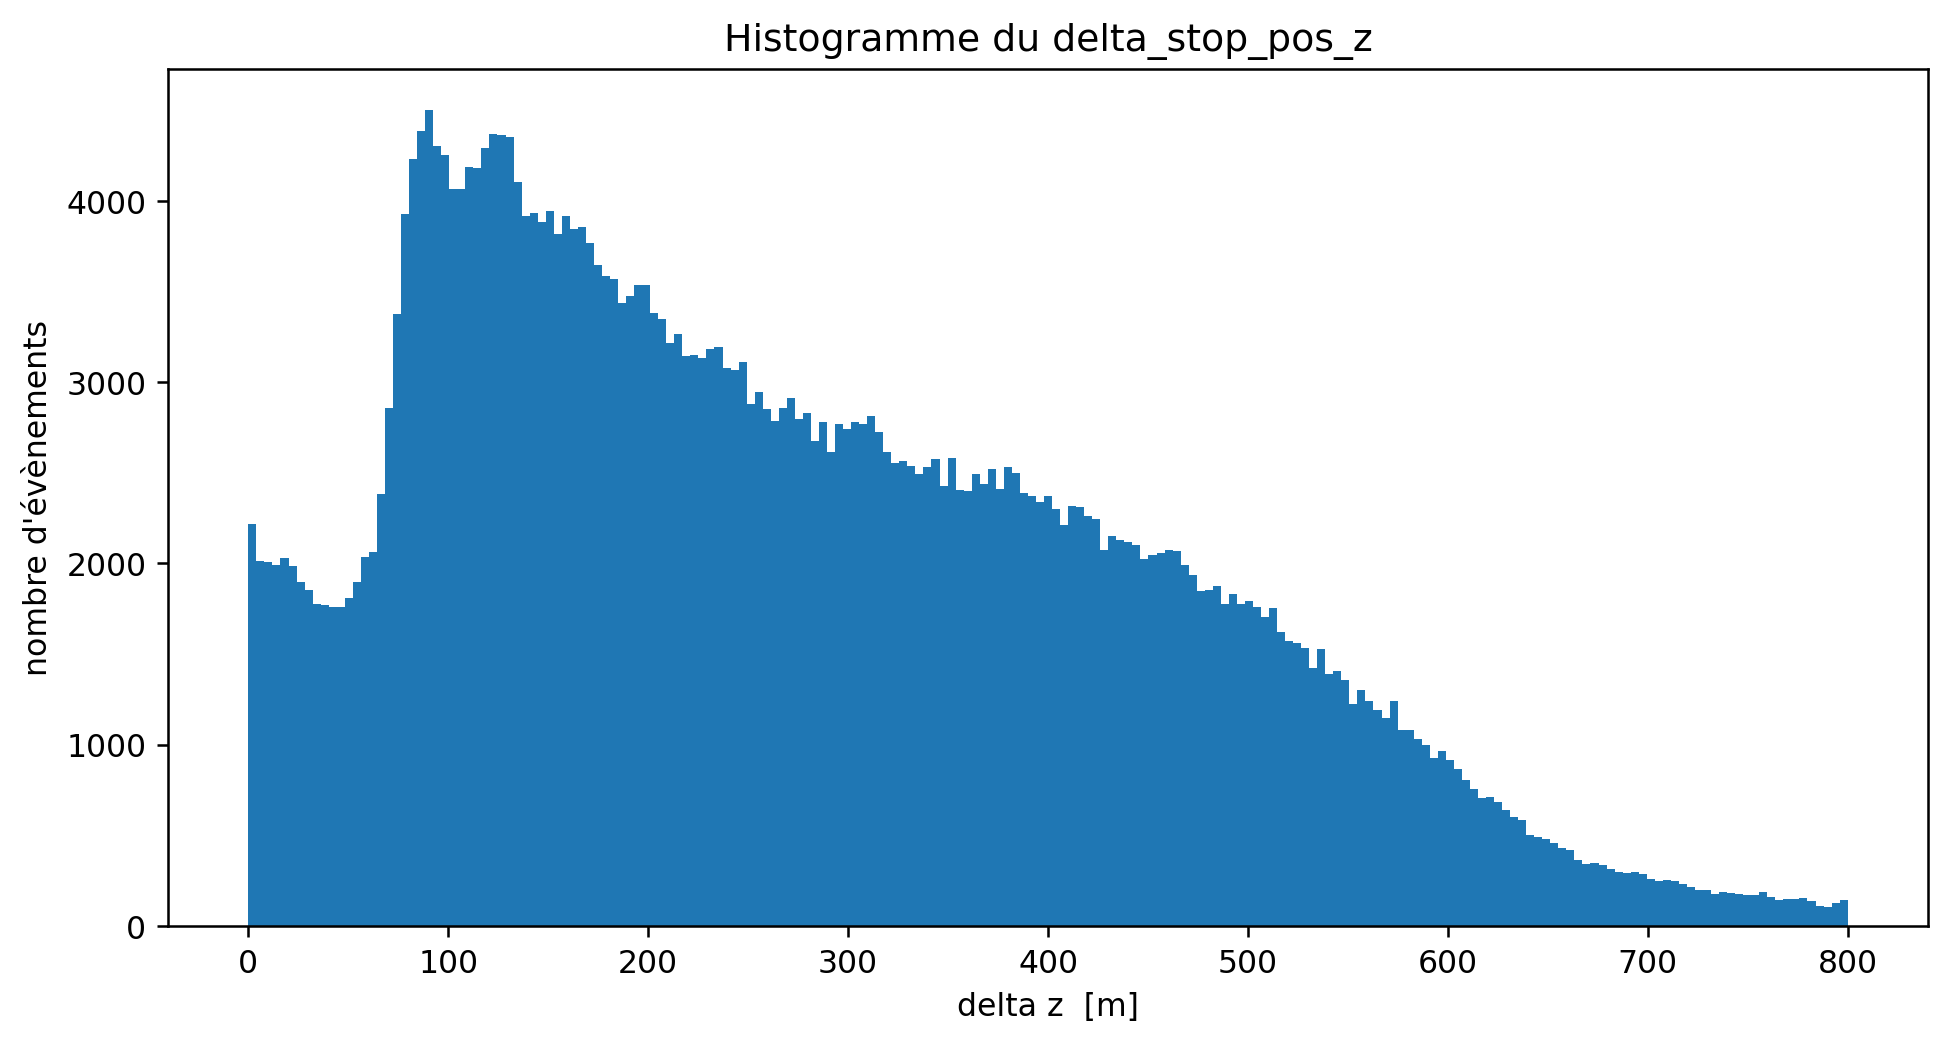

In [132]:
fig = plt.figure(figsize = (10,5), dpi = 227)

data = [[delta_stop_pos_z]]
method = ['hist']
index = 111
method_settings = [{'bins':np.linspace(0,800,200)}]
x_label_settings = {'xlabel':'delta z  [m]'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme du delta_stop_pos_z'}

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)


<AxesSubplot:title={'center':'Histogramme du delta_stop_pos_distance'}, xlabel='delta  [m]', ylabel="nombre d'évènements">

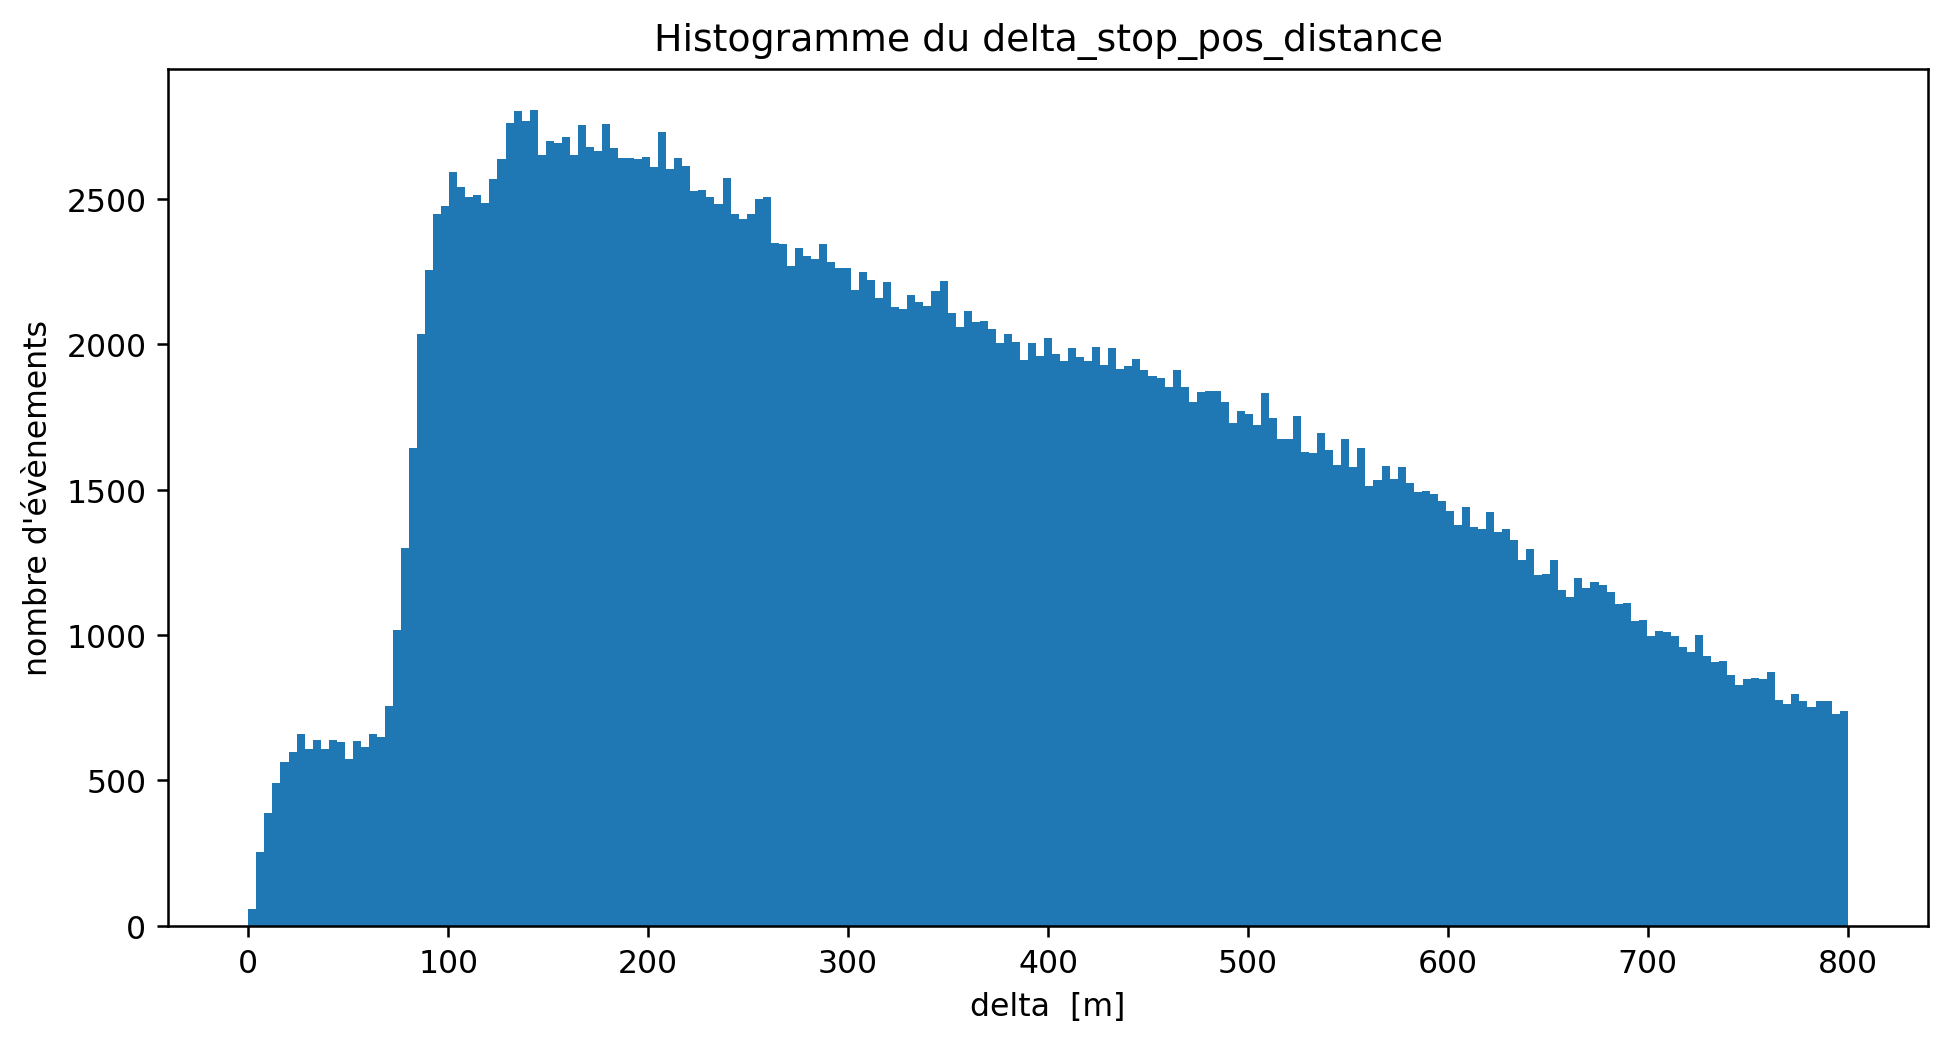

In [83]:
fig = plt.figure(figsize = (10,5), dpi = 227)

data = [[delta_stop_pos_distance]]
method = ['hist']
index = 111
method_settings = [{'bins':np.linspace(0,800,200)}]
x_label_settings = {'xlabel':'delta  [m]'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme du delta_stop_pos_distance'}

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)


# Calcul erreur longueur de trace et erreur angulaire

In [87]:
aliases = {'muon_true_len':'sum_mc_trks/tmuon/tmuon.len', 'muon_true_ntracks':'sum_mc_trks/ntrks',
        'muon_scaling':'sum_mc_evt/weight',
        'muon_true_nhits': 'sum_mc_hits/nhits', 'muon_reco_nhits': 'sum_hits/nhits',
        'muon_true_atot': 'sum_mc_hits/atot', 'muon_reco_atot': 'sum_hits/atot'}

true_arr = f._fobj['T'].arrays(aliases.keys(), aliases = aliases)[0:int(file_range)]

trackLength_mc_true = np.array(np.abs(true_arr['muon_true_len']))
trackLength_mc_reco = f.events.tracks.fitinf[:,0,10] 


In [95]:
trackLength_mc_true[isNotNan]

array([1167.54045963, 1129.16975269,  960.57393742, ..., 1096.08845507,
       1130.99288453, 1109.79591947])

In [96]:
trackLength_mc_reco[isNotNan]

<Array [580, 296, 343, ... 320, 322, 27.9] type='410856 * float64'>

In [100]:
delta_TrackLength = trackLength_mc_true[isNotNan]  - trackLength_mc_reco[isNotNan]

<AxesSubplot:title={'center':'Histogramme du delta_TrackLength'}, xlabel='delta_TrackLength  [m]', ylabel="nombre d'évènements">

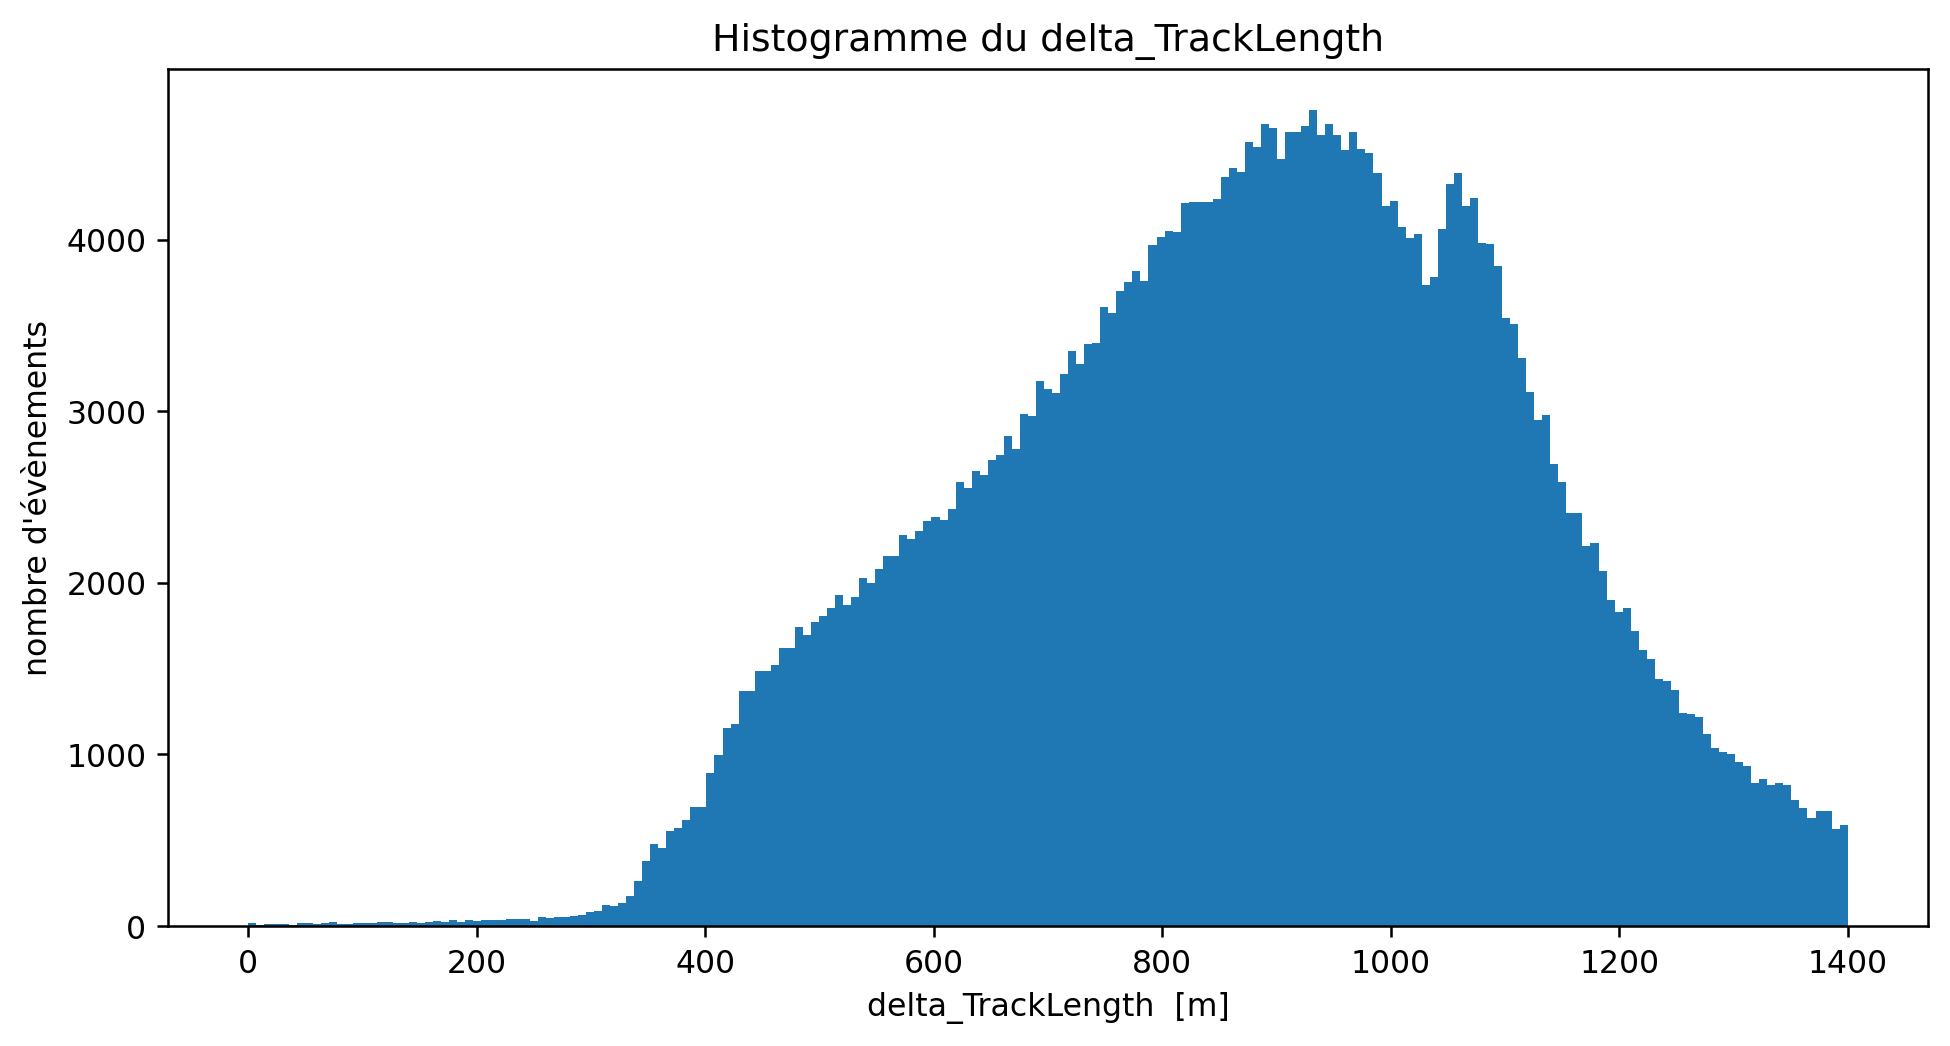

In [113]:
fig = plt.figure(figsize = (10,5), dpi = 227)

data = [[delta_TrackLength]]
method = ['hist']
index = 111
method_settings = [{'bins':np.linspace(0,1400,200)}]
x_label_settings = {'xlabel':'delta_TrackLength  [m]'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme du delta_TrackLength'}

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)


In [122]:
delta_dir_z = np.abs( np.arccos(f.events.mc_tracks.dir_z[:,0]) - np.arccos(f.events.tracks.dir_z[:,0]) ) *180/np.pi


<AxesSubplot:title={'center':'Histogramme du delta_dir_z'}, xlabel='delta_dir_z  [deg]', ylabel="nombre d'évènements">

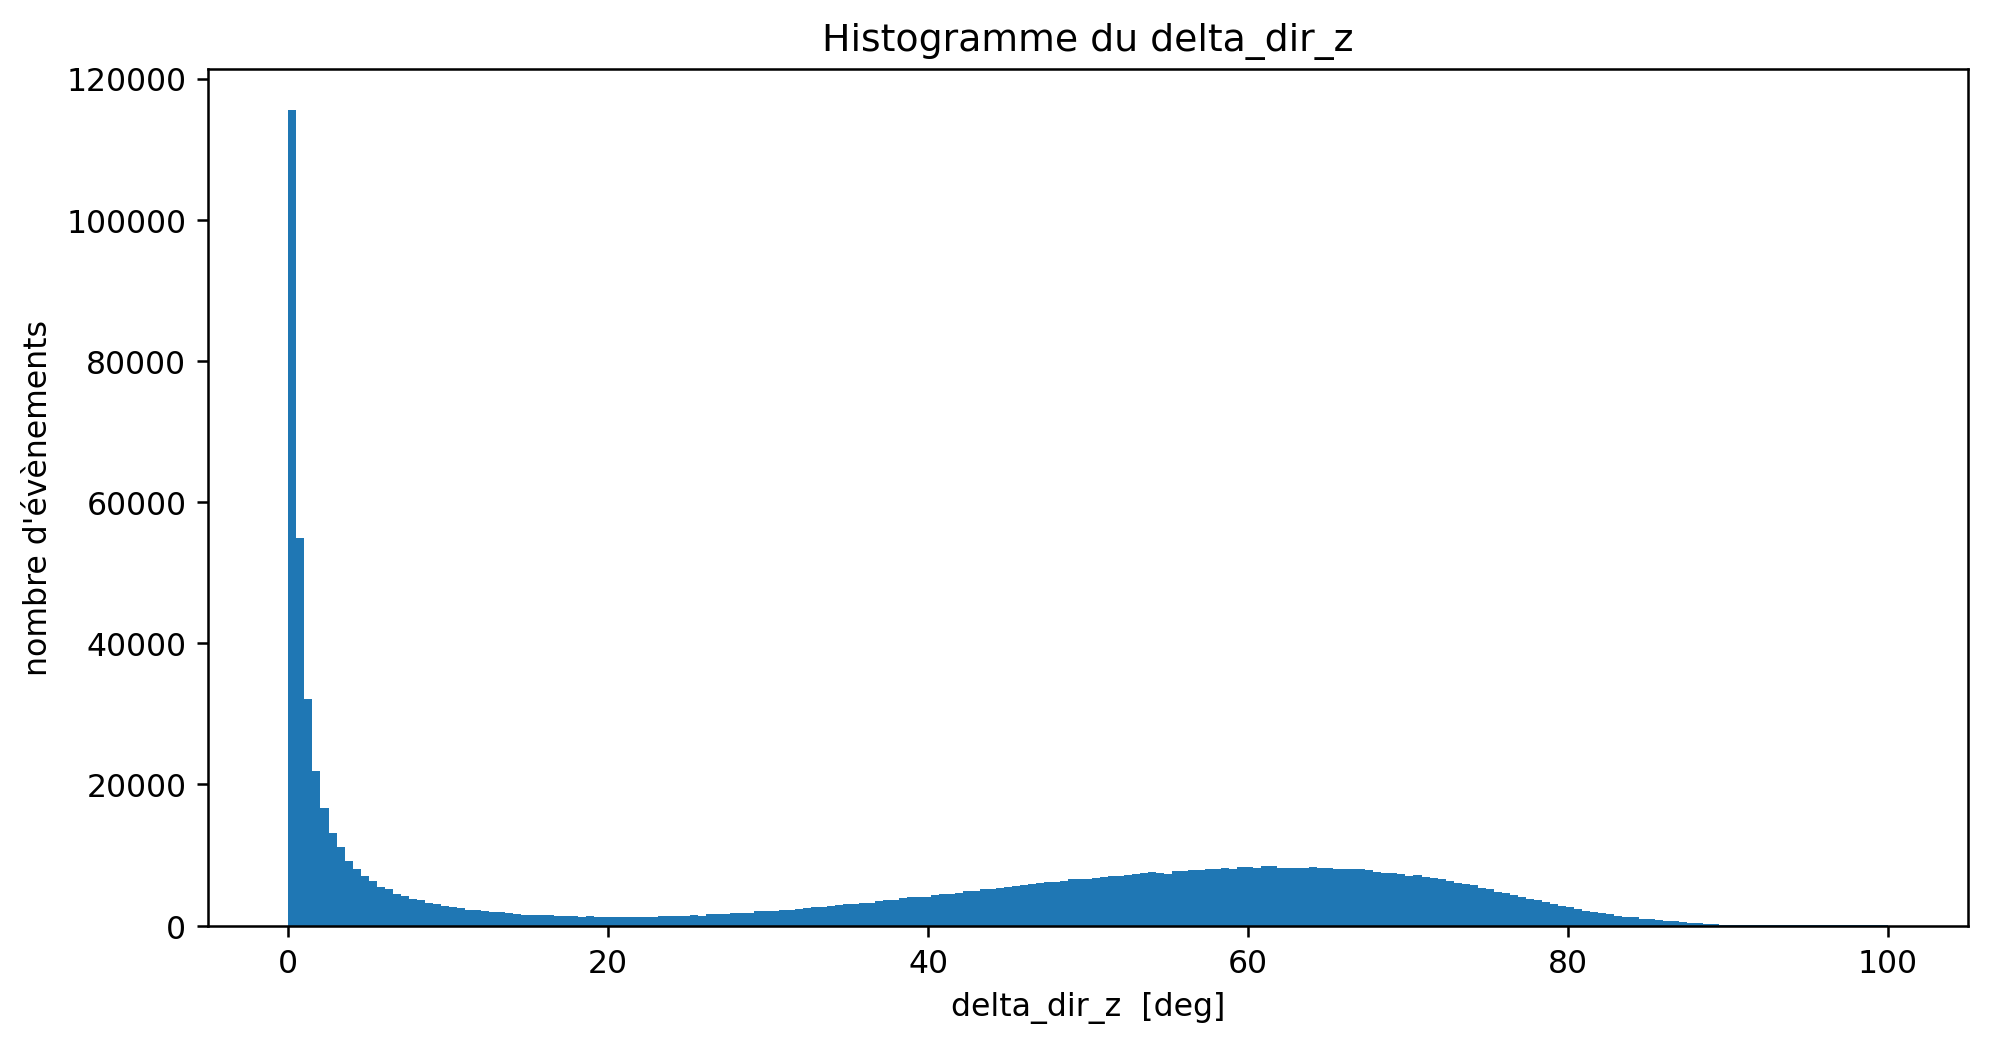

In [127]:
fig = plt.figure(figsize = (10,5), dpi = 227)

data = [[delta_dir_z]]
method = ['hist']
index = 111
method_settings = [{'bins':np.linspace(0,100,200)}]
x_label_settings = {'xlabel':'delta_dir_z  [deg]'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme du delta_dir_z'}

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)


In [128]:
delta_start_pos_x = np.abs(f.events.mc_tracks.pos_x[:,0] - f.events.tracks.pos_x[:,0])

<AxesSubplot:title={'center':'Histogramme du delta_start_pos_x'}, xlabel='delta_start_pos_x  [m]', ylabel="nombre d'évènements">

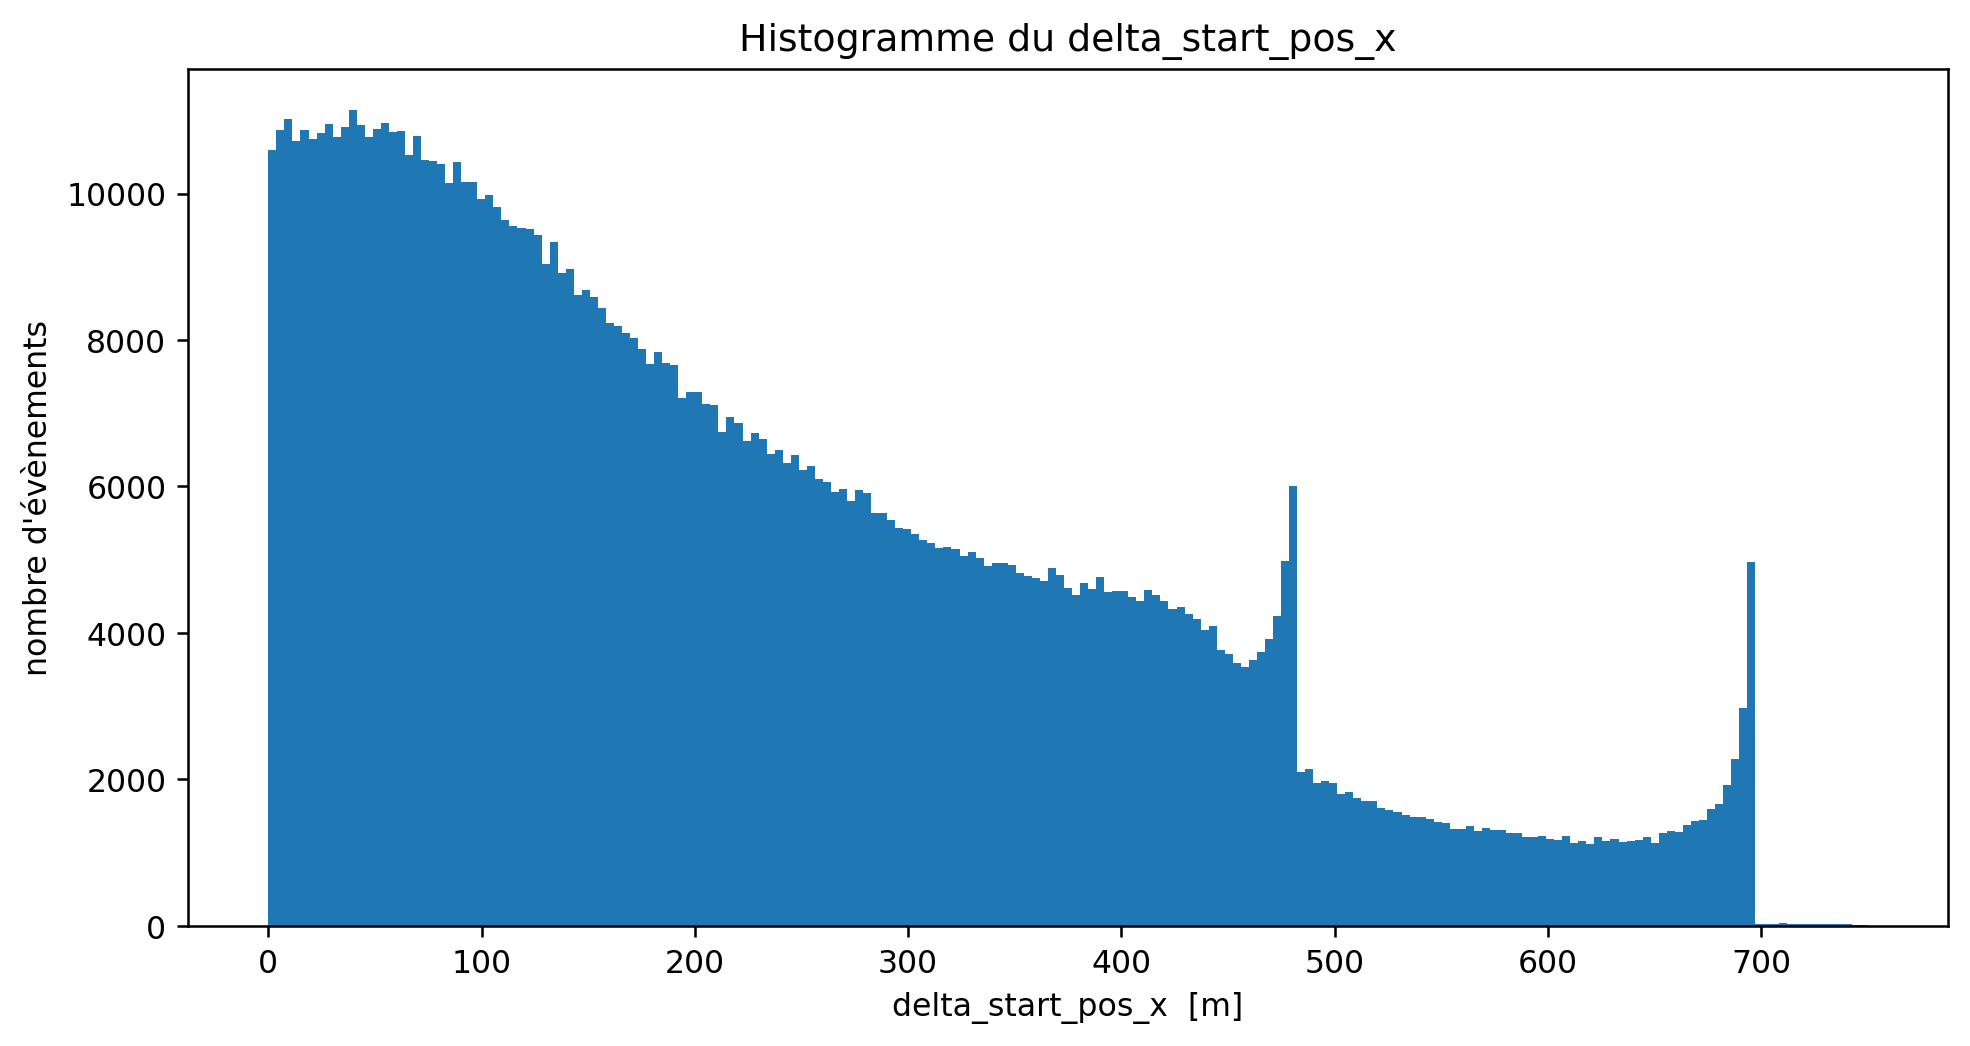

In [131]:
fig = plt.figure(figsize = (10,5), dpi = 227)

data = [[delta_start_pos_x]]
method = ['hist']
index = 111
method_settings = [{'bins':np.linspace(0,750,200)}]
x_label_settings = {'xlabel':'delta_start_pos_x  [m]'}
y_label_settings = {'ylabel':"nombre d'évènements"}
title_settings = {'label':'Histogramme du delta_start_pos_x'}

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)


<AxesSubplot:xlabel='delta_TrackLength', ylabel='trackLength_mc_true'>

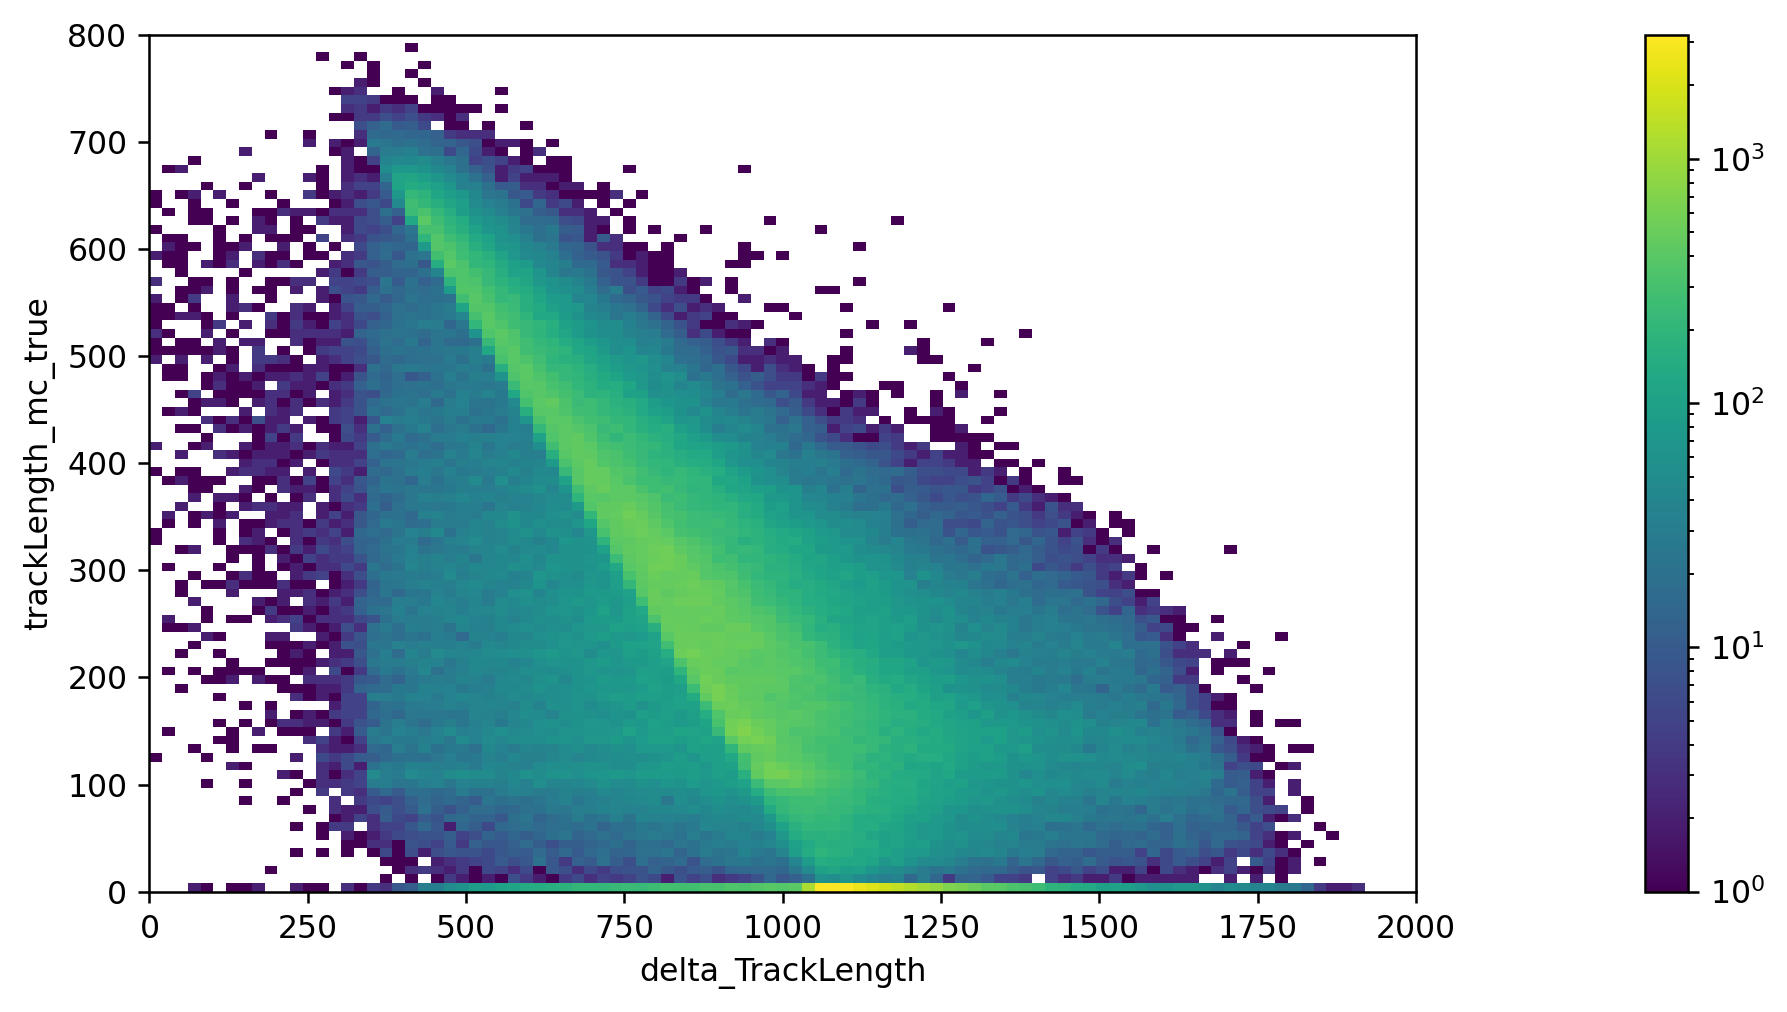

In [150]:
fig = plt.figure(figsize = (10,5), dpi = 227)

data = [[delta_TrackLength.__array__(),trackLength_mc_reco[isNotNan].__array__()]]
method = ['hist2d']
index = 111
method_settings = [{'bins':[np.linspace(0,2000,100),np.linspace(0,800,100)],'norm':mpl.colors.LogNorm()}]
x_label_settings = {'xlabel':'delta_TrackLength'}
y_label_settings = {'ylabel':"trackLength_mc_true"}
title_settings = {'label':''}

plot(fig, data, method, index, method_settings = method_settings, title_settings = title_settings, x_label_settings = x_label_settings, y_label_settings = y_label_settings)
